In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from scipy import stats
import missingno
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from os import path
from PIL import Image
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('UN_info.csv')
df

,DEMO_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2016,2016,1.8,NaN,NaN
1,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2017,2017,1.7,NaN,NaN
2,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2018,2018,1.7,NaN,NaN
3,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2019,2019,1.7,NaN,NaN
4,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",AUS,Australia,2020,2020,1.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...
40914,PA_NUS_ATLS,DEC alternative conversion factor (LCU per US$),MAF,Saint-Martin (French part),2017,2017,0.9,NaN,NaN
40915,PA_NUS_ATLS,DEC alternative conversion factor (LCU per US$),MAF,Saint-Martin (French part),2018,2018,0.8,NaN,NaN
40916,PA_NUS_ATLS,DEC alternative conversion factor (LCU per US$),MAF,Saint-Martin (French part),2019,2019,0.9,NaN,NaN
40917,PA_NUS_ATLS,DEC alternative conversion factor (LCU per US$),MAF,Saint-Martin (French part),2020,2020,0.9,NaN,NaN


In [7]:
country_group = df.groupby(by=['DEMO_IND'], sort = False)
country_group_avg = round(country_group.mean(),0)
country_group_avg

,TIME,Time,Value
DEMO_IND,,,
SP_DYN_TFRT_IN,2018.0,2018.0,3.000000e+00
SP_DYN_LE00_IN,2018.0,2018.0,7.300000e+01
SP_DYN_IMRT_IN,2018.0,2018.0,2.200000e+01
SP_POP_GROW,2018.0,2018.0,1.000000e+00
SH_DYN_AIDS_ZS,2018.0,2018.0,2.000000e+00
SP_RUR_TOTL_ZS,2018.0,2018.0,4.100000e+01
NY_GDP_MKTP_CN,2018.0,2018.0,2.417009e+14
NY_GDP_MKTP_CD,2018.0,2018.0,4.172560e+11
NY_GDP_DEFL_ZS,2018.0,2018.0,3.120000e+02


In [8]:
df.columns

Index(['DEMO_IND', 'Indicator', 'LOCATION', 'Country', 'TIME', 'Time', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [203]:
df_wide=pd.pivot(df, index=['DEMO_IND','Indicator', 'Country'], columns = 'Time',values = 'Value') #Reshape from long to wide

#Re-arange the new columns in the correct order
cols = df['Time'].unique()
df_wide=df_wide[cols]

In [204]:
df_wide

Time                                                                                 2016  \
DEMO_IND  Indicator                                          Country                        
200101    Total population (thousands)                       Afghanistan     3.538300e+04   
                                                             Albania         2.886000e+03   
                                                             Algeria         4.055100e+04   
                                                             American Samoa  5.600000e+01   
                                                             Angola          2.884200e+04   
...                                                                                   ...   
XTGOV_IMF General government total expenditure (current LCU) Vanuatu         3.072000e+10   
                                                             Viet Nam        1.253677e+15   
                                                             Yemen           1.428635e+12   
                                                             Zambia          5.170700e+10   
                                                             Zimbabwe        4.863000e+09   

Time                                                                                 2017  \
DEMO_IND  Indicator                                          Country                        
200101    Total population (thousands)                       Afghanistan     3.629600e+04   
                                                             Albania         2.884000e+03   
                                                             Algeria         4.138900e+04   
                                                             American Samoa  5.600000e+01   
                                                             Angola          2.981700e+04   
...                                                                                   ...   
XTGOV_IMF General government total expenditure (current LCU) Vanuatu         3.523700e+10   
                                                             Viet Nam        1.355034e+15   
                                                             Yemen           8.397510e+11   
                                                             Zambia          6.149800e+10   
                                                             Zimbabwe        6.144000e+09   

Time                                                                                 2018  \
DEMO_IND  Indicator                                          Country                        
200101    Total population (thousands)                       Afghanistan     3.717200e+04   
                                                             Albania         2.883000e+03   
                                                             Algeria         4.222800e+04   
                                                             American Samoa  5.500000e+01   
                                                             Angola          3.081000e+04   
...                                                                                   ...   
XTGOV_IMF General government total expenditure (current LCU) Vanuatu         3.351000e+10   
                                                             Viet Nam        1.435435e+15   
                                                             Yemen           1.651600e+12   
                                                             Zambia          7.631300e+10   
                                                             Zimbabwe        7.497000e+09   

Time                                                                                 2019  \
DEMO_IND  Indicator                                          Country                        
200101    Total population (thousands)                       Afghanistan     3.804200e+04   
                                                             Albania         2.881000e+03  

In [205]:
print(df_wide.dtypes)

Time
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
dtype: object


In [240]:
df_wide.reset_index(inplace=True)
df_wide

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
0,200101,Total population (thousands),Afghanistan,3.538300e+04,3.629600e+04,3.717200e+04,3.804200e+04,3.892800e+04,3.983500e+04,4.075400e+04
1,200101,Total population (thousands),Albania,2.886000e+03,2.884000e+03,2.883000e+03,2.881000e+03,2.878000e+03,2.873000e+03,2.866000e+03
2,200101,Total population (thousands),Algeria,4.055100e+04,4.138900e+04,4.222800e+04,4.305300e+04,4.385100e+04,4.461700e+04,4.535000e+04
3,200101,Total population (thousands),American Samoa,5.600000e+01,5.600000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
4,200101,Total population (thousands),Angola,2.884200e+04,2.981700e+04,3.081000e+04,3.182500e+04,3.286600e+04,3.393400e+04,3.502700e+04
...,...,...,...,...,...,...,...,...,...,...
6953,XTGOV_IMF,General government total expenditure (current ...,Vanuatu,3.072000e+10,3.523700e+10,3.351000e+10,4.278600e+10,4.551400e+10,4.617500e+10,5.689900e+10
6954,XTGOV_IMF,General government total expenditure (current ...,Viet Nam,1.253677e+15,1.355034e+15,1.435435e+15,1.526893e+15,1.787950e+15,1.689842e+15,1.886267e+15
6955,XTGOV_IMF,General government total expenditure (current ...,Yemen,1.428635e+12,8.397510e+11,1.651600e+12,1.625000e+12,1.647000e+12,2.446176e+12,3.832808e+12
6956,XTGOV_IMF,General government total expenditure (current ...,Zambia,5.170700e+10,6.149800e+10,7.631300e+10,8.959500e+10,1.132270e+11,1.349290e+11,1.391810e+11


In [243]:
indicator_group = df_wide.groupby(by=['Indicator'], sort = False)
indicator_group_avg = round(indicator_group.mean(),0)
indicator_group_avg

Time,2016,2017,2018,2019,2020,2021,2022
Indicator,,,,,,,
Total population (thousands),3.266400e+04,3.289100e+04,3.312800e+04,3.307900e+04,3.212400e+04,3.266400e+04,3.301900e+04
Population aged 15-24 years (thousands),5.378000e+03,5.360000e+03,5.350000e+03,5.338000e+03,5.162000e+03,5.248000e+03,5.283000e+03
Population aged 65 years or older (thousands),2.784000e+03,2.876000e+03,2.975000e+03,2.939000e+03,2.812000e+03,2.876000e+03,2.975000e+03
Population aged 14 years or younger (thousands),8.694000e+03,8.706000e+03,8.680000e+03,8.692000e+03,8.497000e+03,8.688000e+03,8.724000e+03
Population aged 25-64 years (thousands),1.620200e+04,1.634300e+04,1.647900e+04,1.646700e+04,1.597600e+04,1.619900e+04,1.638800e+04
Total debt service (% of GNI),5.000000e+00,5.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,NaN,NaN
GDP deflator (base year varies by country),1.760000e+02,1.950000e+02,2.210000e+02,2.490000e+02,3.510000e+02,7.360000e+02,NaN
GDP (current US$),3.635368e+11,3.869568e+11,4.108556e+11,4.207052e+11,4.149227e+11,5.204112e+11,NaN
GDP (current LCU),1.789414e+14,2.006246e+14,2.344877e+14,2.743123e+14,3.682731e+14,1.872871e+14,NaN


In [296]:
df_tot_pop = df_wide.iloc[0:229]
df_tot_pop = df_tot_pop.groupby(by=['Country'], sort = False)
df_tot_pop_avg = round(df_tot_pop.mean(),0)
df_tot_pop_avg

Time,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,
Afghanistan,35383.0,36296.0,37172.0,38042.0,38928.0,39835.0,40754.0
Albania,2886.0,2884.0,2883.0,2881.0,2878.0,2873.0,2866.0
Algeria,40551.0,41389.0,42228.0,43053.0,43851.0,44617.0,45350.0
American Samoa,56.0,56.0,55.0,55.0,55.0,55.0,55.0
Angola,28842.0,29817.0,30810.0,31825.0,32866.0,33934.0,35027.0
...,...,...,...,...,...,...,...
Wallis and Futuna Islands,12.0,12.0,12.0,11.0,11.0,11.0,11.0
Western Sahara,539.0,553.0,567.0,582.0,597.0,612.0,626.0
Yemen,27168.0,27835.0,28499.0,29162.0,29826.0,30491.0,31155.0


In [309]:
df_tot_pop_avg = df_tot_pop_avg.sort_values(by=[2016], ascending = False)

<AxesSubplot:>

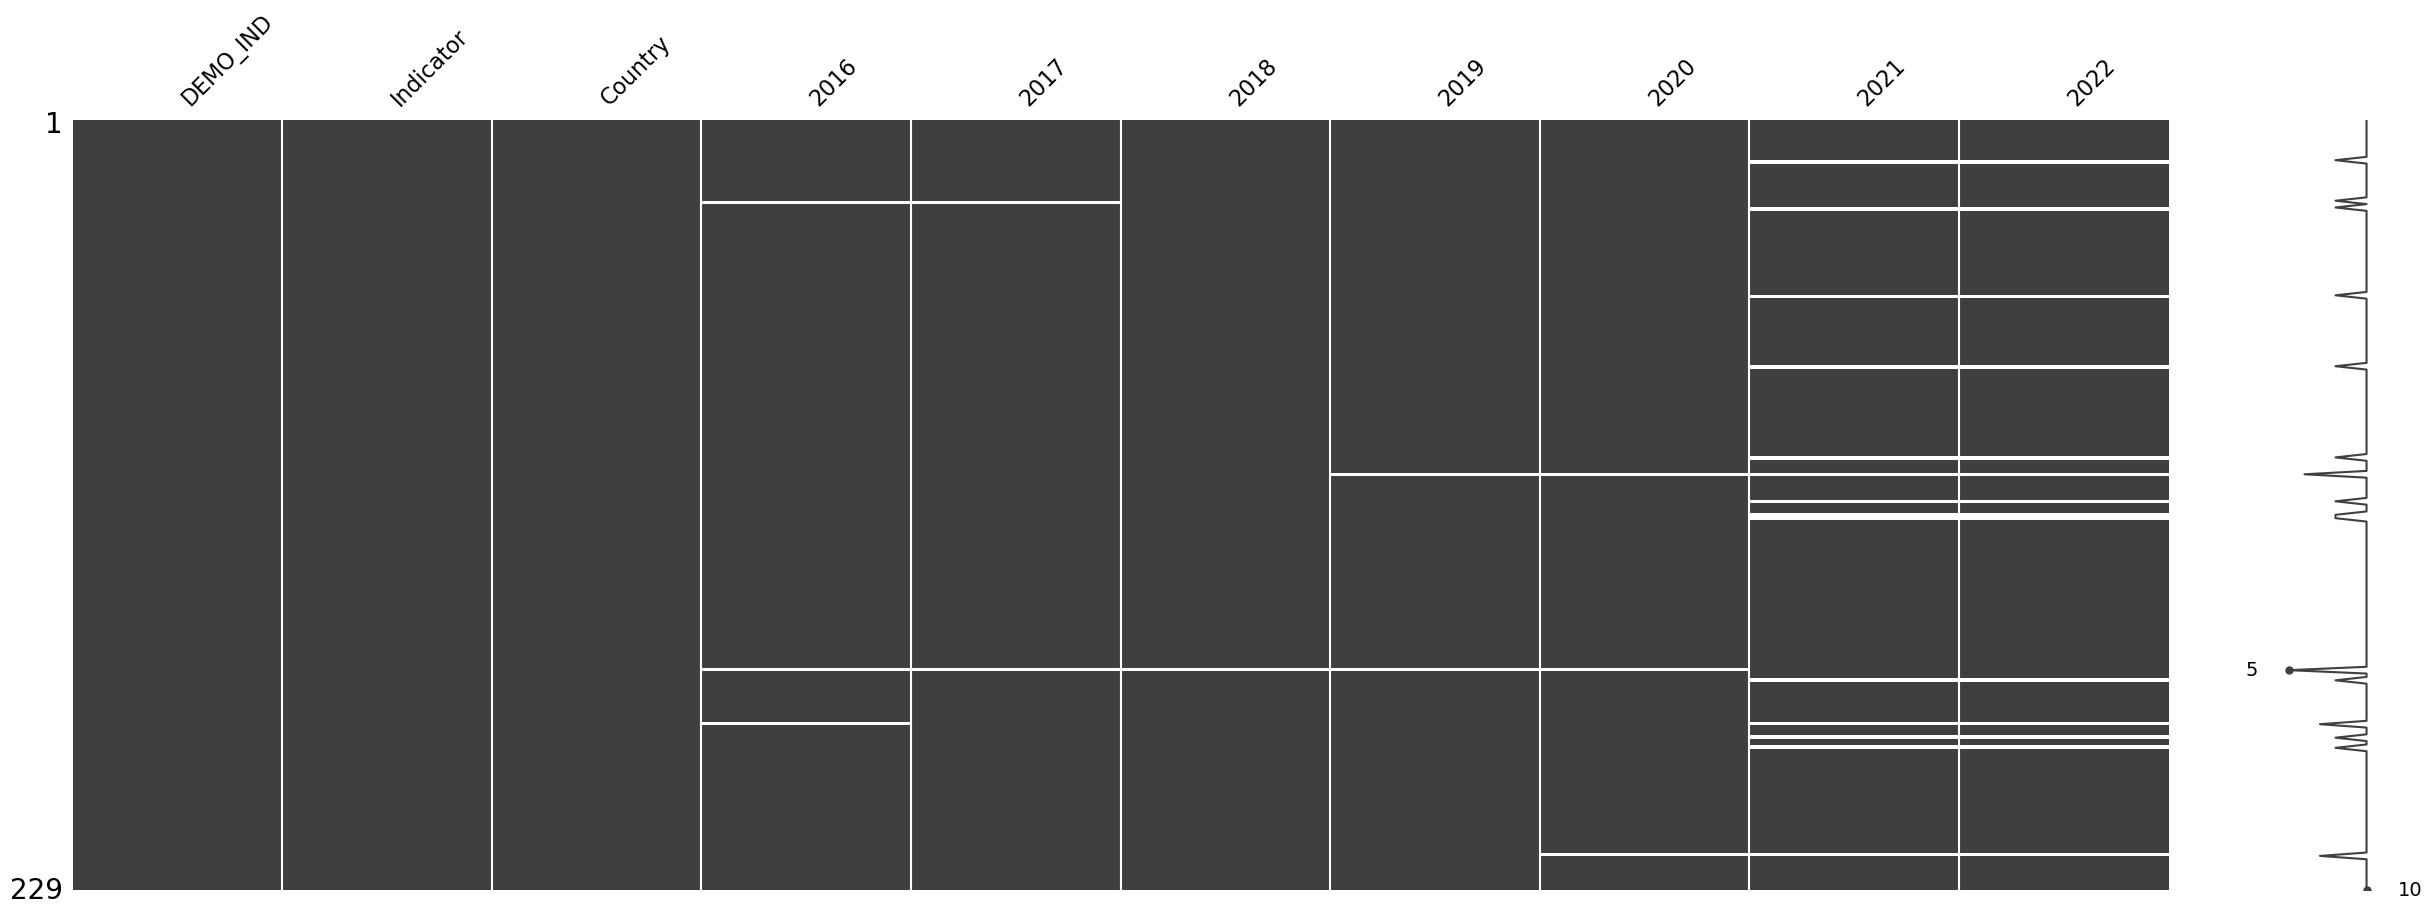

In [269]:
missingno.matrix(df_tot_pop, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

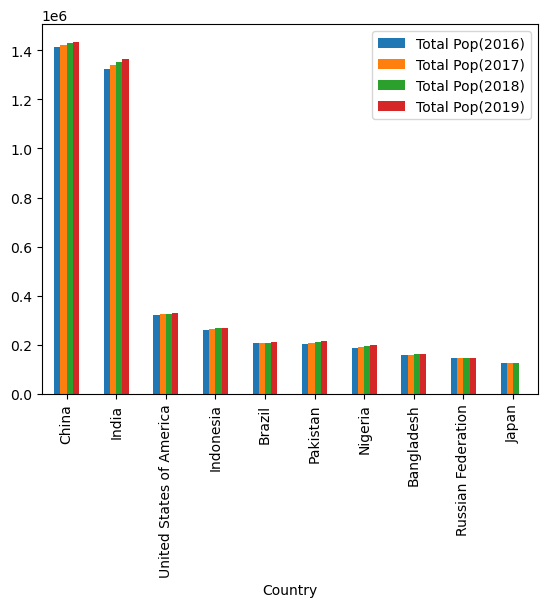

In [310]:
tot_pop_data_series = df_tot_pop_avg.iloc[5:5,1]


## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'Total Pop(2016)': df_tot_pop_avg[2016],
                                     'Total Pop(2017)': df_tot_pop_avg[2017],
                                     'Total Pop(2018)': df_tot_pop_avg[2018],
                                     'Total Pop(2019)': df_tot_pop_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [245]:
df_ya_pop = df_wide.iloc[229:458]
df_ya_pop

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
229,200144,Population aged 15-24 years (thousands),Afghanistan,7560.0,7823.0,8071.0,8314.0,8556.0,8785.0,9008.0
230,200144,Population aged 15-24 years (thousands),Albania,485.0,472.0,458.0,443.0,428.0,411.0,393.0
231,200144,Population aged 15-24 years (thousands),Algeria,6432.0,6242.0,6070.0,5952.0,5910.0,5939.0,6044.0
232,200144,Population aged 15-24 years (thousands),American Samoa,11.0,11.0,11.0,10.0,10.0,10.0,10.0
233,200144,Population aged 15-24 years (thousands),Angola,5564.0,5754.0,5958.0,6178.0,6415.0,6668.0,6935.0
...,...,...,...,...,...,...,...,...,...,...
453,200144,Population aged 15-24 years (thousands),Wallis and Futuna Islands,2.0,2.0,2.0,2.0,2.0,2.0,1.0
454,200144,Population aged 15-24 years (thousands),Western Sahara,96.0,96.0,97.0,98.0,99.0,100.0,101.0
455,200144,Population aged 15-24 years (thousands),Yemen,5904.0,5955.0,6004.0,6059.0,6127.0,6210.0,6306.0
456,200144,Population aged 15-24 years (thousands),Zambia,3351.0,3474.0,3605.0,3737.0,3869.0,4001.0,4129.0


<AxesSubplot:>

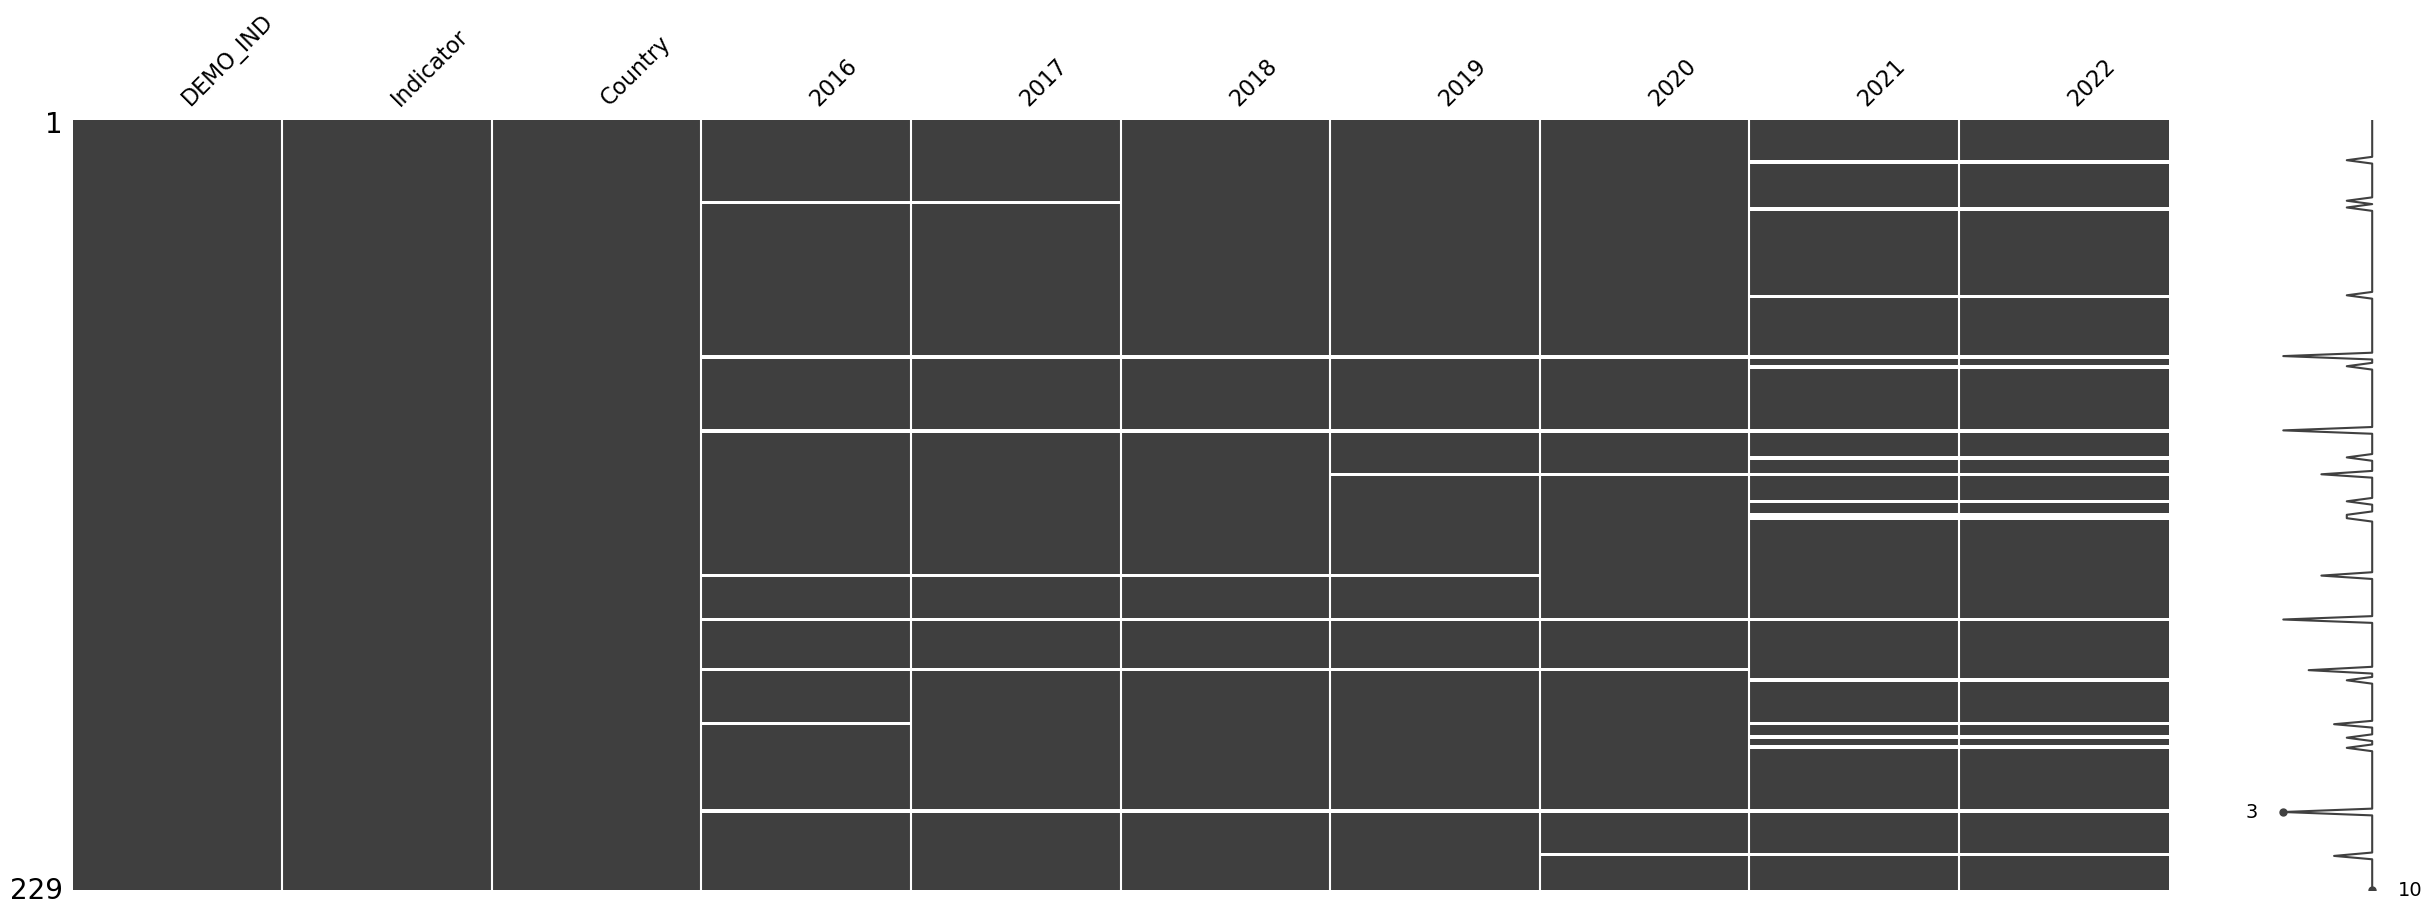

In [270]:
missingno.matrix(df_ya_pop, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

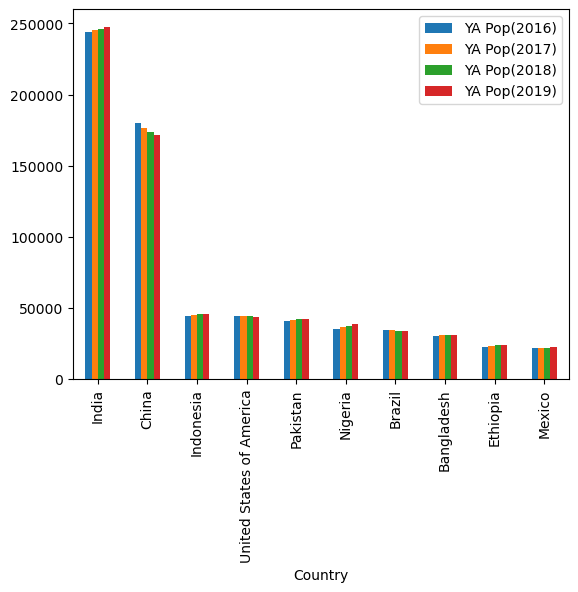

In [318]:
df_ya_pop = df_wide.iloc[229:458]
df_ya_pop = df_ya_pop.groupby(by=['Country'], sort = False)
df_ya_pop_avg = round(df_ya_pop.mean(),0)
df_ya_pop_data_series = df_ya_pop_avg.iloc[5:5,1]

df_ya_pop_avg = df_ya_pop_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'YA Pop(2016)': df_ya_pop_avg[2016],
                                     'YA Pop(2017)': df_ya_pop_avg[2017],
                                     'YA Pop(2018)': df_ya_pop_avg[2018],
                                     'YA Pop(2019)': df_ya_pop_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [246]:
df_old_pop = df_wide.iloc[458:687]
df_old_pop

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
458,200151,Population aged 65 years or older (thousands),Afghanistan,892.0,927.0,961.0,995.0,1031.0,1071.0,1113.0
459,200151,Population aged 65 years or older (thousands),Albania,374.0,384.0,396.0,409.0,423.0,438.0,453.0
460,200151,Population aged 65 years or older (thousands),Algeria,2436.0,2557.0,2687.0,2821.0,2957.0,3087.0,3218.0
461,200151,Population aged 65 years or older (thousands),American Samoa,3.0,3.0,3.0,3.0,3.0,4.0,4.0
462,200151,Population aged 65 years or older (thousands),Angola,652.0,668.0,683.0,700.0,720.0,749.0,779.0
...,...,...,...,...,...,...,...,...,...,...
682,200151,Population aged 65 years or older (thousands),Wallis and Futuna Islands,1.0,1.0,2.0,2.0,2.0,2.0,2.0
683,200151,Population aged 65 years or older (thousands),Western Sahara,14.0,16.0,17.0,19.0,20.0,22.0,24.0
684,200151,Population aged 65 years or older (thousands),Yemen,768.0,794.0,820.0,846.0,874.0,906.0,938.0
685,200151,Population aged 65 years or older (thousands),Zambia,339.0,351.0,364.0,378.0,392.0,408.0,425.0


<AxesSubplot:>

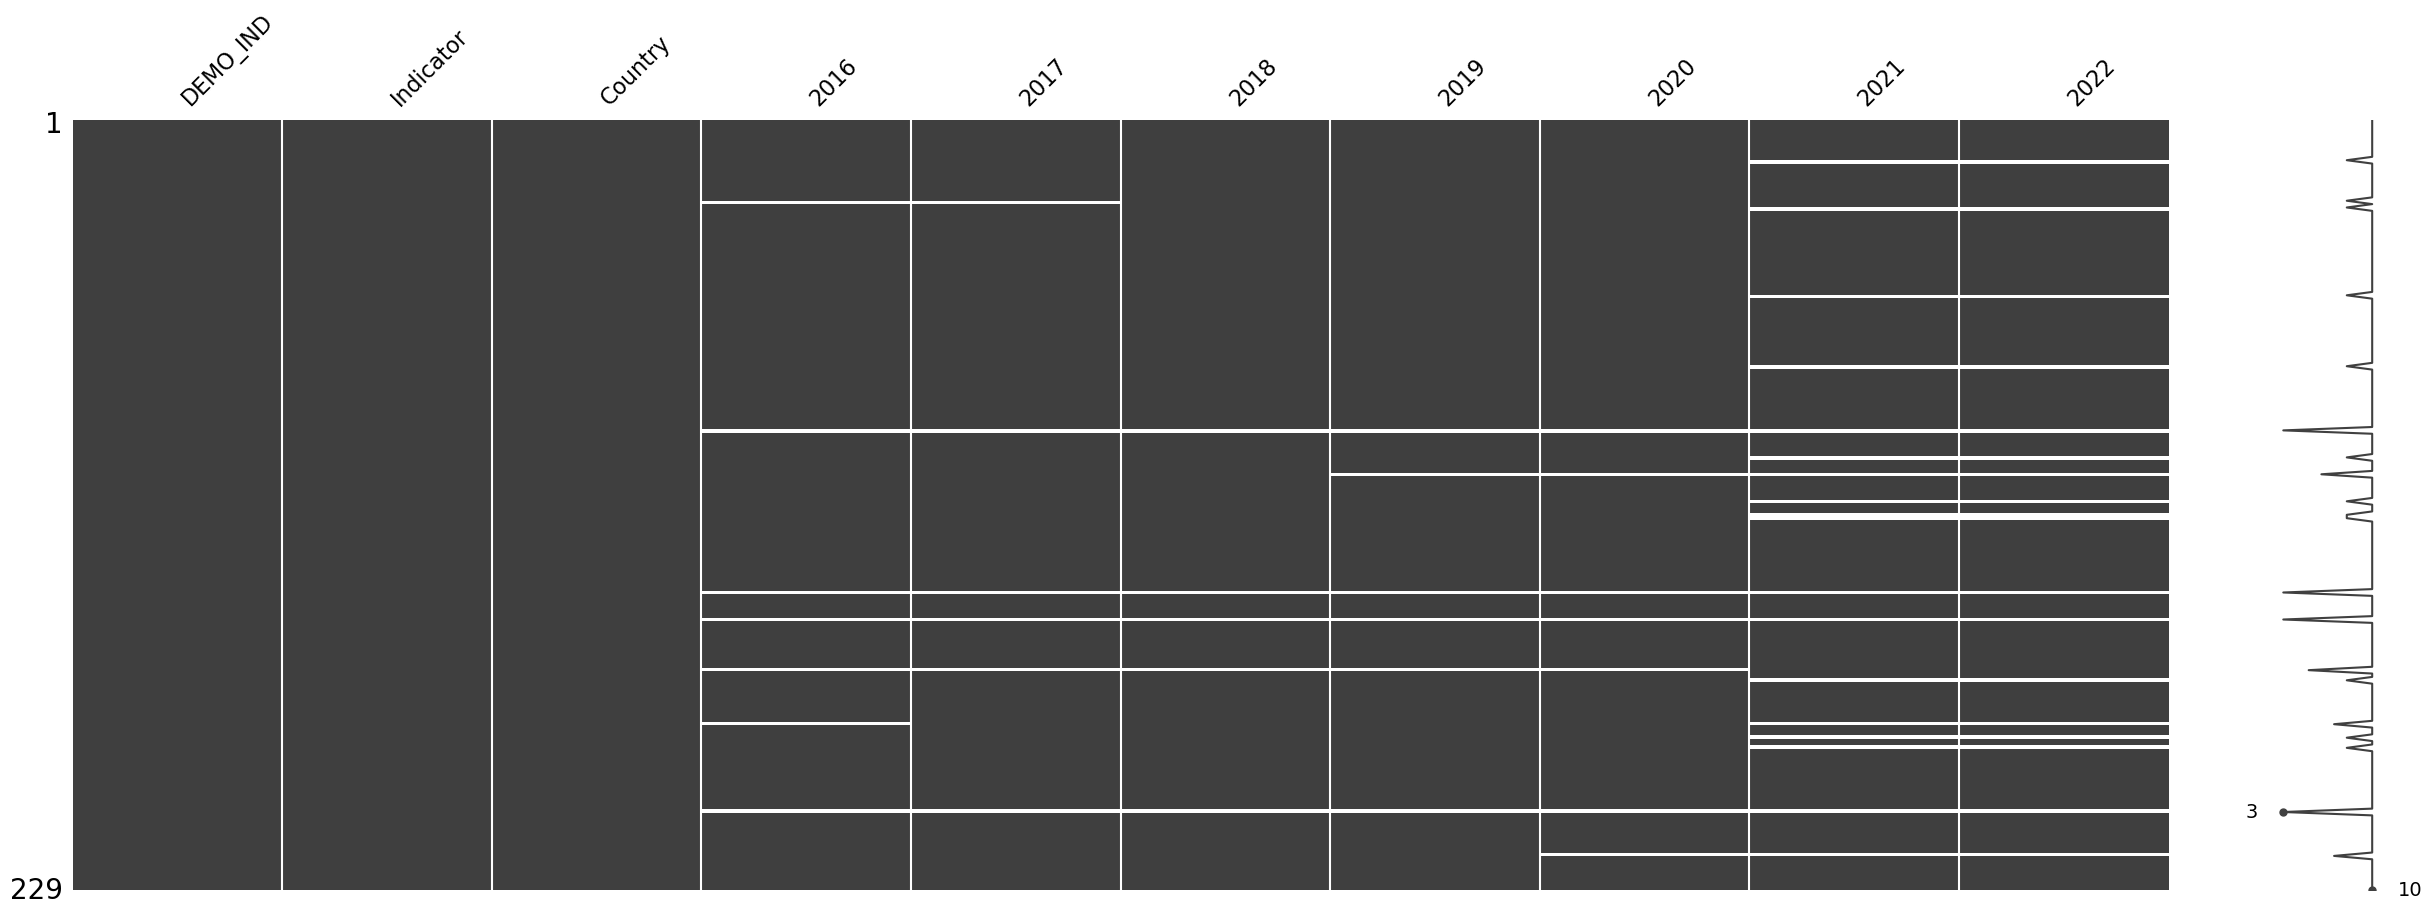

In [272]:
missingno.matrix(df_old_pop, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

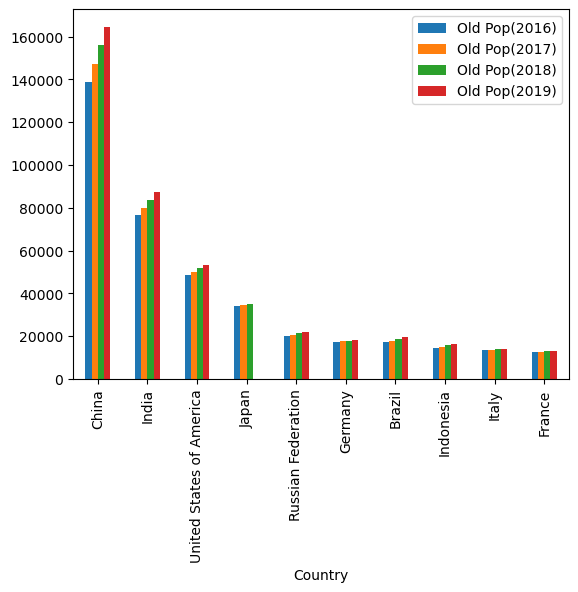

In [317]:
df_old_pop = df_wide.iloc[458:687]
df_old_pop = df_old_pop.groupby(by=['Country'], sort = False)
df_old_pop_avg = round(df_old_pop.mean(),0)
df_old_pop_data_series = df_old_pop_avg.iloc[5:5,1]

df_old_pop_avg = df_old_pop_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'Old Pop(2016)': df_old_pop_avg[2016],
                                     'Old Pop(2017)': df_old_pop_avg[2017],
                                     'Old Pop(2018)': df_old_pop_avg[2018],
                                     'Old Pop(2019)': df_old_pop_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [247]:
df_young_pop = df_wide.iloc[687:916]
df_young_pop

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
687,200343,Population aged 14 years or younger (thousands),Afghanistan,15665.0,15855.0,16017.0,16157.0,16281.0,16411.0,16524.0
688,200343,Population aged 14 years or younger (thousands),Albania,531.0,520.0,509.0,501.0,496.0,491.0,488.0
689,200343,Population aged 14 years or younger (thousands),Algeria,11814.0,12268.0,12731.0,13153.0,13499.0,13793.0,13996.0
690,200343,Population aged 14 years or younger (thousands),American Samoa,18.0,17.0,17.0,16.0,16.0,16.0,15.0
691,200343,Population aged 14 years or younger (thousands),Angola,13571.0,14000.0,14422.0,14838.0,15248.0,15661.0,16073.0
...,...,...,...,...,...,...,...,...,...,...
911,200343,Population aged 14 years or younger (thousands),Wallis and Futuna Islands,2.0,2.0,2.0,2.0,2.0,2.0,2.0
912,200343,Population aged 14 years or younger (thousands),Western Sahara,153.0,155.0,157.0,160.0,162.0,165.0,167.0
913,200343,Population aged 14 years or younger (thousands),Yemen,10966.0,11134.0,11290.0,11438.0,11582.0,11713.0,11842.0
914,200343,Population aged 14 years or younger (thousands),Zambia,7501.0,7653.0,7797.0,7941.0,8092.0,8244.0,8408.0


<AxesSubplot:>

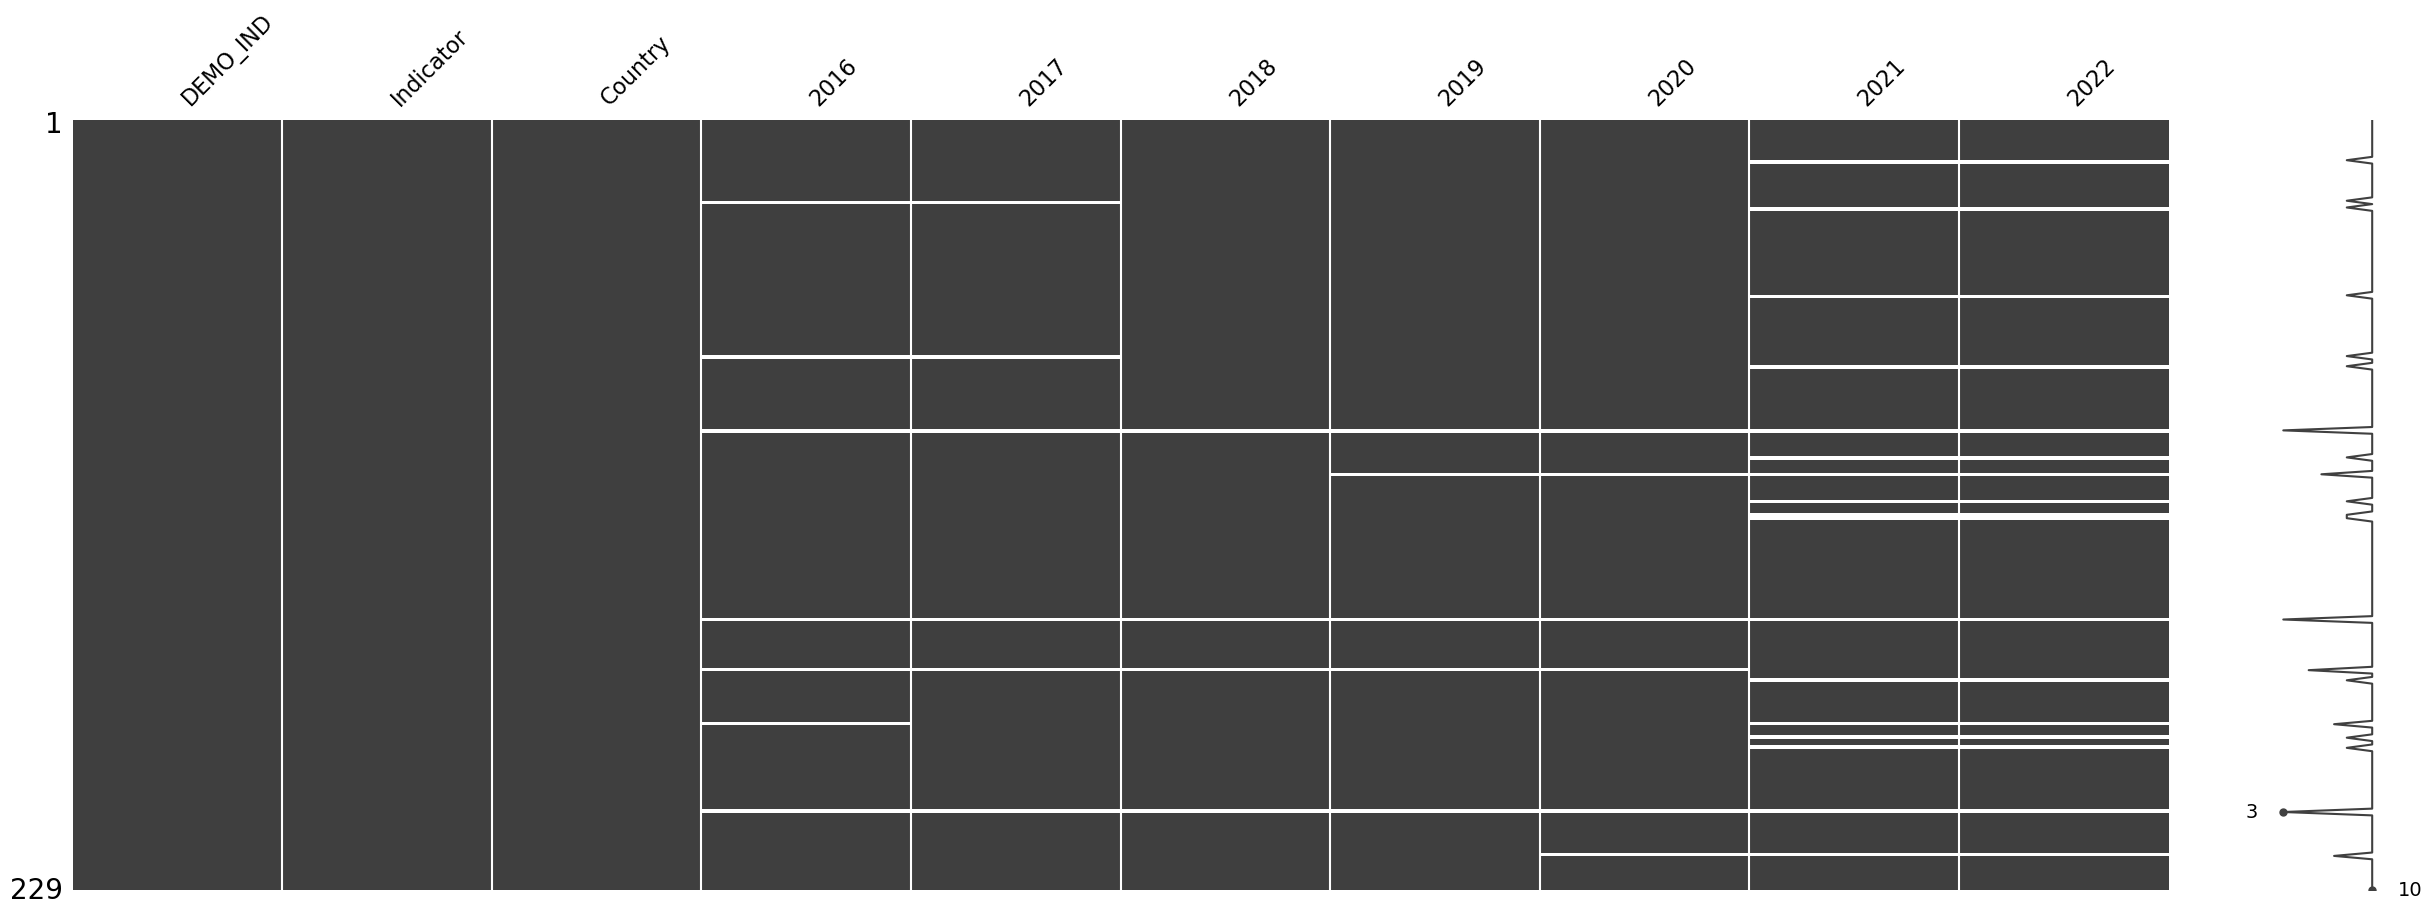

In [273]:
missingno.matrix(df_young_pop, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

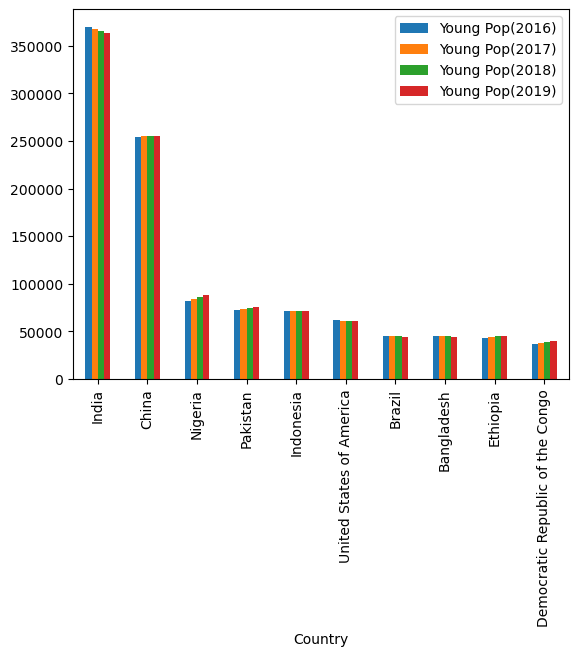

In [316]:
df_young_pop = df_wide.iloc[687:916]
df_young_pop = df_young_pop.groupby(by=['Country'], sort = False)
df_young_pop_avg = round(df_young_pop.mean(),0)
df_young_pop_data_series = df_young_pop_avg.iloc[5:5,1]

df_young_pop_avg = df_young_pop_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'Young Pop(2016)': df_young_pop_avg[2016],
                                     'Young Pop(2017)': df_young_pop_avg[2017],
                                     'Young Pop(2018)': df_young_pop_avg[2018],
                                     'Young Pop(2019)': df_young_pop_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [248]:
df_avg_pop = df_wide.iloc[916:1145]
df_avg_pop

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
916,200345,Population aged 25-64 years (thousands),Afghanistan,11267.0,11691.0,12122.0,12576.0,13060.0,13568.0,14110.0
917,200345,Population aged 25-64 years (thousands),Albania,1497.0,1508.0,1519.0,1527.0,1531.0,1534.0,1532.0
918,200345,Population aged 25-64 years (thousands),Algeria,19869.0,20323.0,20740.0,21127.0,21485.0,21798.0,22092.0
919,200345,Population aged 25-64 years (thousands),American Samoa,24.0,25.0,25.0,25.0,25.0,25.0,26.0
920,200345,Population aged 25-64 years (thousands),Angola,9055.0,9395.0,9747.0,10110.0,10483.0,10856.0,11240.0
...,...,...,...,...,...,...,...,...,...,...
1140,200345,Population aged 25-64 years (thousands),Wallis and Futuna Islands,6.0,6.0,6.0,6.0,6.0,6.0,6.0
1141,200345,Population aged 25-64 years (thousands),Western Sahara,276.0,286.0,296.0,306.0,316.0,325.0,333.0
1142,200345,Population aged 25-64 years (thousands),Yemen,9530.0,9952.0,10385.0,10818.0,11243.0,11661.0,12069.0
1143,200345,Population aged 25-64 years (thousands),Zambia,5173.0,5374.0,5586.0,5805.0,6031.0,6268.0,6508.0


<AxesSubplot:>

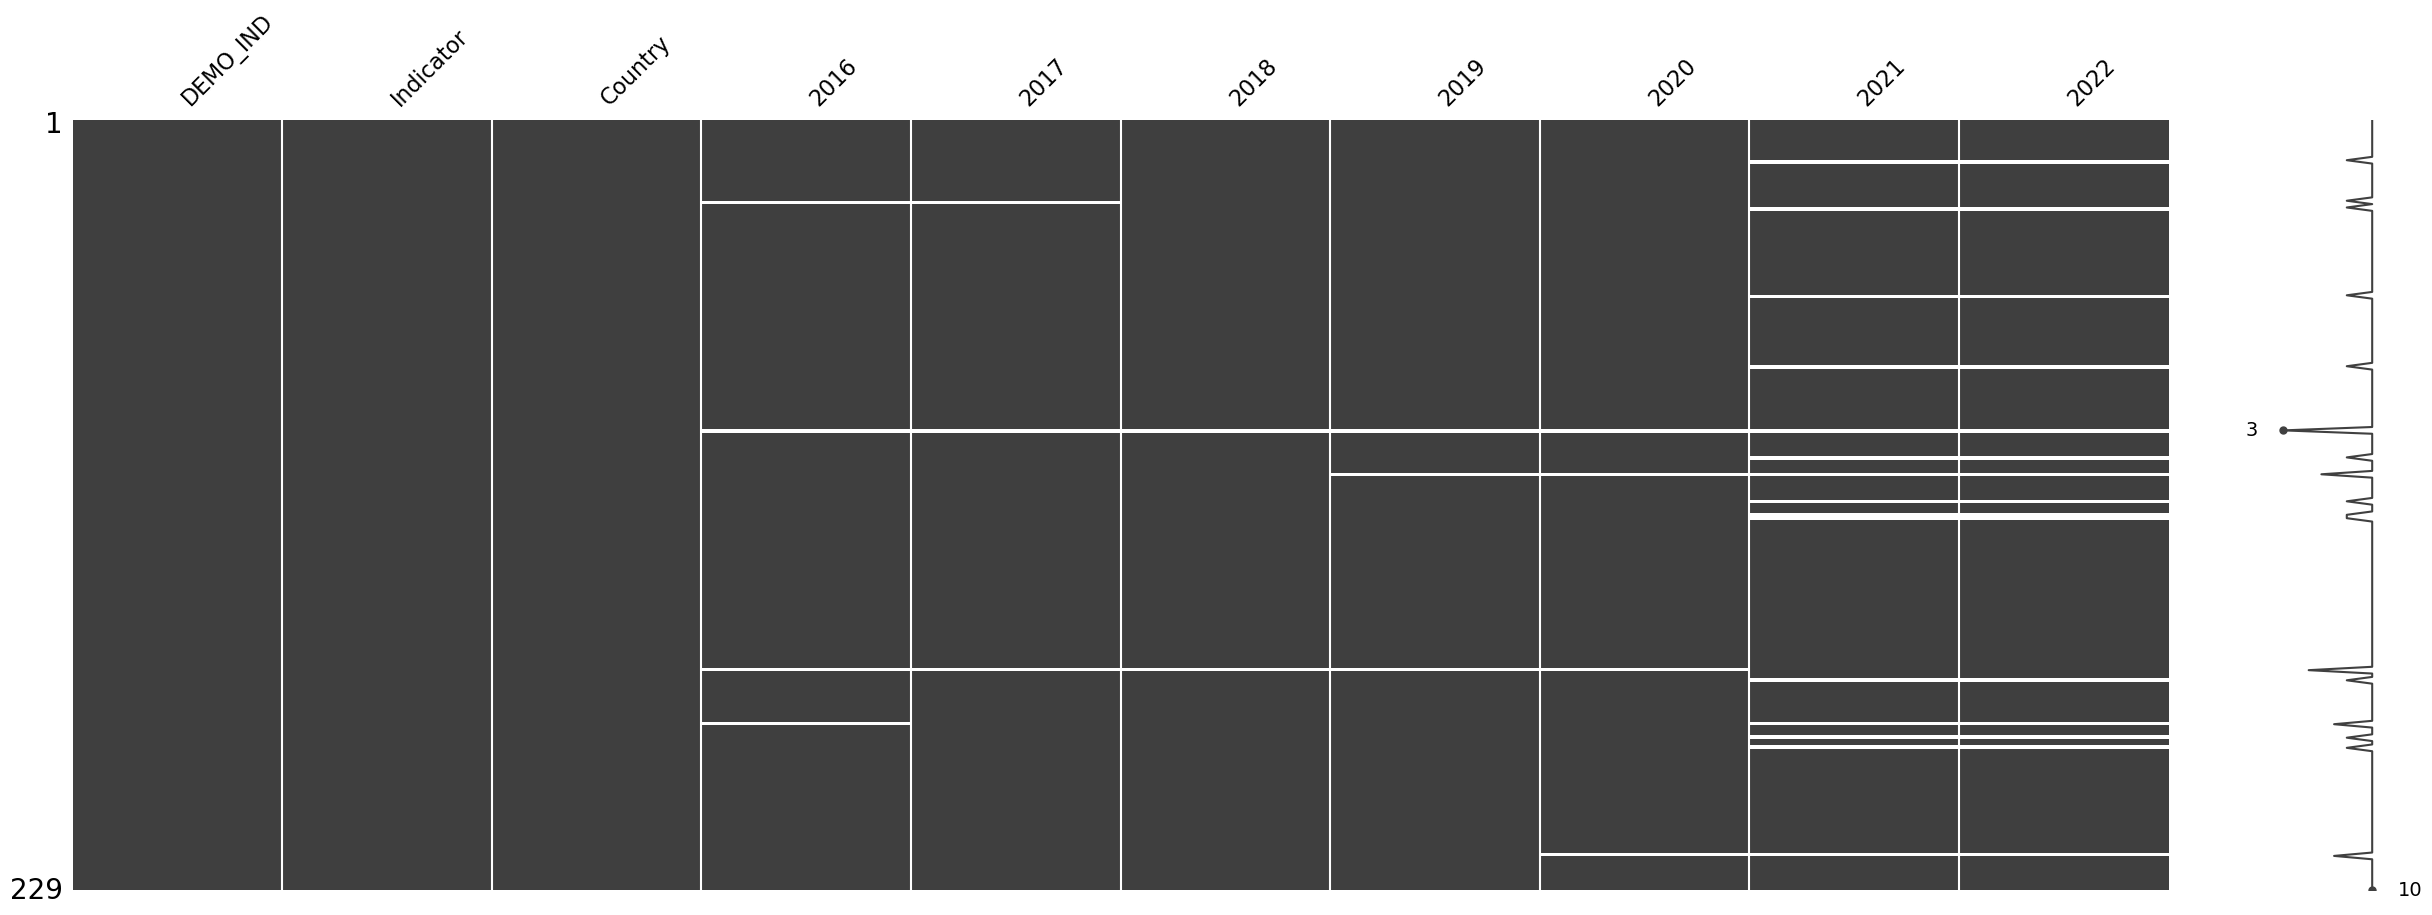

In [274]:
missingno.matrix(df_avg_pop, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

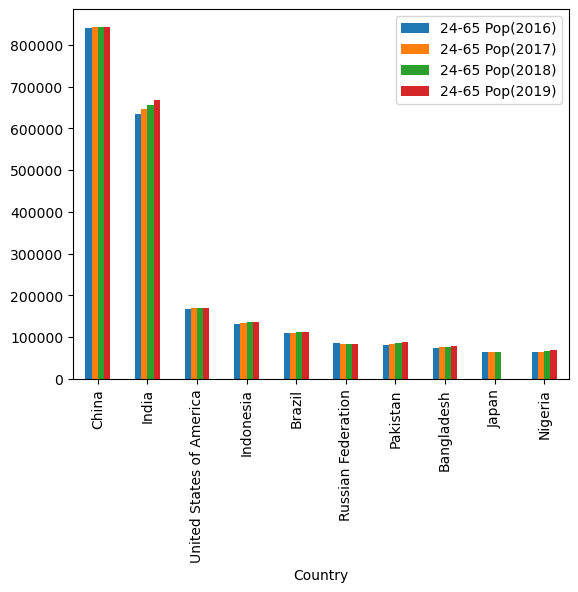

In [320]:
df_avg_pop = df_wide.iloc[916:1145]
df_avg_pop = df_avg_pop.groupby(by=['Country'], sort = False)
df_avg_pop_avg = round(df_avg_pop.mean(),0)
df_avg_pop_data_series = df_avg_pop_avg.iloc[5:5,1]

df_avg_pop_avg = df_avg_pop_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'24-65 Pop(2016)': df_avg_pop_avg[2016],
                                     '24-65 Pop(2017)': df_avg_pop_avg[2017],
                                     '24-65 Pop(2018)': df_avg_pop_avg[2018],
                                     '24-65 Pop(2019)': df_avg_pop_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [249]:
df_TDS = df_wide.iloc[1145:1265]
df_TDS

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
1145,DT_TDS_DECT_GN_ZS,Total debt service (% of GNI),Afghanistan,0.3,0.3,0.3,0.3,0.2,NaN,NaN
1146,DT_TDS_DECT_GN_ZS,Total debt service (% of GNI),Albania,4.9,3.9,7.2,4.3,7.7,NaN,NaN
1147,DT_TDS_DECT_GN_ZS,Total debt service (% of GNI),Algeria,0.2,0.1,0.1,0.1,0.1,NaN,NaN
1148,DT_TDS_DECT_GN_ZS,Total debt service (% of GNI),Angola,23.2,14.1,15.4,18.5,17.2,NaN,NaN
1149,DT_TDS_DECT_GN_ZS,Total debt service (% of GNI),Argentina,4.8,6.4,8.5,10.1,7.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1260,DT_TDS_DECT_GN_ZS,Total debt service (% of GNI),Vanuatu,1.1,1.1,2.1,1.6,2.0,NaN,NaN
1261,DT_TDS_DECT_GN_ZS,Total debt service (% of GNI),Viet Nam,3.0,5.1,6.2,5.2,5.0,NaN,NaN
1262,DT_TDS_DECT_GN_ZS,Total debt service (% of GNI),Yemen,0.4,0.4,0.5,0.5,0.7,NaN,NaN
1263,DT_TDS_DECT_GN_ZS,Total debt service (% of GNI),Zambia,3.7,3.4,5.0,11.4,23.1,NaN,NaN


<AxesSubplot:>

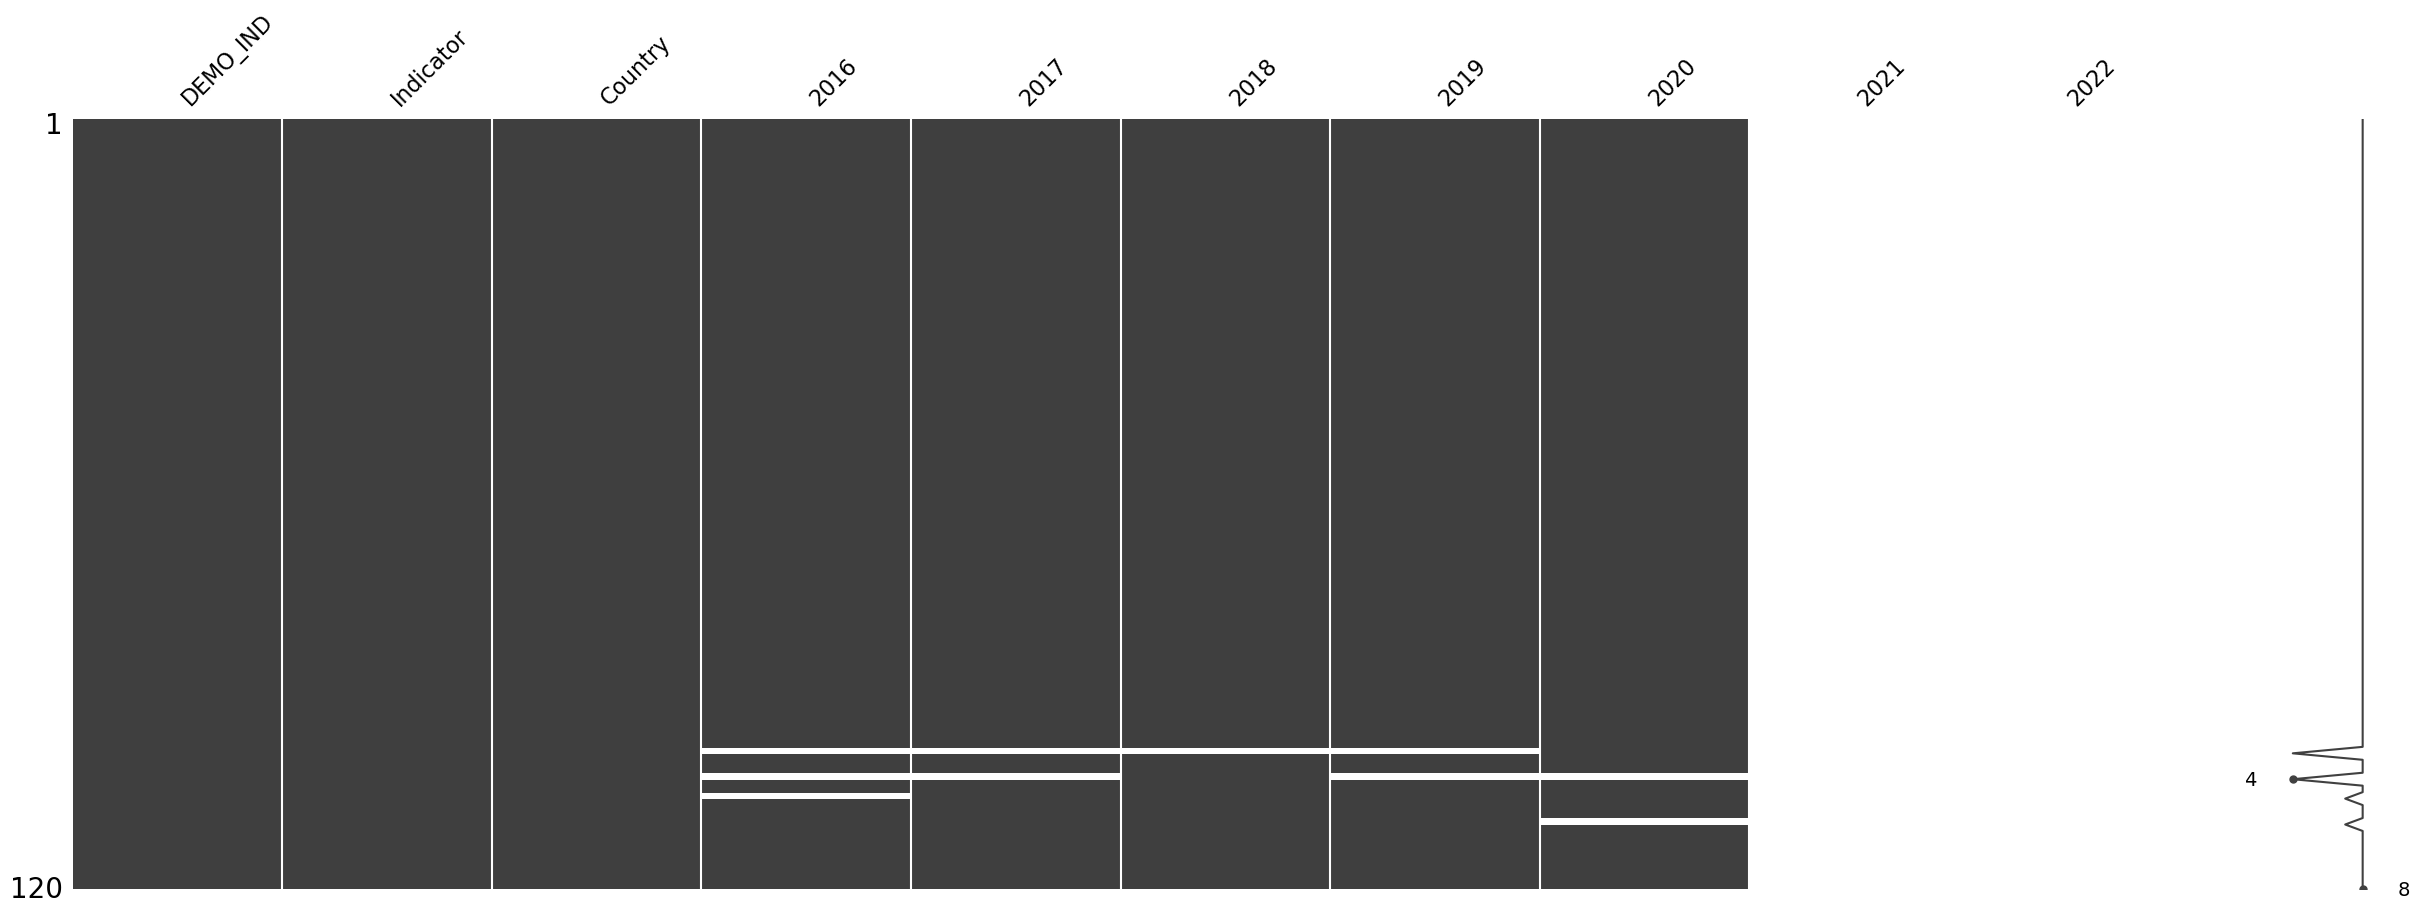

In [275]:
missingno.matrix(df_TDS, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

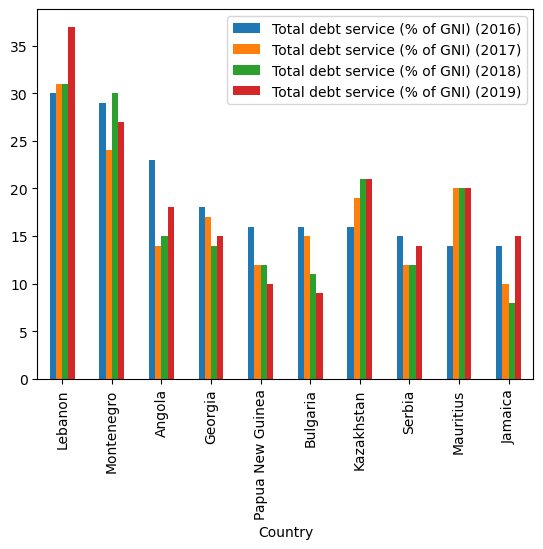

In [341]:
df_TDS = df_wide.iloc[1145:1265]
df_TDS = df_TDS.groupby(by=['Country'], sort = False)
df_TDS_avg = round(df_TDS.mean(),0)
df_TDS_data_series = df_TDS_avg.iloc[5:5,1]

df_TDS_avg = df_TDS_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'Total debt service (% of GNI) (2016)': df_TDS_avg[2016],
                                     'Total debt service (% of GNI) (2017)': df_TDS_avg[2017],
                                     'Total debt service (% of GNI) (2018)': df_TDS_avg[2018],
                                     'Total debt service (% of GNI) (2019)': df_TDS_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [250]:
df_GDP_def = df_wide.iloc[1265:1470]
df_GDP_def

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
1265,NY_GDP_DEFL_ZS,GDP deflator (base year varies by country),Afghanistan,100.0,102.4,104.5,111.3,120.1,NaN,NaN
1266,NY_GDP_DEFL_ZS,GDP deflator (base year varies by country),Albania,105.2,106.7,108.3,109.7,110.4,117.0,NaN
1267,NY_GDP_DEFL_ZS,GDP deflator (base year varies by country),Algeria,94.6,100.7,107.6,107.1,101.2,120.2,NaN
1268,NY_GDP_DEFL_ZS,GDP deflator (base year varies by country),American Samoa,104.2,102.2,103.9,105.9,111.5,NaN,NaN
1269,NY_GDP_DEFL_ZS,GDP deflator (base year varies by country),Andorra,101.8,102.9,104.0,105.4,106.6,108.8,NaN
...,...,...,...,...,...,...,...,...,...,...
1465,NY_GDP_DEFL_ZS,GDP deflator (base year varies by country),Vanuatu,135.5,142.8,147.4,152.2,155.0,159.9,NaN
1466,NY_GDP_DEFL_ZS,GDP deflator (base year varies by country),Viet Nam,143.0,149.2,154.3,157.2,159.7,164.2,NaN
1467,NY_GDP_DEFL_ZS,GDP deflator (base year varies by country),Yemen,3736.5,4429.7,5087.7,5462.7,6629.6,10545.7,NaN
1468,NY_GDP_DEFL_ZS,GDP deflator (base year varies by country),Zambia,166.6,183.4,197.0,212.0,241.2,297.5,NaN


<AxesSubplot:>

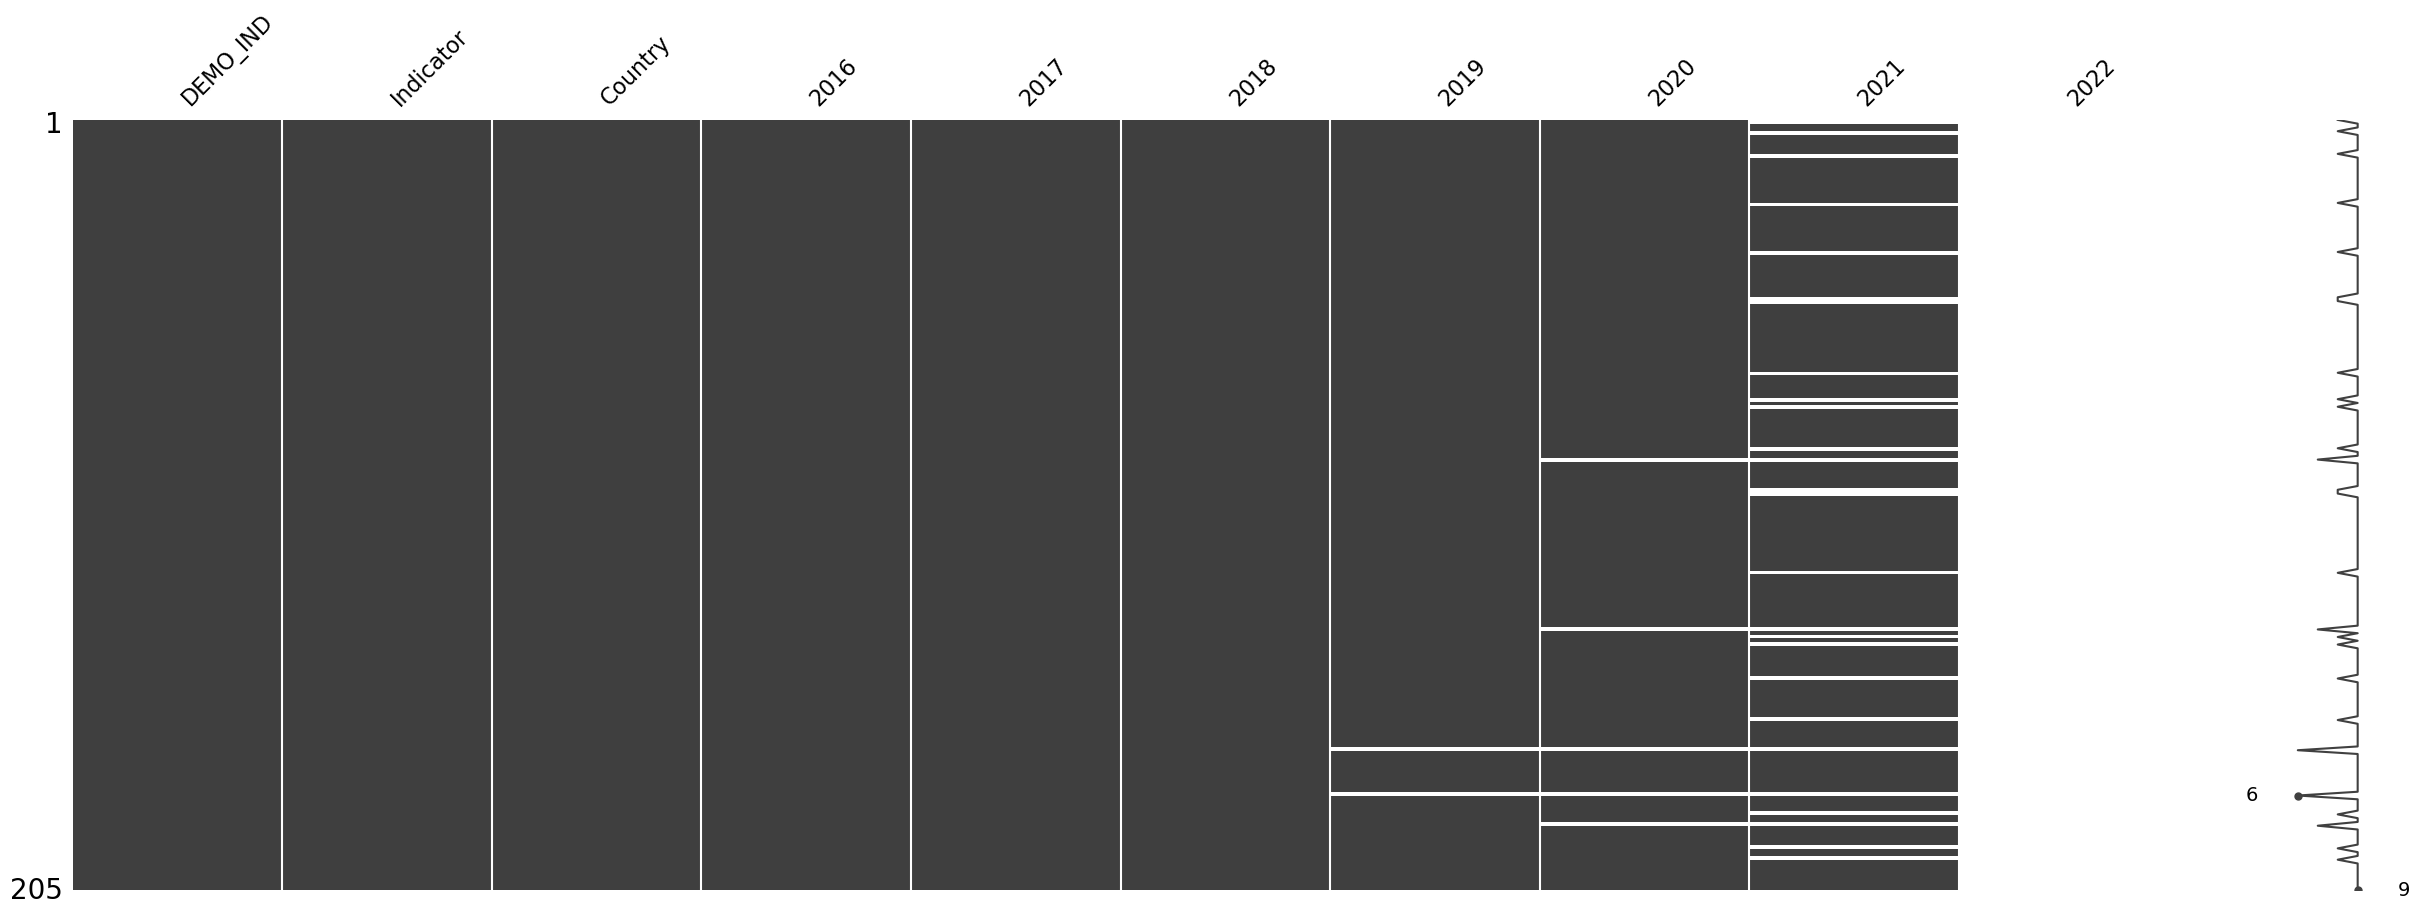

In [276]:
missingno.matrix(df_GDP_def, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

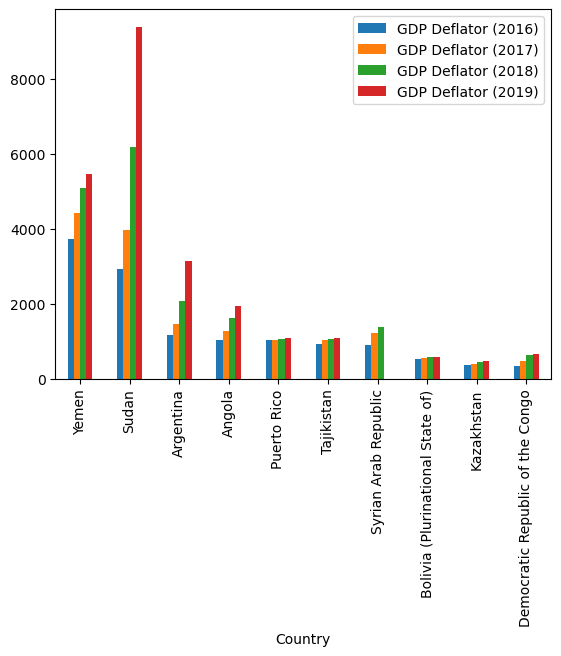

In [340]:
df_GDP_def = df_wide.iloc[1265:1470]
df_GDP_def = df_GDP_def.groupby(by=['Country'], sort = False)
df_GDP_def_avg = round(df_GDP_def.mean(),0)
df_GDP_def_data_series = df_GDP_def_avg.iloc[5:5,1]

df_GDP_def_avg = df_GDP_def_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'GDP Deflator (2016)': df_GDP_def_avg[2016],
                                     'GDP Deflator (2017)': df_GDP_def_avg[2017],
                                     'GDP Deflator (2018)': df_GDP_def_avg[2018],
                                     'GDP Deflator (2019)': df_GDP_def_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [251]:
df_GDP_USD = df_wide.iloc[1470:1678]
df_GDP_USD

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
1470,NY_GDP_MKTP_CD,GDP (current US$),Afghanistan,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN,NaN
1471,NY_GDP_MKTP_CD,GDP (current US$),Albania,1.186120e+10,1.301969e+10,1.515643e+10,1.540183e+10,1.513187e+10,1.826004e+10,NaN
1472,NY_GDP_MKTP_CD,GDP (current US$),Algeria,1.600342e+11,1.700970e+11,1.749109e+11,1.717674e+11,1.450092e+11,1.679831e+11,NaN
1473,NY_GDP_MKTP_CD,GDP (current US$),American Samoa,6.710000e+08,6.120000e+08,6.390000e+08,6.480000e+08,7.090000e+08,NaN,NaN
1474,NY_GDP_MKTP_CD,GDP (current US$),Andorra,2.896610e+09,3.000162e+09,3.218420e+09,3.155149e+09,2.891001e+09,3.329911e+09,NaN
...,...,...,...,...,...,...,...,...,...,...
1673,NY_GDP_MKTP_CD,GDP (current US$),Vanuatu,7.808896e+08,8.800621e+08,9.147370e+08,9.365263e+08,8.968279e+08,9.834693e+08,NaN
1674,NY_GDP_MKTP_CD,GDP (current US$),Viet Nam,2.570960e+11,2.813534e+11,3.087021e+11,3.303913e+11,3.432426e+11,3.626375e+11,NaN
1675,NY_GDP_MKTP_CD,GDP (current US$),Yemen,3.131783e+10,2.684223e+10,2.160616e+10,2.188761e+10,1.884051e+10,2.106169e+10,NaN
1676,NY_GDP_MKTP_CD,GDP (current US$),Zambia,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,2.120306e+10,NaN


<AxesSubplot:>

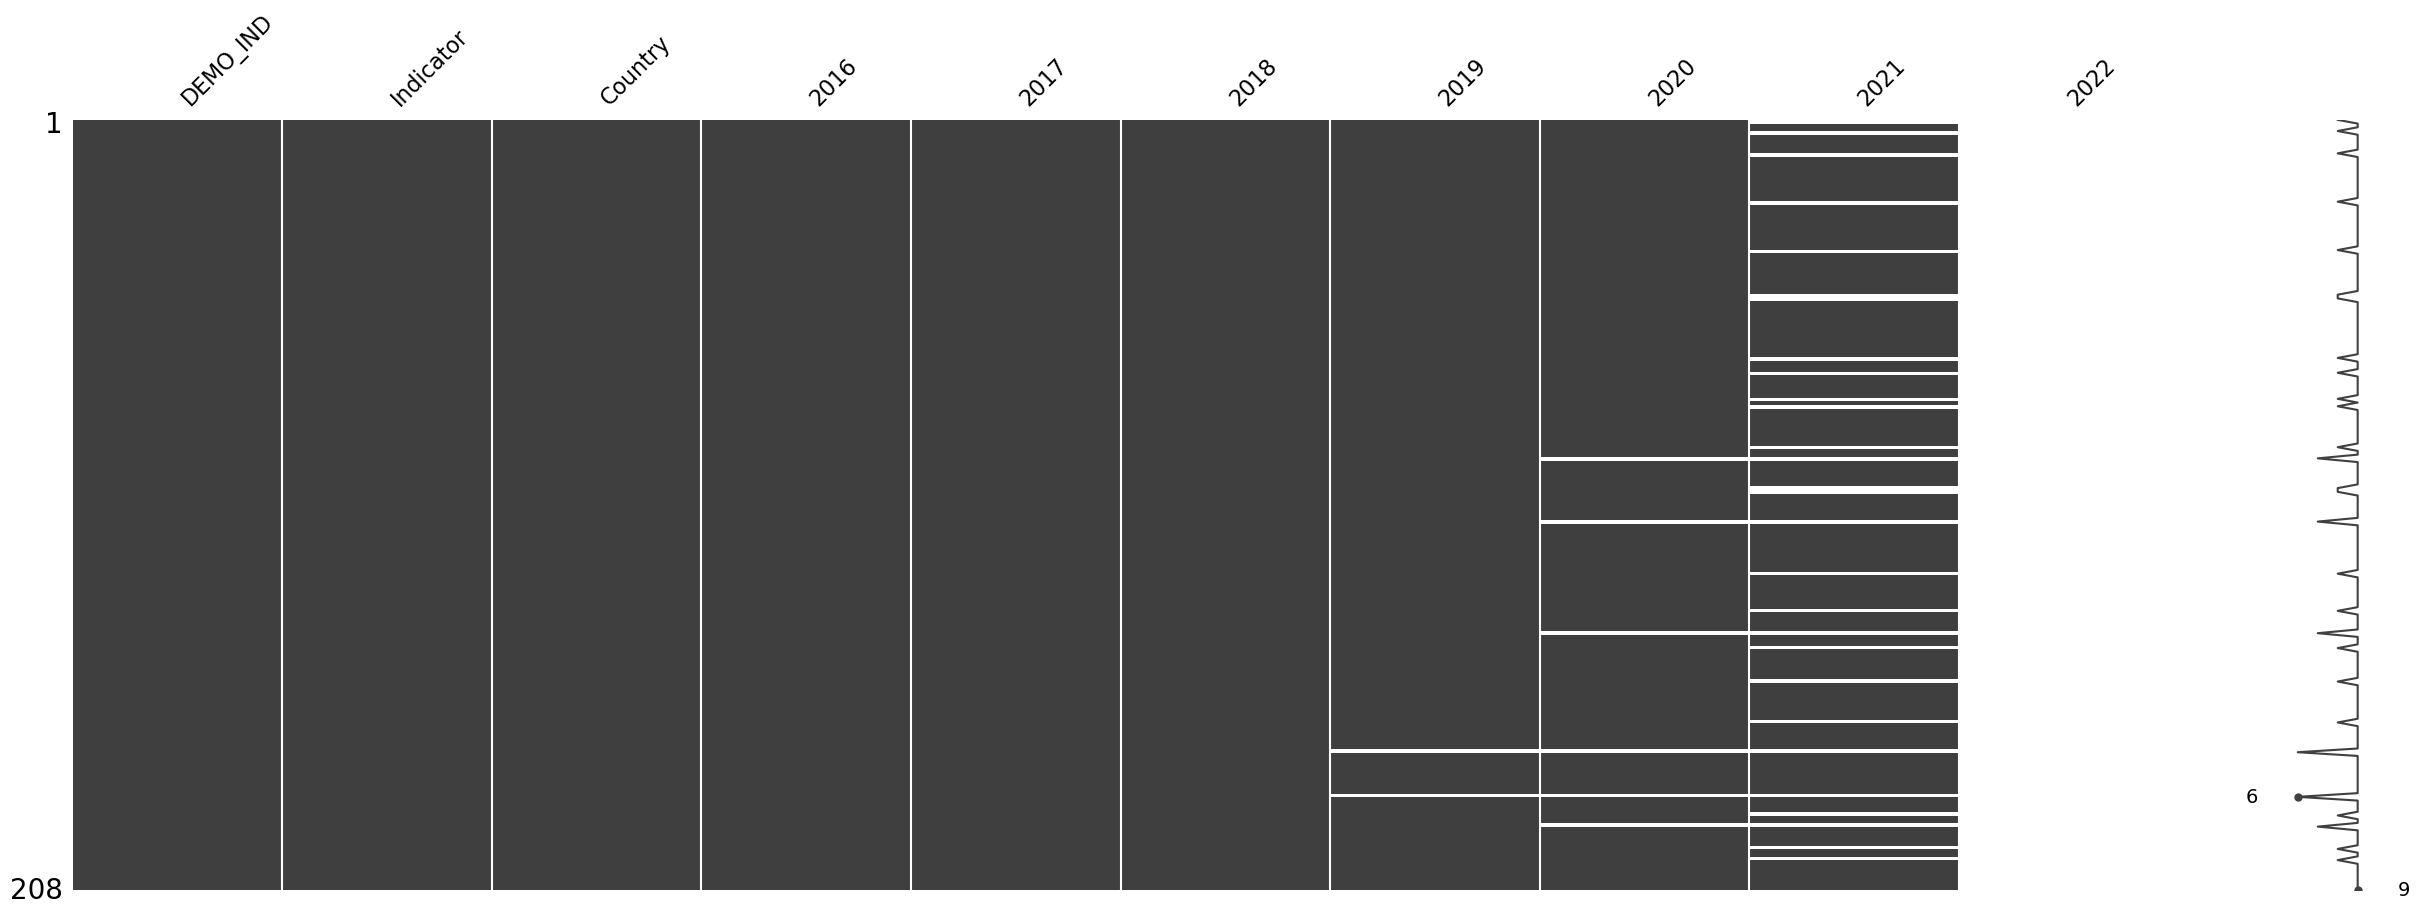

In [277]:
missingno.matrix(df_GDP_USD, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

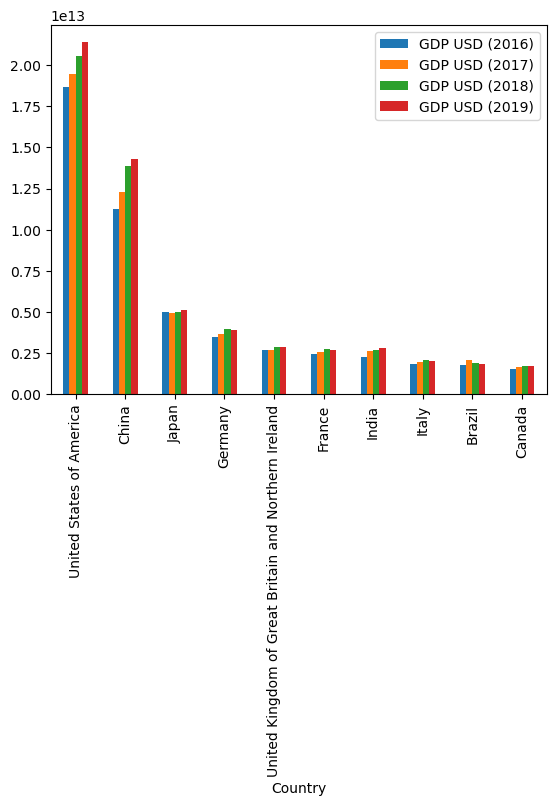

In [339]:
df_GDP_USD = df_wide.iloc[1470:1678]
df_GDP_USD = df_GDP_USD.groupby(by=['Country'], sort = False)
df_GDP_USD_avg = round(df_GDP_USD.mean(),0)
ddf_GDP_USD_data_series = df_GDP_USD_avg.iloc[5:5,1]

df_GDP_USD_avg = df_GDP_USD_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'GDP USD (2016)': df_GDP_USD_avg[2016],
                                     'GDP USD (2017)': df_GDP_USD_avg[2017],
                                     'GDP USD (2018)': df_GDP_USD_avg[2018],
                                     'GDP USD (2019)': df_GDP_USD_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [252]:
df_GDP_LCU = df_wide.iloc[1678:1892]
df_GDP_LCU

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
1678,NY_GDP_MKTP_CN,GDP (current LCU),Afghanistan,1.222917e+12,1.285460e+12,1.327690e+12,1.469596e+12,1.547289e+12,NaN,NaN
1679,NY_GDP_MKTP_CN,GDP (current LCU),Albania,1.472479e+12,1.550645e+12,1.636731e+12,1.691903e+12,1.644077e+12,1.890280e+12,NaN
1680,NY_GDP_MKTP_CN,GDP (current LCU),Algeria,1.751464e+13,1.887618e+13,2.039352e+13,2.050106e+13,1.838380e+13,2.268854e+13,NaN
1681,NY_GDP_MKTP_CN,GDP (current LCU),American Samoa,6.710000e+08,6.120000e+08,6.390000e+08,6.480000e+08,7.090000e+08,NaN,NaN
1682,NY_GDP_MKTP_CN,GDP (current LCU),Andorra,2.616860e+09,2.655760e+09,2.725270e+09,2.818420e+09,2.531090e+09,2.815420e+09,NaN
...,...,...,...,...,...,...,...,...,...,...
1887,NY_GDP_MKTP_CN,GDP (current LCU),Venezuela (Bolivarian Republic of),2.809073e+08,2.008918e+09,2.725610e+12,4.184950e+14,7.192260e+15,NaN,NaN
1888,NY_GDP_MKTP_CN,GDP (current LCU),Viet Nam,5.639400e+15,6.293900e+15,6.977300e+15,7.615600e+15,7.966100e+15,8.398606e+15,NaN
1889,NY_GDP_MKTP_CN,GDP (current LCU),Yemen,8.891000e+12,1.000600e+13,1.157873e+13,1.260626e+13,1.399861e+13,2.180869e+13,NaN
1890,NY_GDP_MKTP_CN,GDP (current LCU),Zambia,2.160980e+11,2.462520e+11,2.751745e+11,3.004487e+11,3.322232e+11,4.244534e+11,NaN


<AxesSubplot:>

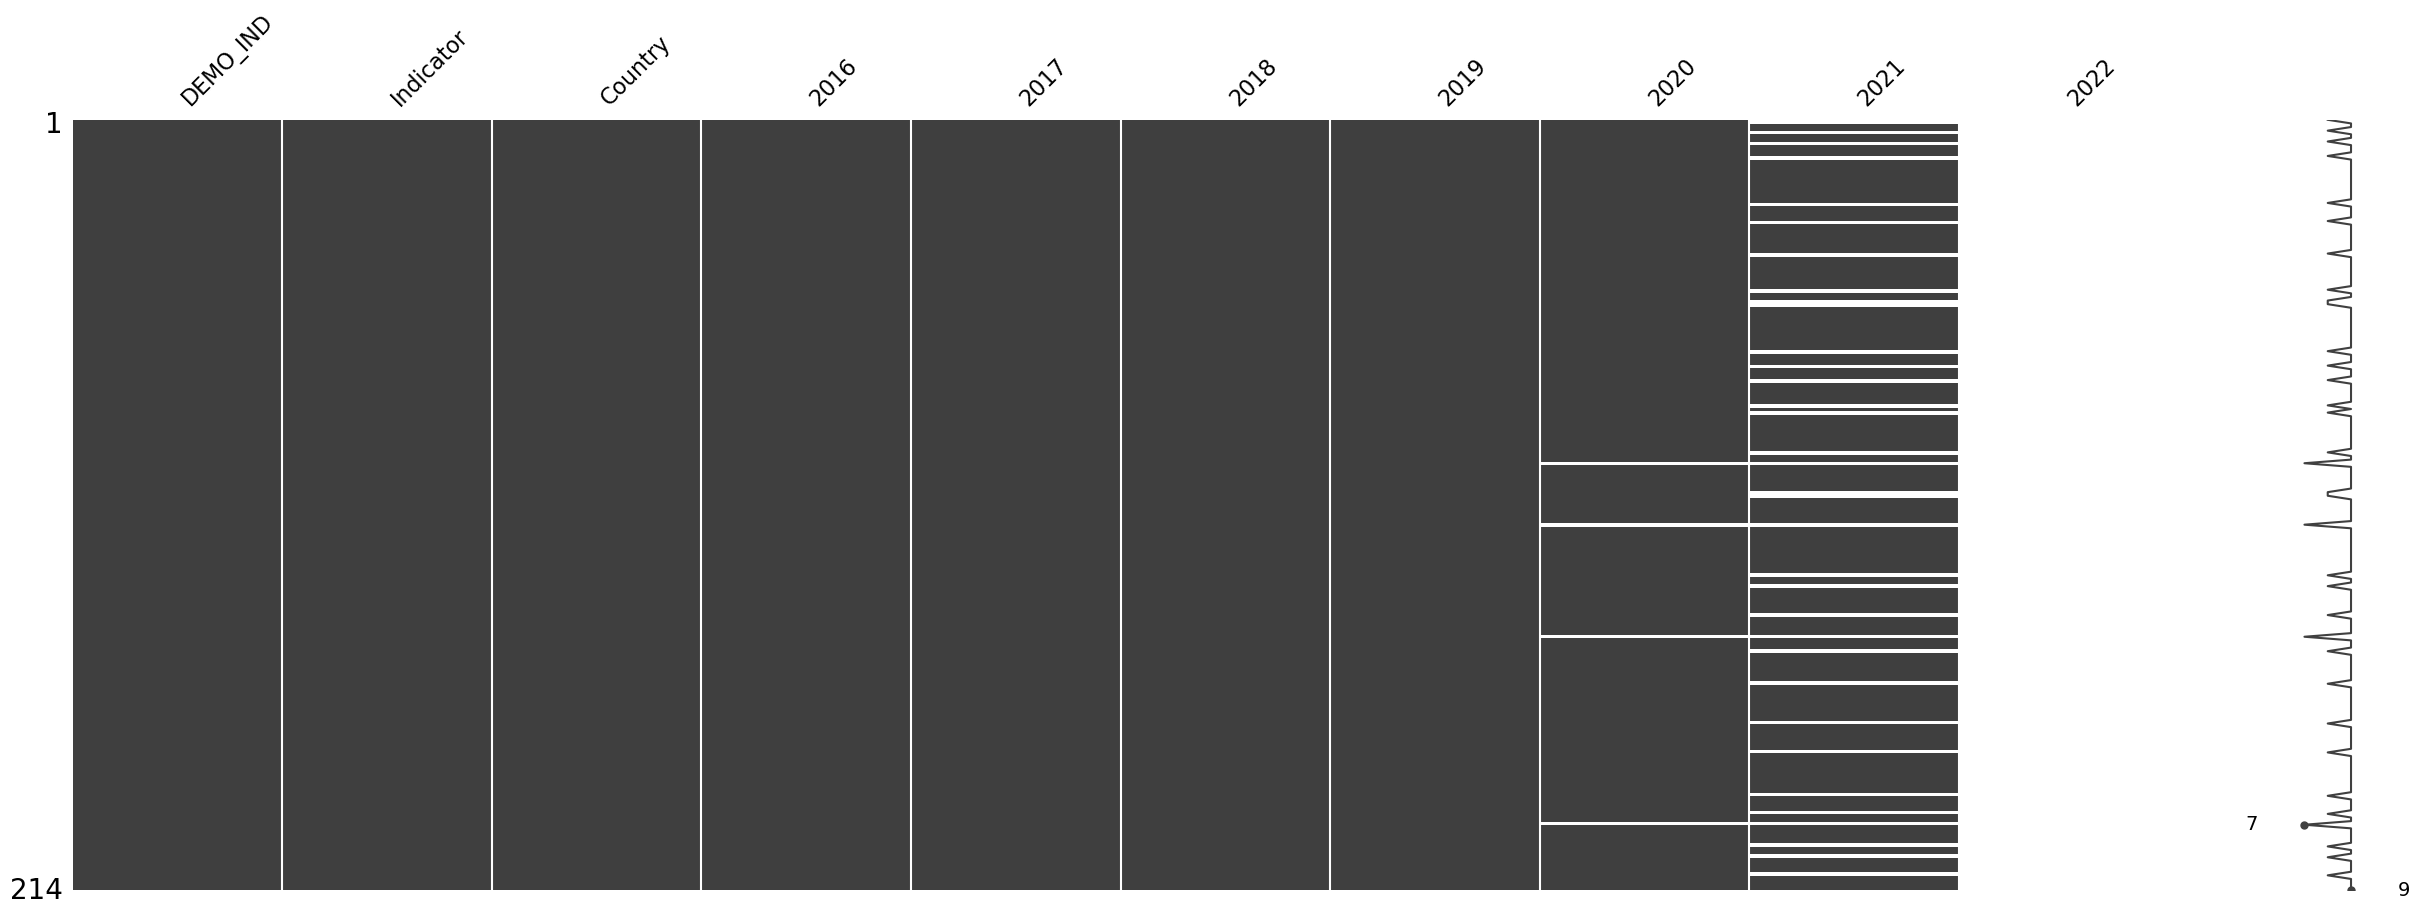

In [278]:
missingno.matrix(df_GDP_LCU, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

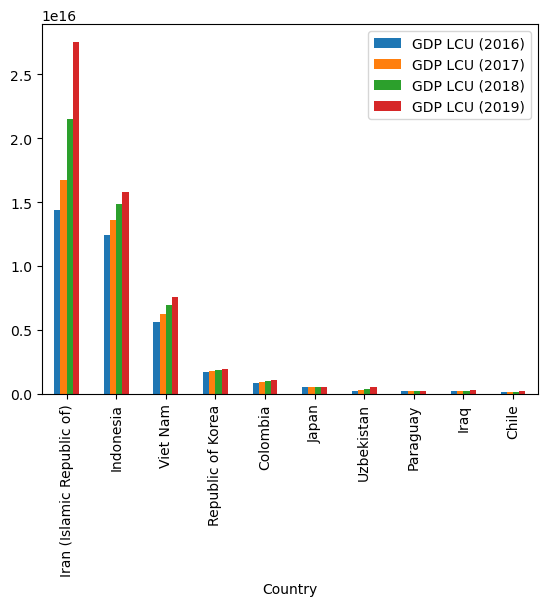

In [338]:
df_GDP_LCU = df_wide.iloc[1678:1892]
df_GDP_LCU = df_GDP_LCU.groupby(by=['Country'], sort = False)
df_GDP_LCU_avg = round(df_GDP_LCU.mean(),0)
df_GDP_LCU_data_series = df_GDP_LCU_avg.iloc[5:5,1]

df_GDP_LCU_avg = df_GDP_LCU_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'GDP LCU (2016)': df_GDP_LCU_avg[2016],
                                     'GDP LCU (2017)': df_GDP_LCU_avg[2017],
                                     'GDP LCU (2018)': df_GDP_LCU_avg[2018],
                                     'GDP LCU (2019)': df_GDP_LCU_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [253]:
df_GDP_CMP = df_wide.iloc[1892:2097]
df_GDP_CMP

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
1892,NY_GDP_MKTP_KD,GDP at market prices (constant 2010 US$),Afghanistan,1.956671e+10,2.008464e+10,2.032349e+10,2.111846e+10,2.062195e+10,NaN,NaN
1893,NY_GDP_MKTP_KD,GDP at market prices (constant 2010 US$),Albania,1.176432e+10,1.221163e+10,1.270246e+10,1.296769e+10,1.251621e+10,1.358560e+10,NaN
1894,NY_GDP_MKTP_KD,GDP at market prices (constant 2010 US$),Algeria,1.712906e+11,1.735174e+11,1.754261e+11,1.771803e+11,1.681441e+11,1.746140e+11,NaN
1895,NY_GDP_MKTP_KD,GDP at market prices (constant 2010 US$),American Samoa,6.616977e+08,6.154611e+08,6.319008e+08,6.288183e+08,6.534779e+08,NaN,NaN
1896,NY_GDP_MKTP_KD,GDP at market prices (constant 2010 US$),Andorra,2.893377e+09,2.903390e+09,2.949518e+09,3.008967e+09,2.672446e+09,2.911614e+09,NaN
...,...,...,...,...,...,...,...,...,...,...
2092,NY_GDP_MKTP_KD,GDP at market prices (constant 2010 US$),Vanuatu,7.651387e+08,8.134619e+08,8.370542e+08,8.641846e+08,8.175021e+08,8.218483e+08,NaN
2093,NY_GDP_MKTP_KD,GDP at market prices (constant 2010 US$),Viet Nam,2.552635e+11,2.729788e+11,2.926333e+11,3.135566e+11,3.227752e+11,3.311316e+11,NaN
2094,NY_GDP_MKTP_KD,GDP at market prices (constant 2010 US$),Yemen,3.846527e+10,3.651439e+10,3.678914e+10,3.730419e+10,3.413334e+10,3.342967e+10,NaN
2095,NY_GDP_MKTP_KD,GDP at market prices (constant 2010 US$),Zambia,2.205381e+10,2.282665e+10,2.374759e+10,2.408986e+10,2.341895e+10,2.425566e+10,NaN


<AxesSubplot:>

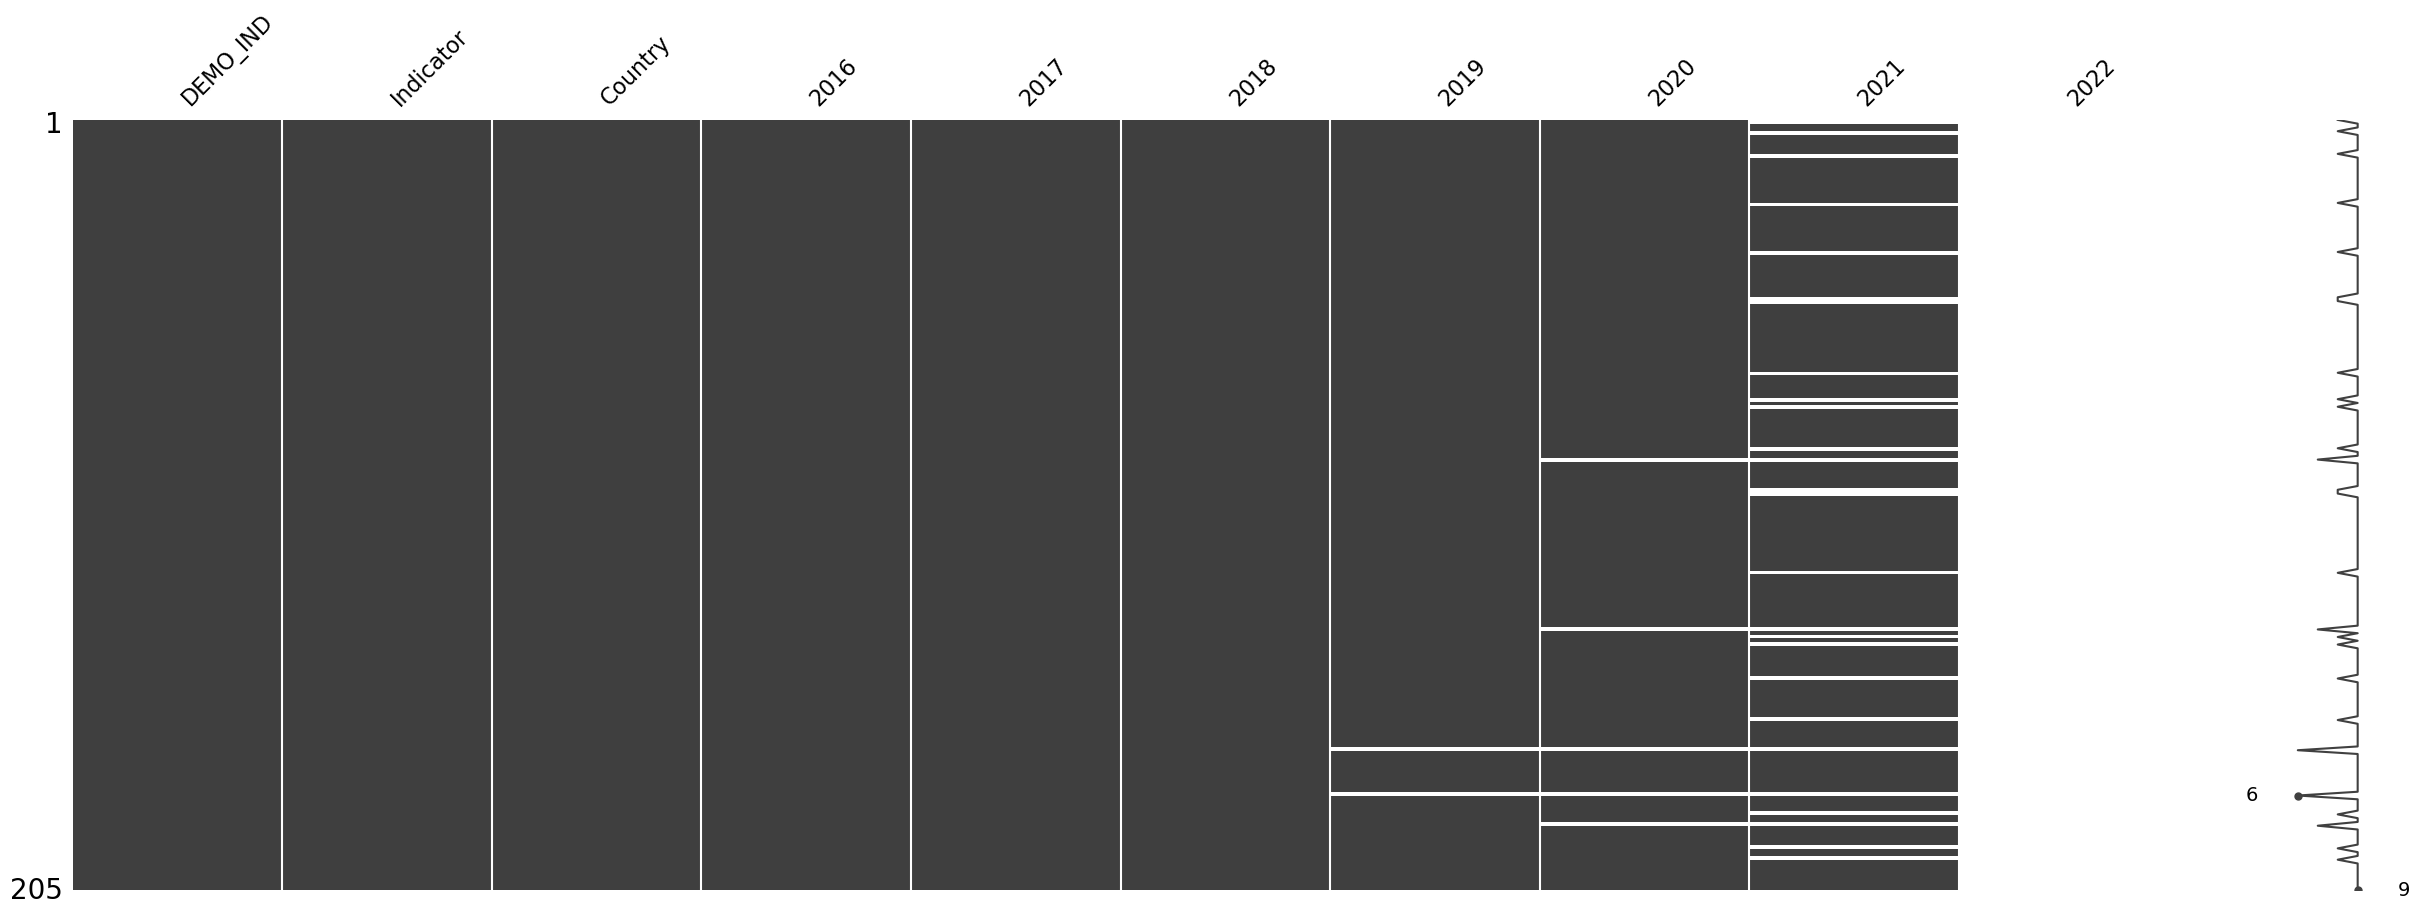

In [279]:
missingno.matrix(df_GDP_CMP, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

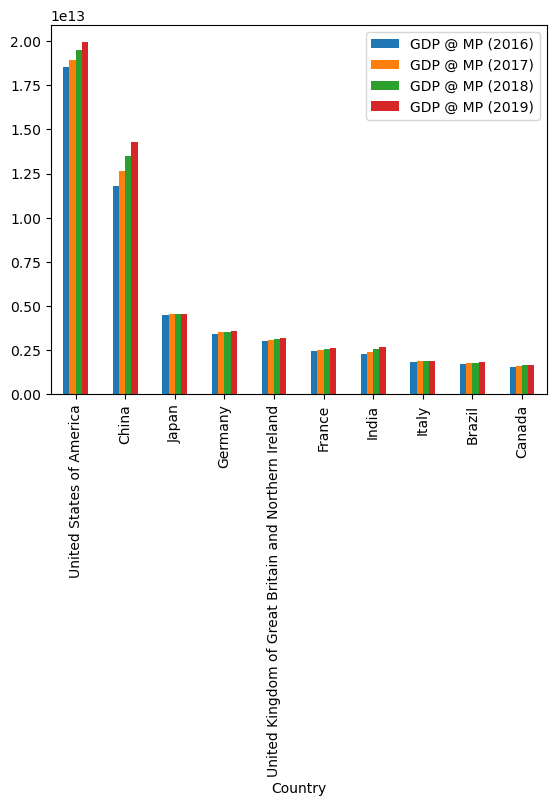

In [337]:
df_GDP_CMP = df_wide.iloc[1892:2097]
df_GDP_CMP = df_GDP_CMP.groupby(by=['Country'], sort = False)
df_GDP_CMP_avg = round(df_GDP_CMP.mean(),0)
df_GDP_CMP_data_series = df_GDP_CMP_avg.iloc[5:5,1]

df_GDP_CMP_avg = df_GDP_CMP_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'GDP @ MP (2016)': df_GDP_CMP_avg[2016],
                                     'GDP @ MP (2017)': df_GDP_CMP_avg[2017],
                                     'GDP @ MP (2018)': df_GDP_CMP_avg[2018],
                                     'GDP @ MP (2019)': df_GDP_CMP_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [254]:
df_GDP_growth = df_wide.iloc[2097:2302]
df_GDP_growth

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
2097,NY_GDP_MKTP_KD_ZG,GDP growth (annual %),Afghanistan,2.3,2.6,1.2,3.9,-2.4,NaN,NaN
2098,NY_GDP_MKTP_KD_ZG,GDP growth (annual %),Albania,3.3,3.8,4.0,2.1,-3.5,8.5,NaN
2099,NY_GDP_MKTP_KD_ZG,GDP growth (annual %),Algeria,3.2,1.3,1.1,1.0,-5.1,3.8,NaN
2100,NY_GDP_MKTP_KD_ZG,GDP growth (annual %),American Samoa,-1.7,-7.0,2.7,-0.5,3.9,NaN,NaN
2101,NY_GDP_MKTP_KD_ZG,GDP growth (annual %),Andorra,3.7,0.3,1.6,2.0,-11.2,8.9,NaN
...,...,...,...,...,...,...,...,...,...,...
2297,NY_GDP_MKTP_KD_ZG,GDP growth (annual %),Vanuatu,4.7,6.3,2.9,3.2,-5.4,0.5,NaN
2298,NY_GDP_MKTP_KD_ZG,GDP growth (annual %),Viet Nam,6.7,6.9,7.2,7.2,2.9,2.6,NaN
2299,NY_GDP_MKTP_KD_ZG,GDP growth (annual %),Yemen,-9.4,-5.1,0.8,1.4,-8.5,-2.1,NaN
2300,NY_GDP_MKTP_KD_ZG,GDP growth (annual %),Zambia,3.8,3.5,4.0,1.4,-2.8,3.6,NaN


<AxesSubplot:>

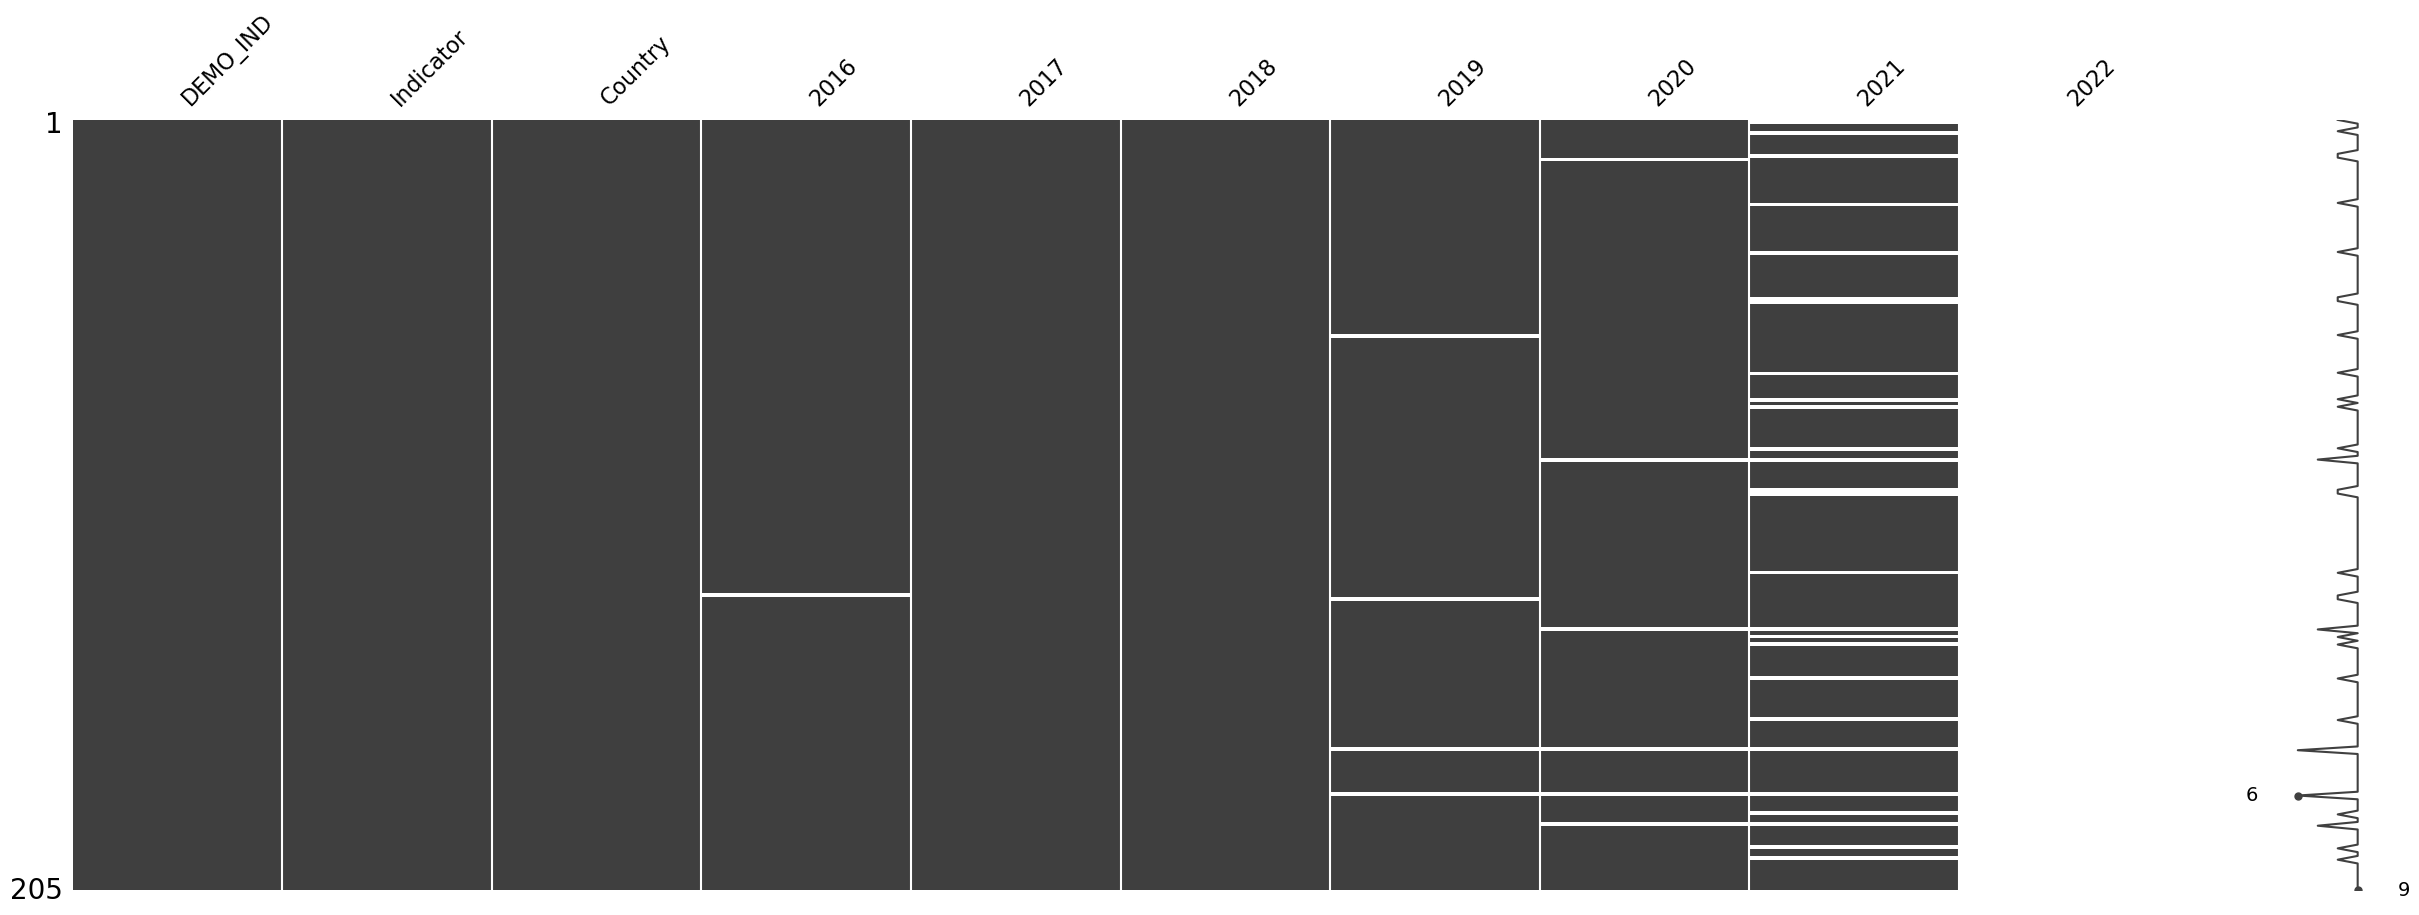

In [280]:
missingno.matrix(df_GDP_growth, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

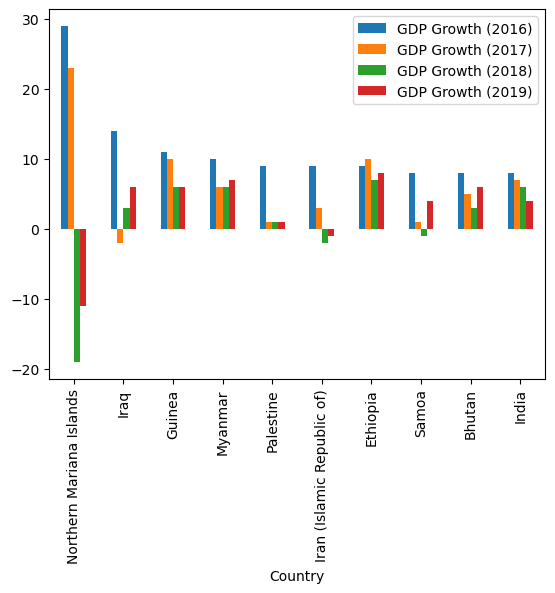

In [335]:
df_GDP_growth = df_wide.iloc[2097:2302]
df_GDP_growth = df_GDP_growth.groupby(by=['Country'], sort = False)
df_GDP_growth_avg = round(df_GDP_growth.mean(),0)
df_GDP_growth_data_series = df_GDP_growth_avg.iloc[5:5,1]

df_GDP_growth_avg = df_GDP_growth_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'GDP Growth (2016)': df_GDP_growth_avg[2016],
                                     'GDP Growth (2017)': df_GDP_growth_avg[2017],
                                     'GDP Growth (2018)': df_GDP_growth_avg[2018],
                                     'GDP Growth (2019)': df_GDP_growth_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [255]:
df_GDP_percap = df_wide.iloc[2893:3101]
df_GDP_percap

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
2893,NY_GDP_PCAP_CD,GDP per capita (current US$),Afghanistan,512.0,517.0,486.0,494.0,517.0,NaN,NaN
2894,NY_GDP_PCAP_CD,GDP per capita (current US$),Albania,4124.0,4531.0,5288.0,5396.0,5332.0,6494.0,NaN
2895,NY_GDP_PCAP_CD,GDP per capita (current US$),Algeria,3946.0,4110.0,4142.0,3990.0,3307.0,3765.0,NaN
2896,NY_GDP_PCAP_CD,GDP per capita (current US$),American Samoa,12038.0,11004.0,11522.0,11715.0,12845.0,NaN,NaN
2897,NY_GDP_PCAP_CD,GDP per capita (current US$),Andorra,37475.0,38965.0,41793.0,40898.0,37417.0,43048.0,NaN
...,...,...,...,...,...,...,...,...,...,...
3096,NY_GDP_PCAP_CD,GDP per capita (current US$),Vanuatu,2806.0,3083.0,3125.0,3123.0,2920.0,3127.0,NaN
3097,NY_GDP_PCAP_CD,GDP per capita (current US$),Viet Nam,2746.0,2974.0,3231.0,3425.0,3526.0,3694.0,NaN
3098,NY_GDP_PCAP_CD,GDP per capita (current US$),Yemen,1153.0,964.0,758.0,751.0,632.0,691.0,NaN
3099,NY_GDP_PCAP_CD,GDP per capita (current US$),Zambia,1281.0,1535.0,1516.0,1305.0,985.0,1121.0,NaN


<AxesSubplot:>

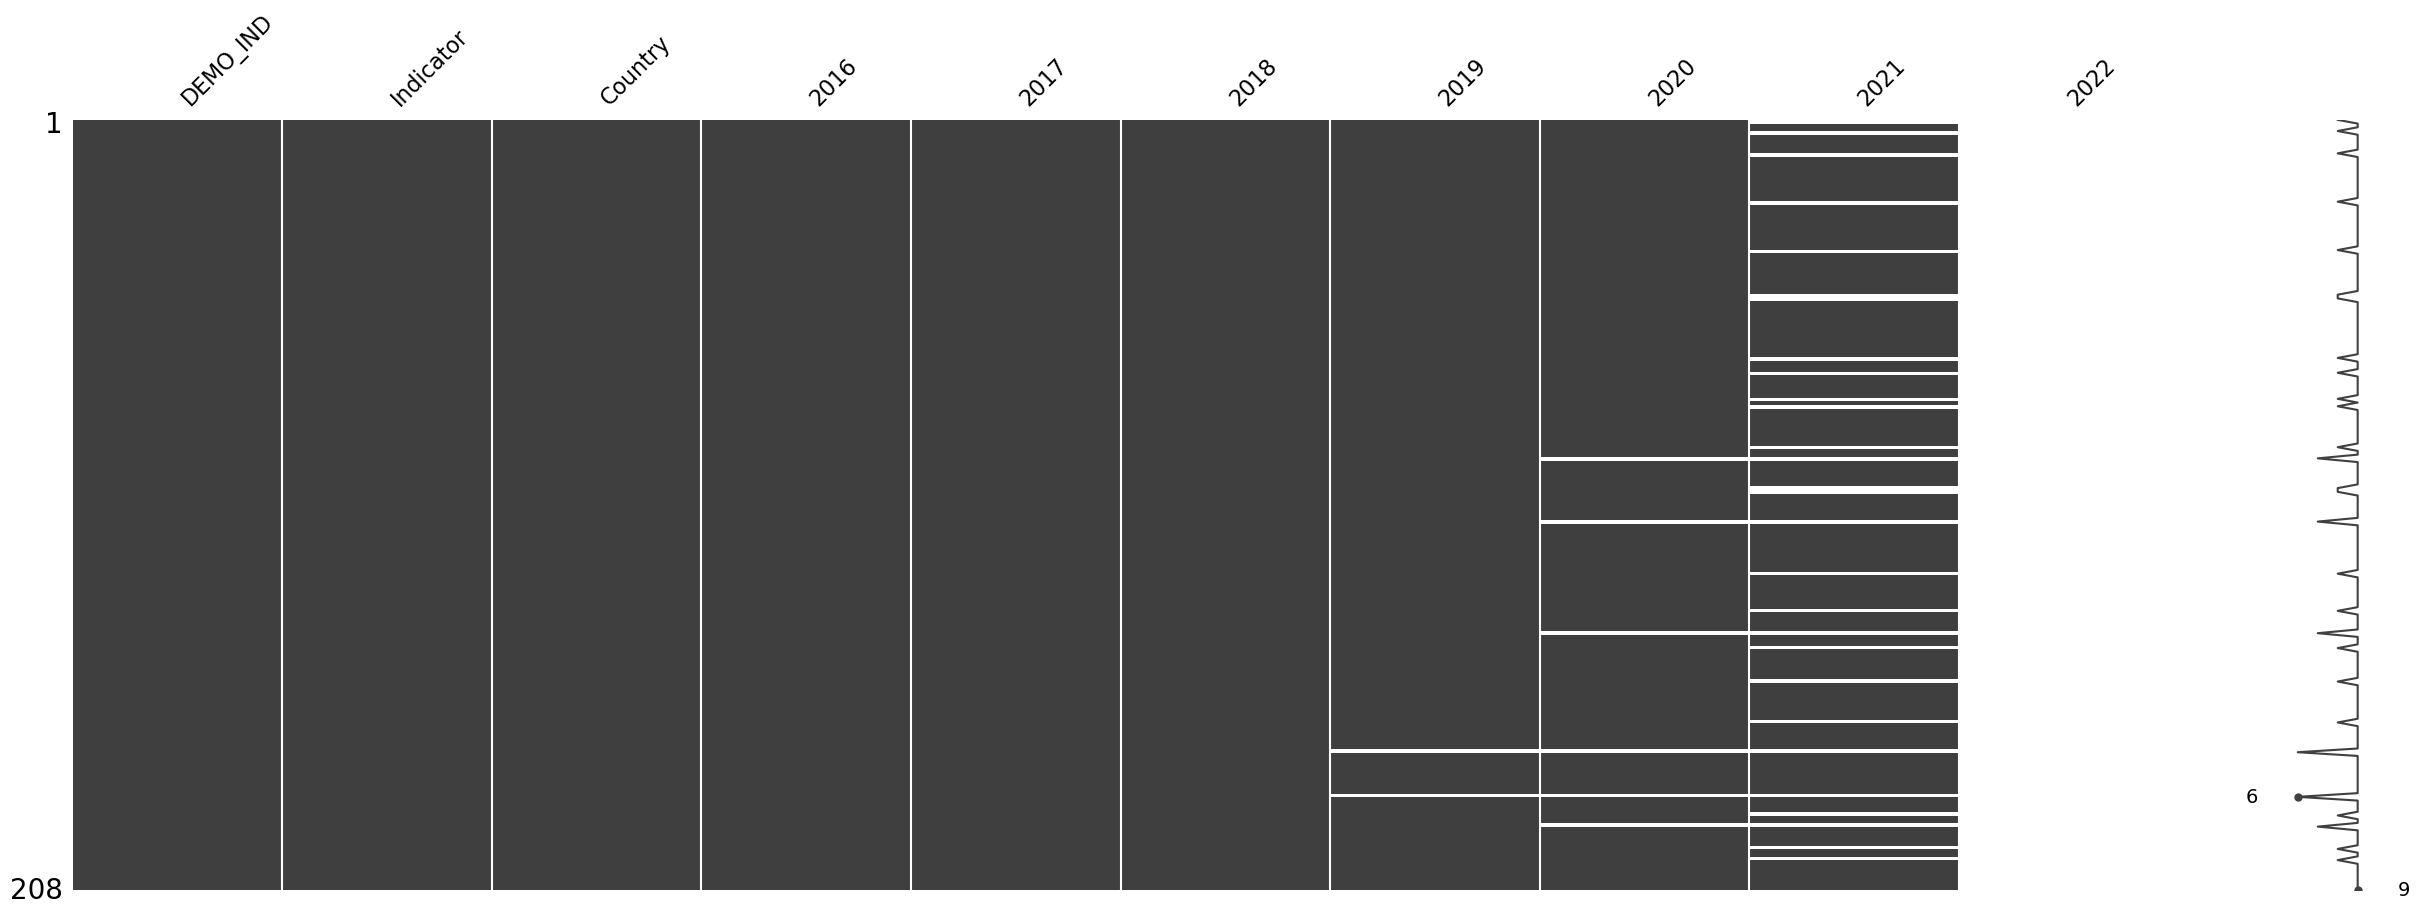

In [281]:
missingno.matrix(df_GDP_percap, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

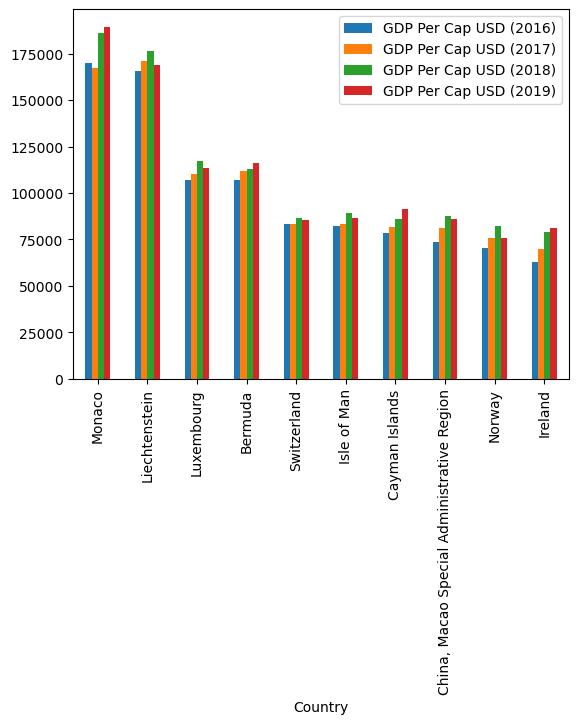

In [333]:
df_GDP_percap = df_wide.iloc[2893:3101]
df_GDP_percap = df_GDP_percap.groupby(by=['Country'], sort = False)
df_GDP_percap_avg = round(df_GDP_percap.mean(),0)
df_GDP_percap_data_series = df_GDP_percap_avg.iloc[5:5,1]

df_GDP_percap_avg = df_GDP_percap_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'GDP Per Cap USD (2016)': df_GDP_percap_avg[2016],
                                     'GDP Per Cap USD (2017)': df_GDP_percap_avg[2017],
                                     'GDP Per Cap USD (2018)': df_GDP_percap_avg[2018],
                                     'GDP Per Cap USD (2019)': df_GDP_percap_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [256]:
df_GDP_percapLCU = df_wide.iloc[3101:3315]
df_GDP_percapLCU 

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
3101,NY_GDP_PCAP_CN,GDP per capita (current LCU),Afghanistan,34562.0,35416.0,35718.0,38631.0,39747.0,NaN,NaN
3102,NY_GDP_PCAP_CN,GDP per capita (current LCU),Albania,511971.0,539644.0,571011.0,592779.0,579339.0,672299.0,NaN
3103,NY_GDP_PCAP_CN,GDP per capita (current LCU),Algeria,431912.0,456066.0,482934.0,476181.0,419233.0,508522.0,NaN
3104,NY_GDP_PCAP_CN,GDP per capita (current LCU),American Samoa,12038.0,11004.0,11522.0,11715.0,12845.0,NaN,NaN
3105,NY_GDP_PCAP_CN,GDP per capita (current LCU),Andorra,33855.0,34492.0,35389.0,36534.0,32759.0,36397.0,NaN
...,...,...,...,...,...,...,...,...,...,...
3310,NY_GDP_PCAP_CN,GDP per capita (current LCU),Venezuela (Bolivarian Republic of),9.0,68.0,94354.0,14675884.0,252928512.0,NaN,NaN
3311,NY_GDP_PCAP_CN,GDP per capita (current LCU),Viet Nam,60223983.0,66531260.0,73025590.0,78949135.0,81839079.0,85552678.0,NaN
3312,NY_GDP_PCAP_CN,GDP per capita (current LCU),Yemen,327257.0,359478.0,406290.0,432285.0,469343.0,715259.0,NaN
3313,NY_GDP_PCAP_CN,GDP per capita (current LCU),Zambia,13206.0,14611.0,15859.0,16821.0,18071.0,22433.0,NaN


<AxesSubplot:>

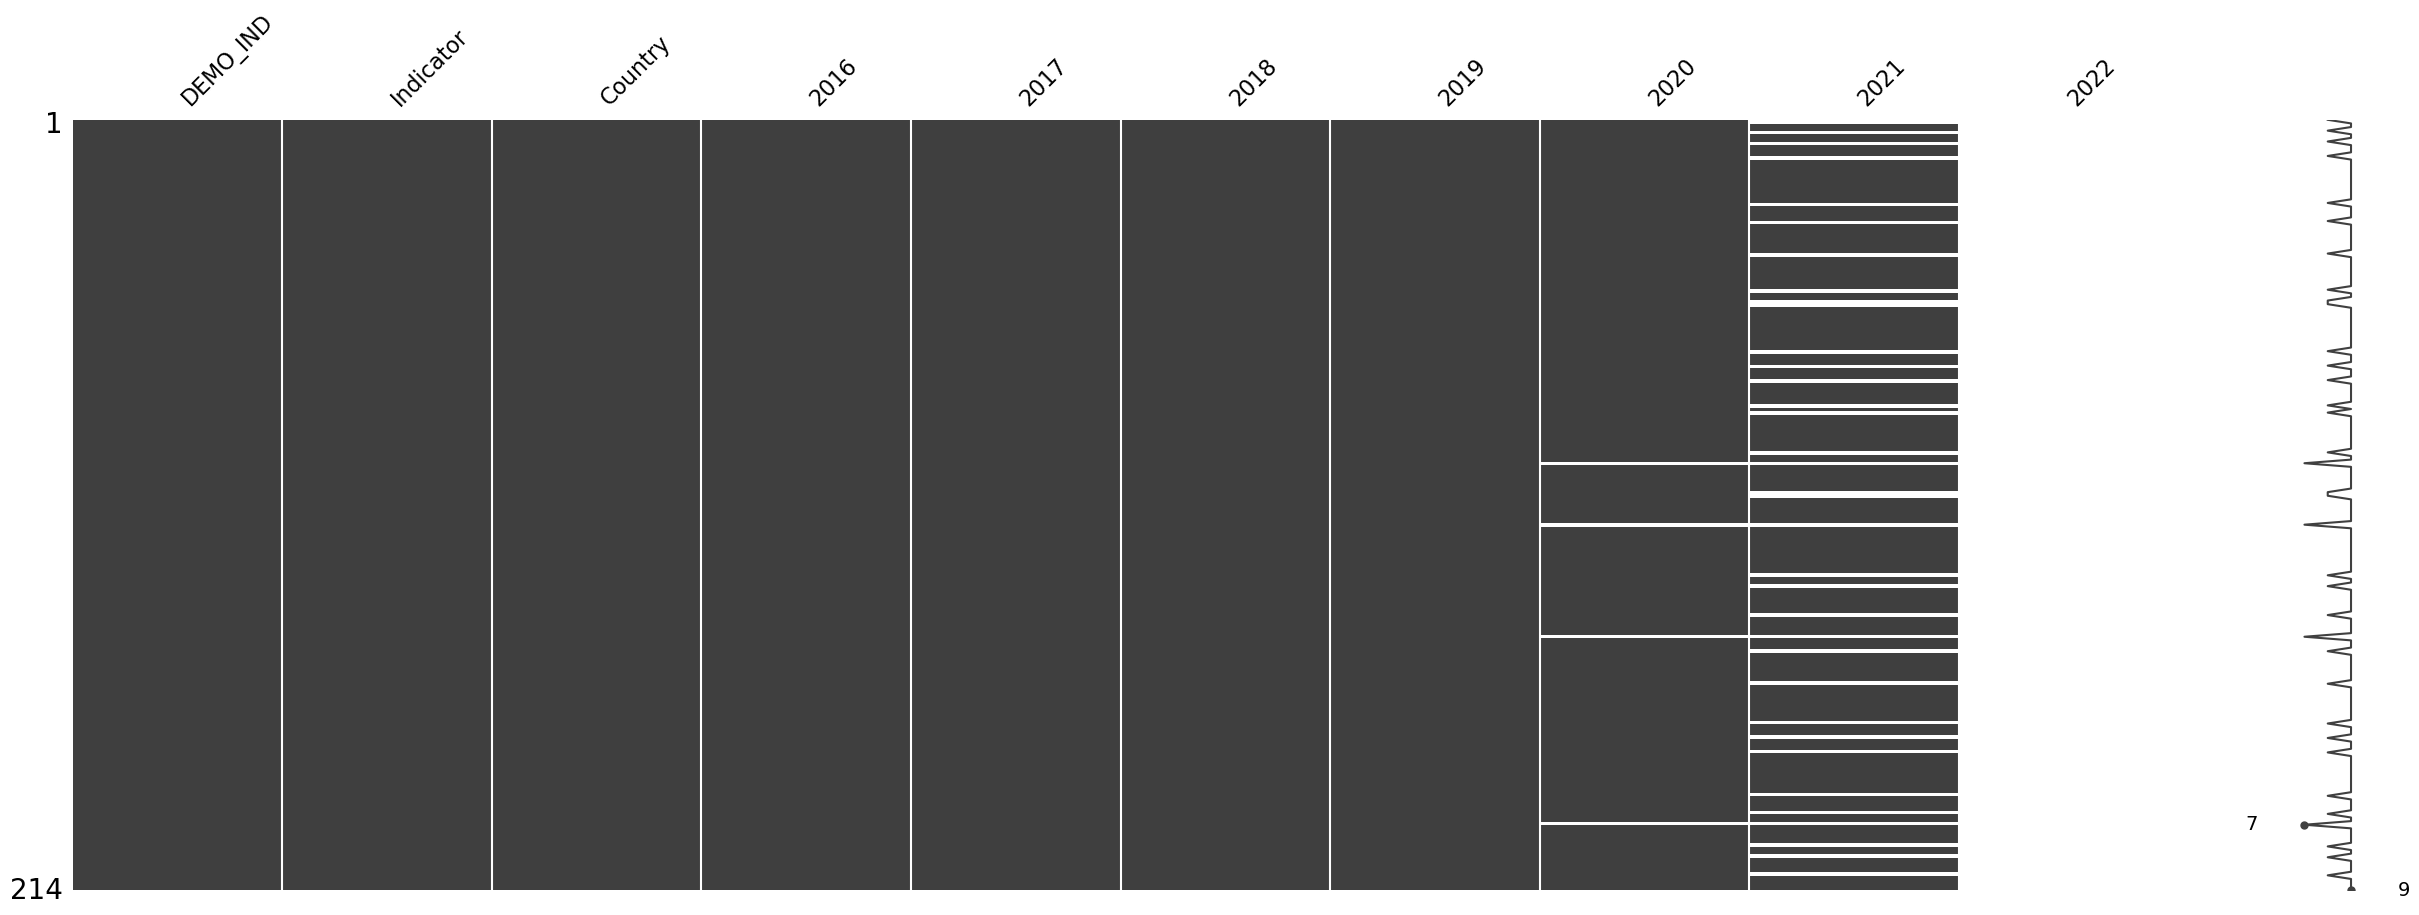

In [282]:
missingno.matrix(df_GDP_percapLCU, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

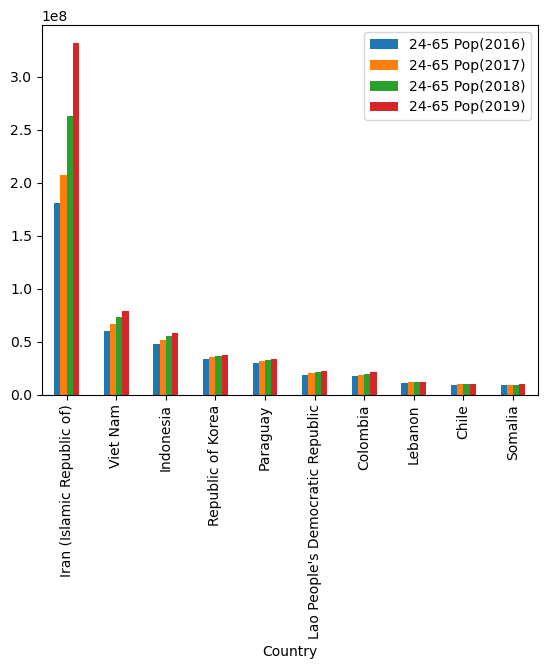

In [332]:
df_GDP_percapLCU = df_wide.iloc[3101:3315]
df_GDP_percapLCU = df_GDP_percapLCU.groupby(by=['Country'], sort = False)
df_GDP_percapLCU_avg = round(df_GDP_percapLCU.mean(),0)
df_GDP_percapLCU_data_series = df_GDP_percapLCU_avg.iloc[5:5,1]

df_GDP_percapLCU_avg = df_GDP_percapLCU_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'GDP per Cap LCU (2016)': df_GDP_percapLCU_avg[2016],
                                     'GDP per Cap LCU (2017)': df_GDP_percapLCU_avg[2017],
                                     'GDP per Cap LCU (2018)': df_GDP_percapLCU_avg[2018],
                                     'GDP per Cap LCU (2019)': df_GDP_percapLCU_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [257]:
df_GNI_LCU = df_wide.iloc[3701:3900]
df_GNI_LCU 

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
3701,NY_GNP_MKTP_CN,GNI (current LCU),Afghanistan,1.235103e+12,1.302376e+12,1.341488e+12,1.492958e+12,1.561802e+12,NaN,NaN
3702,NY_GNP_MKTP_CN,GNI (current LCU),Albania,1.496393e+12,1.554431e+12,1.634740e+12,1.669760e+12,1.616890e+12,1.864441e+12,NaN
3703,NY_GNP_MKTP_CN,GNI (current LCU),Algeria,1.734389e+13,1.859452e+13,1.988007e+13,1.999986e+13,1.801054e+13,2.214059e+13,NaN
3704,NY_GNP_MKTP_CN,GNI (current LCU),Andorra,NaN,NaN,NaN,3.092840e+09,NaN,NaN,NaN
3705,NY_GNP_MKTP_CN,GNI (current LCU),Angola,1.568649e+13,1.901693e+13,2.364800e+13,2.758829e+13,3.098460e+13,4.531622e+13,NaN
...,...,...,...,...,...,...,...,...,...,...
3895,NY_GNP_MKTP_CN,GNI (current LCU),Vanuatu,8.658340e+10,9.513850e+10,1.037595e+11,1.159651e+11,1.138232e+11,1.111830e+11,NaN
3896,NY_GNP_MKTP_CN,GNI (current LCU),Viet Nam,5.329200e+15,5.913700e+15,6.619700e+15,7.228400e+15,7.603700e+15,8.028930e+15,NaN
3897,NY_GNP_MKTP_CN,GNI (current LCU),Yemen,8.872796e+12,9.990940e+12,1.156983e+13,1.259597e+13,1.398420e+13,NaN,NaN
3898,NY_GNP_MKTP_CN,GNI (current LCU),Zambia,2.094258e+11,2.353372e+11,2.709200e+11,2.952336e+11,3.228865e+11,3.859837e+11,NaN


<AxesSubplot:>

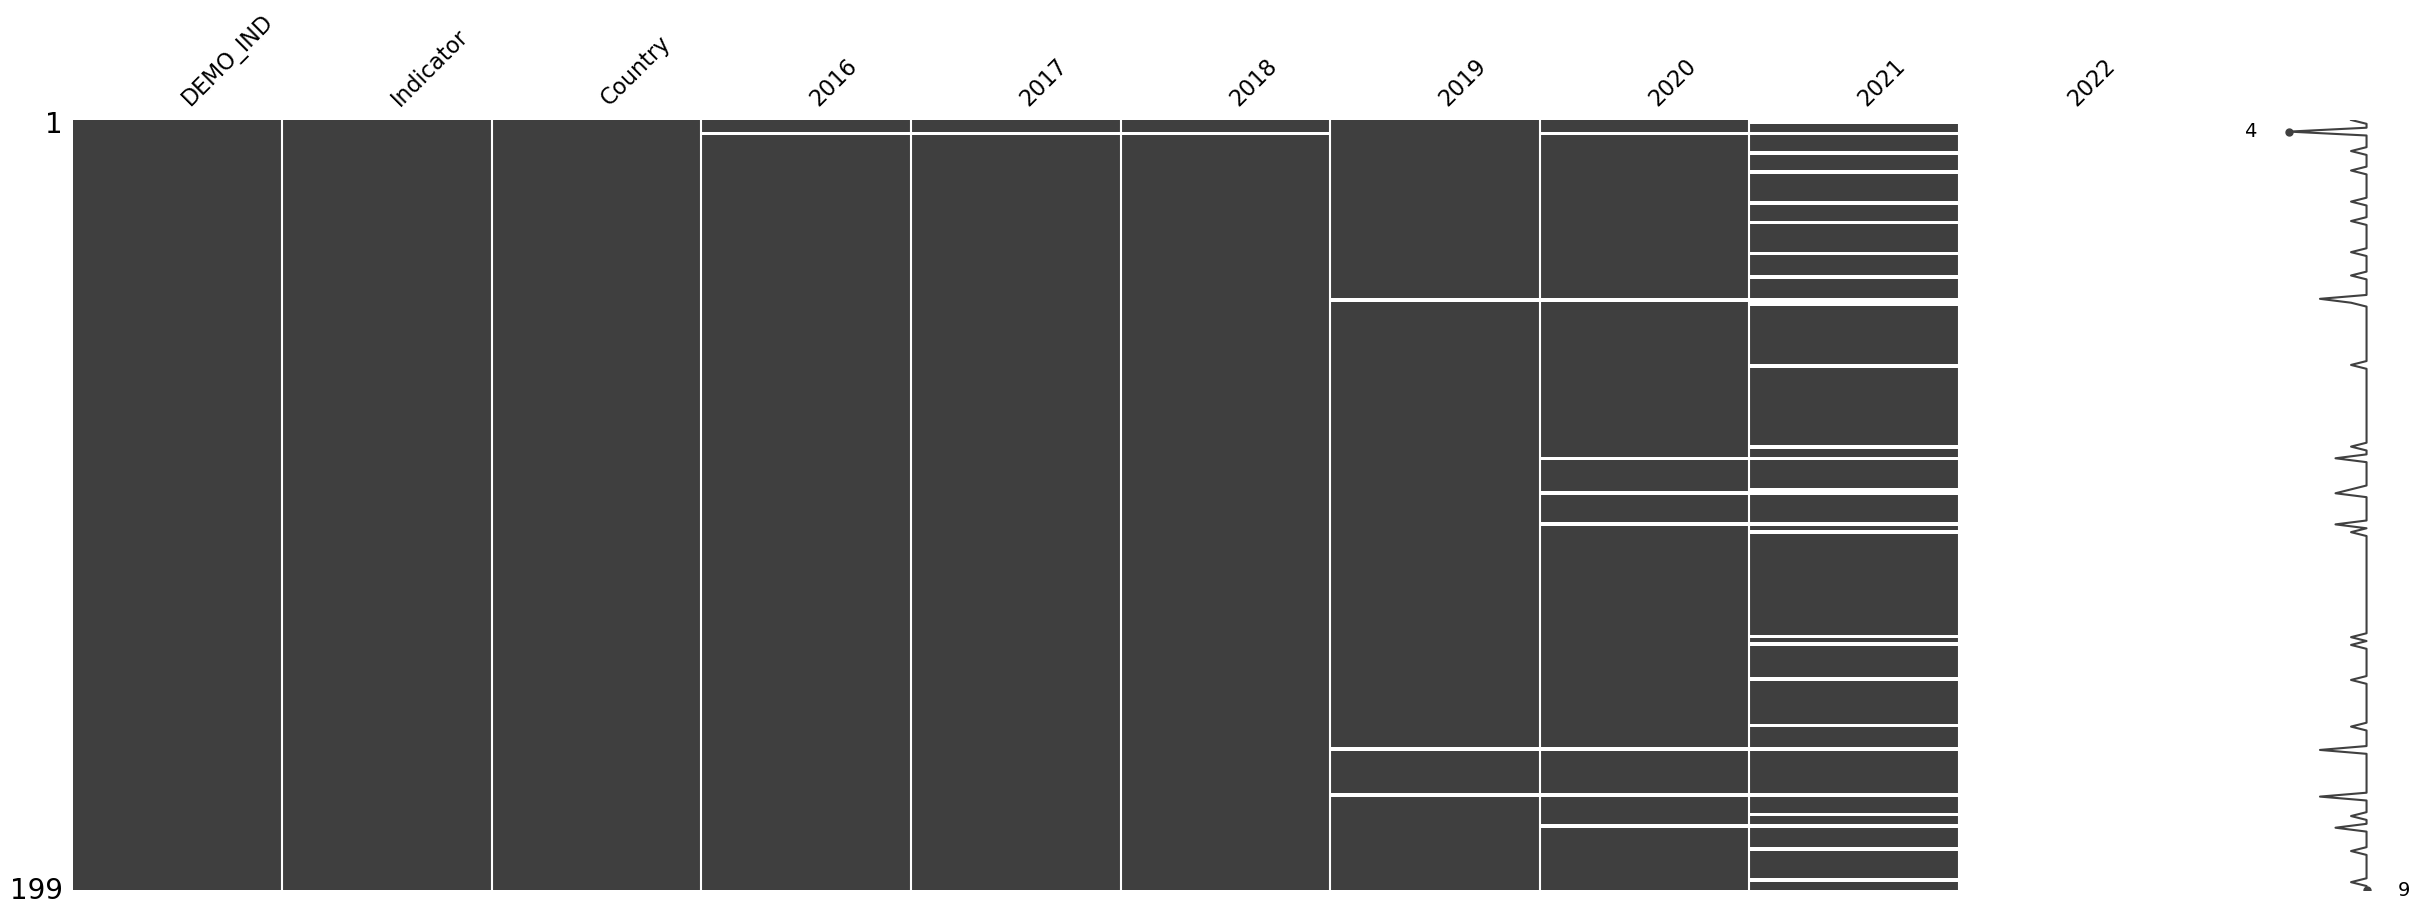

In [283]:
missingno.matrix(df_GNI_LCU, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

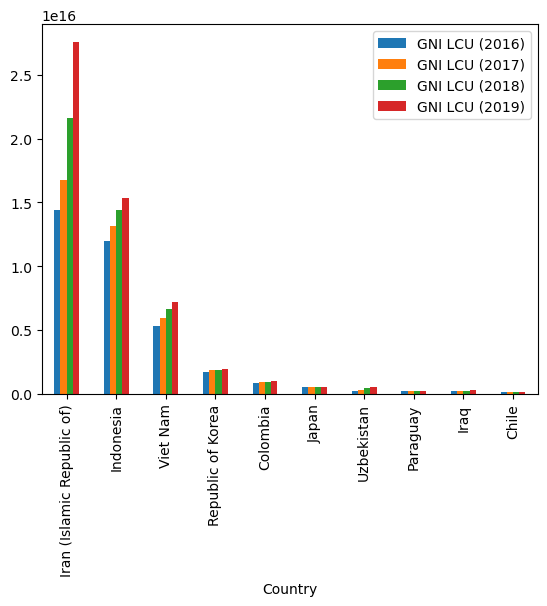

In [331]:
df_GNI_LCU = df_wide.iloc[3701:3900]
df_GNI_LCU = df_GNI_LCU.groupby(by=['Country'], sort = False)
df_GNI_LCU_avg = round(df_GNI_LCU.mean(),0)
df_GNI_LCU_data_series = df_GNI_LCU_avg.iloc[5:5,1]

df_GNI_LCU_avg = df_GNI_LCU_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'GNI LCU (2016)': df_GNI_LCU_avg[2016],
                                     'GNI LCU (2017)': df_GNI_LCU_avg[2017],
                                     'GNI LCU (2018)': df_GNI_LCU_avg[2018],
                                     'GNI LCU (2019)': df_GNI_LCU_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [258]:
df_exrate_LCU = df_wide.iloc[4700:4912]
df_exrate_LCU

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
4700,PA_NUS_FCRF,"Official exchange rate (LCU per US$, period av...",Afghanistan,67.9,68.0,72.1,77.7,76.8,NaN,NaN
4701,PA_NUS_FCRF,"Official exchange rate (LCU per US$, period av...",Albania,124.1,119.1,108.0,109.9,108.7,103.5,NaN
4702,PA_NUS_FCRF,"Official exchange rate (LCU per US$, period av...",Algeria,109.4,111.0,116.6,119.4,126.8,135.1,NaN
4703,PA_NUS_FCRF,"Official exchange rate (LCU per US$, period av...",American Samoa,1.0,1.0,1.0,1.0,1.0,1.0,NaN
4704,PA_NUS_FCRF,"Official exchange rate (LCU per US$, period av...",Andorra,0.9,0.9,0.8,0.9,0.9,0.8,NaN
...,...,...,...,...,...,...,...,...,...,...
4907,PA_NUS_FCRF,"Official exchange rate (LCU per US$, period av...",Venezuela (Bolivarian Republic of),9.3,10.0,13.4,2787.5,67622.8,NaN,NaN
4908,PA_NUS_FCRF,"Official exchange rate (LCU per US$, period av...",Viet Nam,21935.0,22370.1,22602.0,23050.2,23208.4,23159.8,NaN
4909,PA_NUS_FCRF,"Official exchange rate (LCU per US$, period av...",Yemen,283.9,282.2,214.9,486.7,743.0,1035.5,NaN
4910,PA_NUS_FCRF,"Official exchange rate (LCU per US$, period av...",Zambia,10.3,9.5,10.5,12.9,18.3,20.0,NaN


<AxesSubplot:>

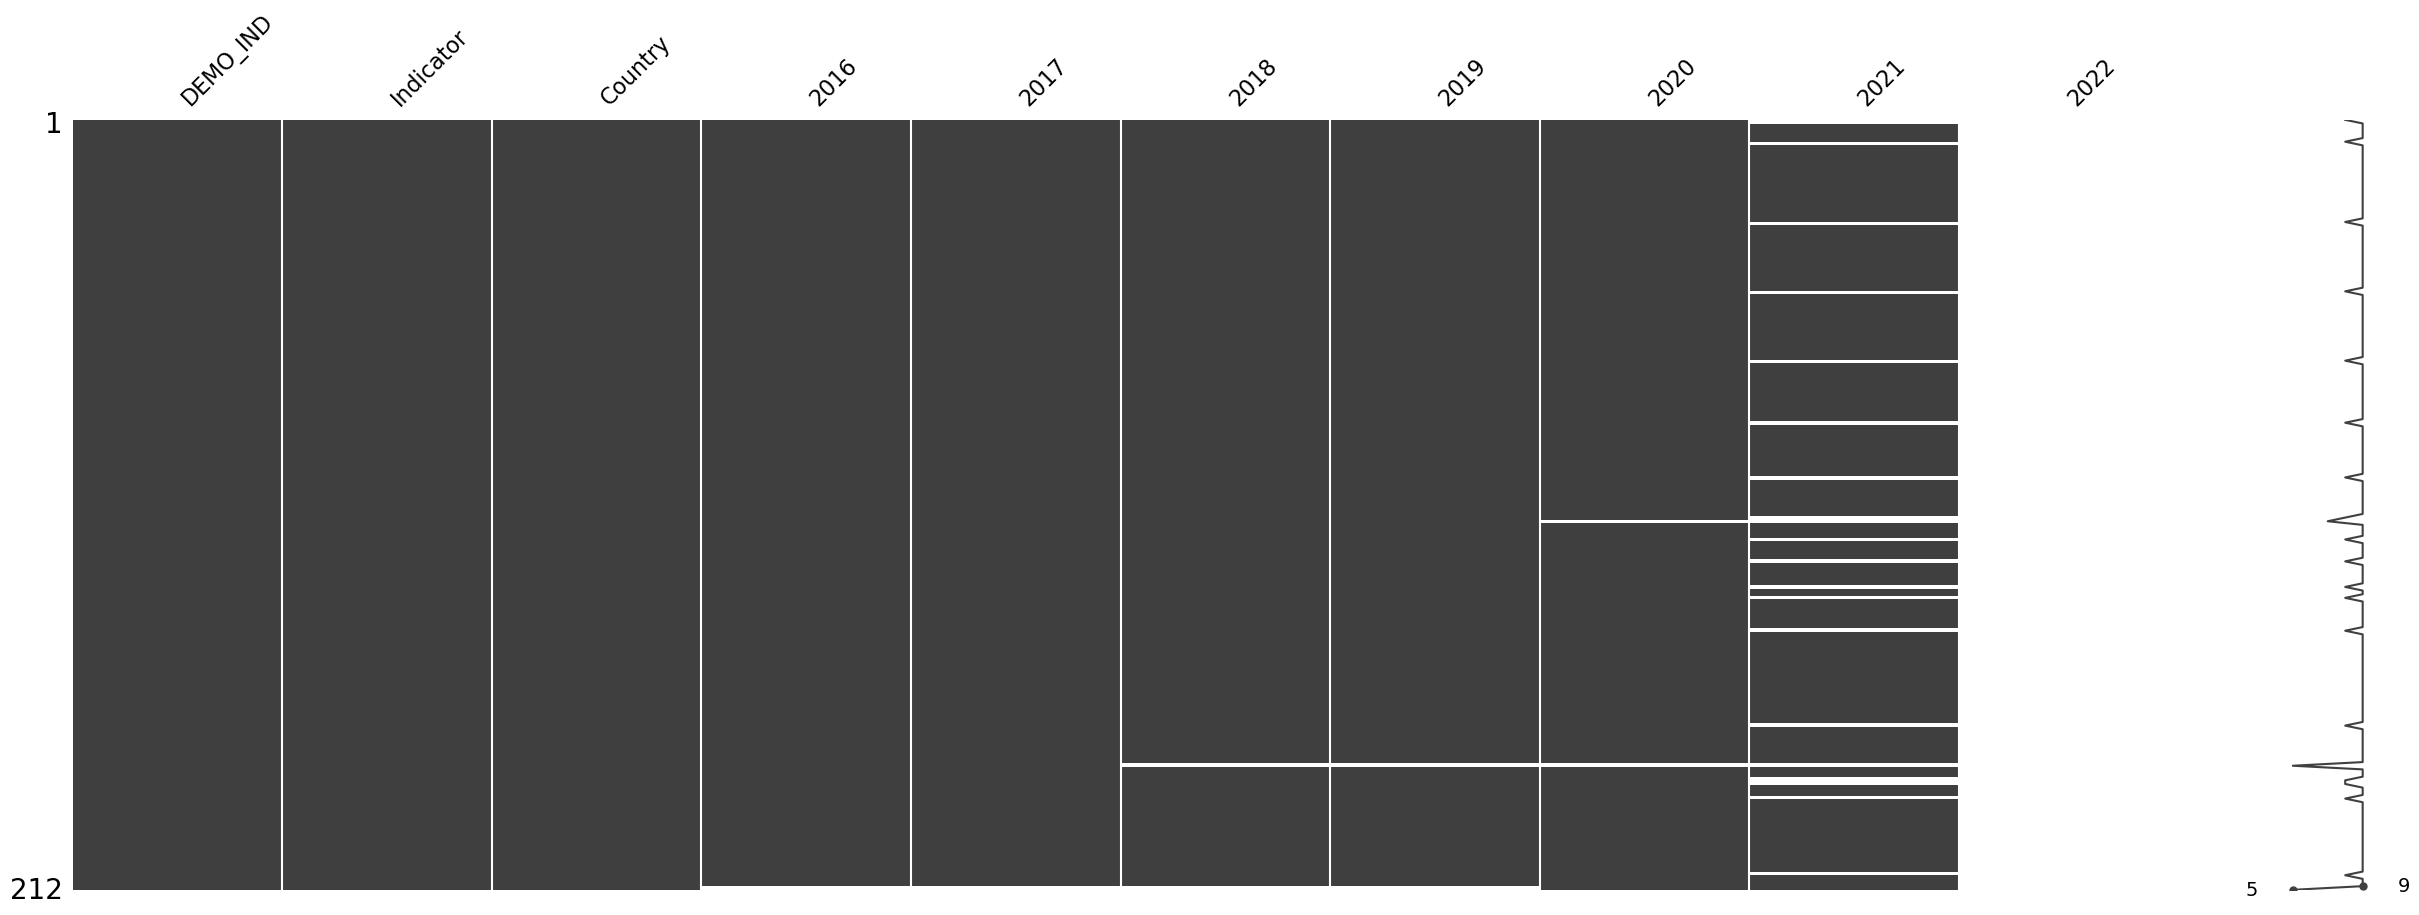

In [284]:
missingno.matrix(df_exrate_LCU, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

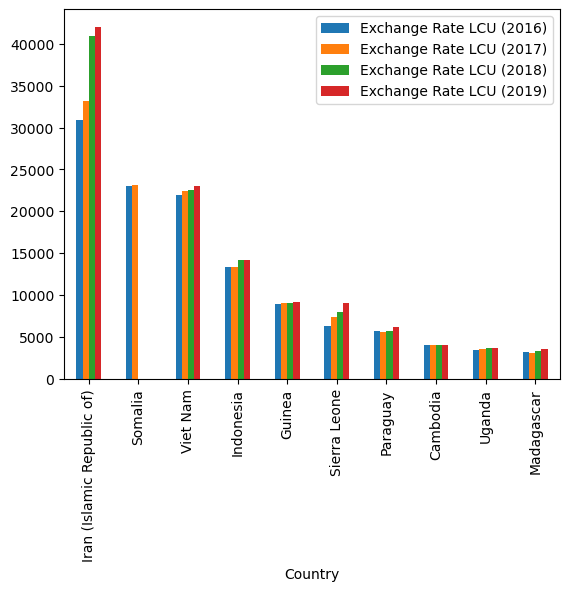

In [330]:
df_exrate_LCU = df_wide.iloc[4700:4912]
df_exrate_LCU = df_exrate_LCU.groupby(by=['Country'], sort = False)
df_exrate_LCU_avg = round(df_exrate_LCU.mean(),0)
df_exrate_LCU_data_series = df_exrate_LCU_avg.iloc[5:5,1]

df_exrate_LCU_avg = df_exrate_LCU_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'Exchange Rate LCU (2016)': df_exrate_LCU_avg[2016],
                                     'Exchange Rate LCU (2017)': df_exrate_LCU_avg[2017],
                                     'Exchange Rate LCU (2018)': df_exrate_LCU_avg[2018],
                                     'Exchange Rate LCU (2019)': df_exrate_LCU_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [259]:
df_HIV = df_wide.iloc[5492:5627]
df_HIV

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
5492,SH_DYN_AIDS_ZS,"Prevalence of HIV, total (% of population ages...",Afghanistan,0.1,0.1,0.1,0.1,0.1,NaN,NaN
5493,SH_DYN_AIDS_ZS,"Prevalence of HIV, total (% of population ages...",Albania,0.1,0.1,0.1,0.1,0.1,NaN,NaN
5494,SH_DYN_AIDS_ZS,"Prevalence of HIV, total (% of population ages...",Algeria,0.1,0.1,0.1,0.1,0.1,NaN,NaN
5495,SH_DYN_AIDS_ZS,"Prevalence of HIV, total (% of population ages...",Angola,1.9,1.9,1.9,1.8,1.8,NaN,NaN
5496,SH_DYN_AIDS_ZS,"Prevalence of HIV, total (% of population ages...",Argentina,0.4,0.4,0.4,0.4,0.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5622,SH_DYN_AIDS_ZS,"Prevalence of HIV, total (% of population ages...",Venezuela (Bolivarian Republic of),0.6,0.6,0.6,0.5,0.5,NaN,NaN
5623,SH_DYN_AIDS_ZS,"Prevalence of HIV, total (% of population ages...",Viet Nam,0.4,0.4,0.4,0.3,0.3,NaN,NaN
5624,SH_DYN_AIDS_ZS,"Prevalence of HIV, total (% of population ages...",Yemen,0.1,0.1,0.1,0.1,0.1,NaN,NaN
5625,SH_DYN_AIDS_ZS,"Prevalence of HIV, total (% of population ages...",Zambia,11.6,11.5,11.4,11.3,11.1,NaN,NaN


<AxesSubplot:>

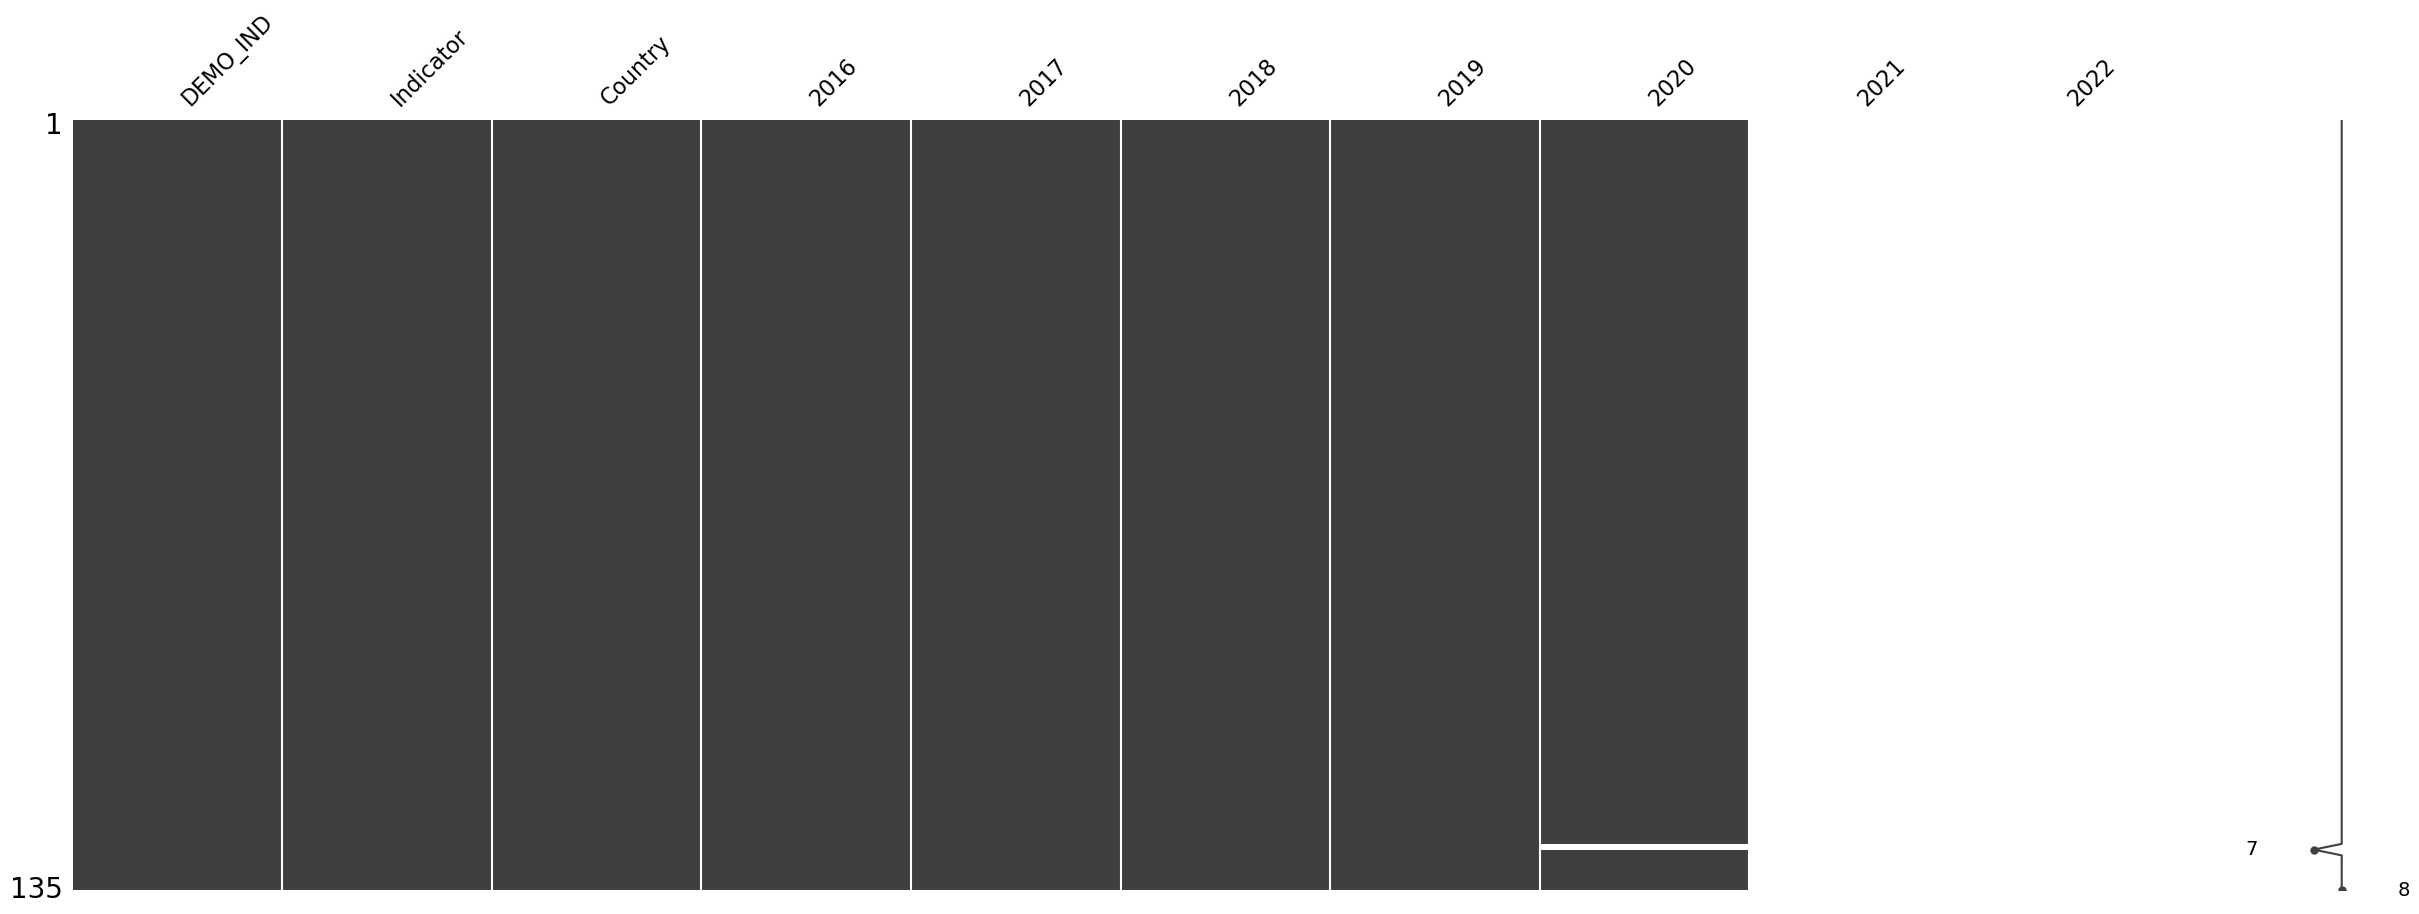

In [285]:
missingno.matrix(df_HIV, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

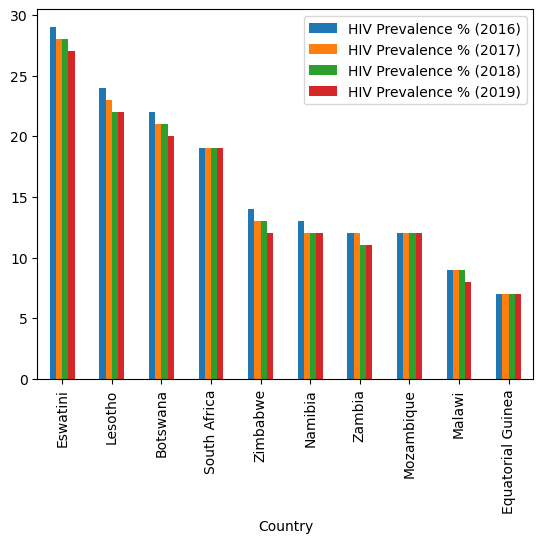

In [329]:
df_HIV = df_wide.iloc[5492:5627]
df_HIV = df_HIV.groupby(by=['Country'], sort = False)
df_HIV_avg = round(df_HIV.mean(),0)
df_HIV_data_series = df_HIV_avg.iloc[5:5,1]

df_HIV_avg = df_HIV_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'HIV Prevalence % (2016)': df_HIV_avg[2016],
                                     'HIV Prevalence % (2017)': df_HIV_avg[2017],
                                     'HIV Prevalence % (2018)': df_HIV_avg[2018],
                                     'HIV Prevalence % (2019)': df_HIV_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [261]:
df_inf_mort = df_wide.iloc[5742:5935]
df_inf_mort

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
5742,SP_DYN_IMRT_IN,"Mortality rate, infant (per 1,000 live births)",Afghanistan,51.0,49.0,48.0,46.0,45.0,NaN,NaN
5743,SP_DYN_IMRT_IN,"Mortality rate, infant (per 1,000 live births)",Albania,8.0,8.0,9.0,9.0,9.0,NaN,NaN
5744,SP_DYN_IMRT_IN,"Mortality rate, infant (per 1,000 live births)",Algeria,21.0,21.0,20.0,20.0,20.0,NaN,NaN
5745,SP_DYN_IMRT_IN,"Mortality rate, infant (per 1,000 live births)",Andorra,3.0,3.0,3.0,3.0,2.0,NaN,NaN
5746,SP_DYN_IMRT_IN,"Mortality rate, infant (per 1,000 live births)",Angola,56.0,54.0,52.0,50.0,48.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5930,SP_DYN_IMRT_IN,"Mortality rate, infant (per 1,000 live births)",Venezuela (Bolivarian Republic of),21.0,21.0,21.0,21.0,21.0,NaN,NaN
5931,SP_DYN_IMRT_IN,"Mortality rate, infant (per 1,000 live births)",Viet Nam,17.0,17.0,17.0,17.0,17.0,NaN,NaN
5932,SP_DYN_IMRT_IN,"Mortality rate, infant (per 1,000 live births)",Yemen,46.0,46.0,46.0,46.0,46.0,NaN,NaN
5933,SP_DYN_IMRT_IN,"Mortality rate, infant (per 1,000 live births)",Zambia,46.0,44.0,44.0,43.0,42.0,NaN,NaN


<AxesSubplot:>

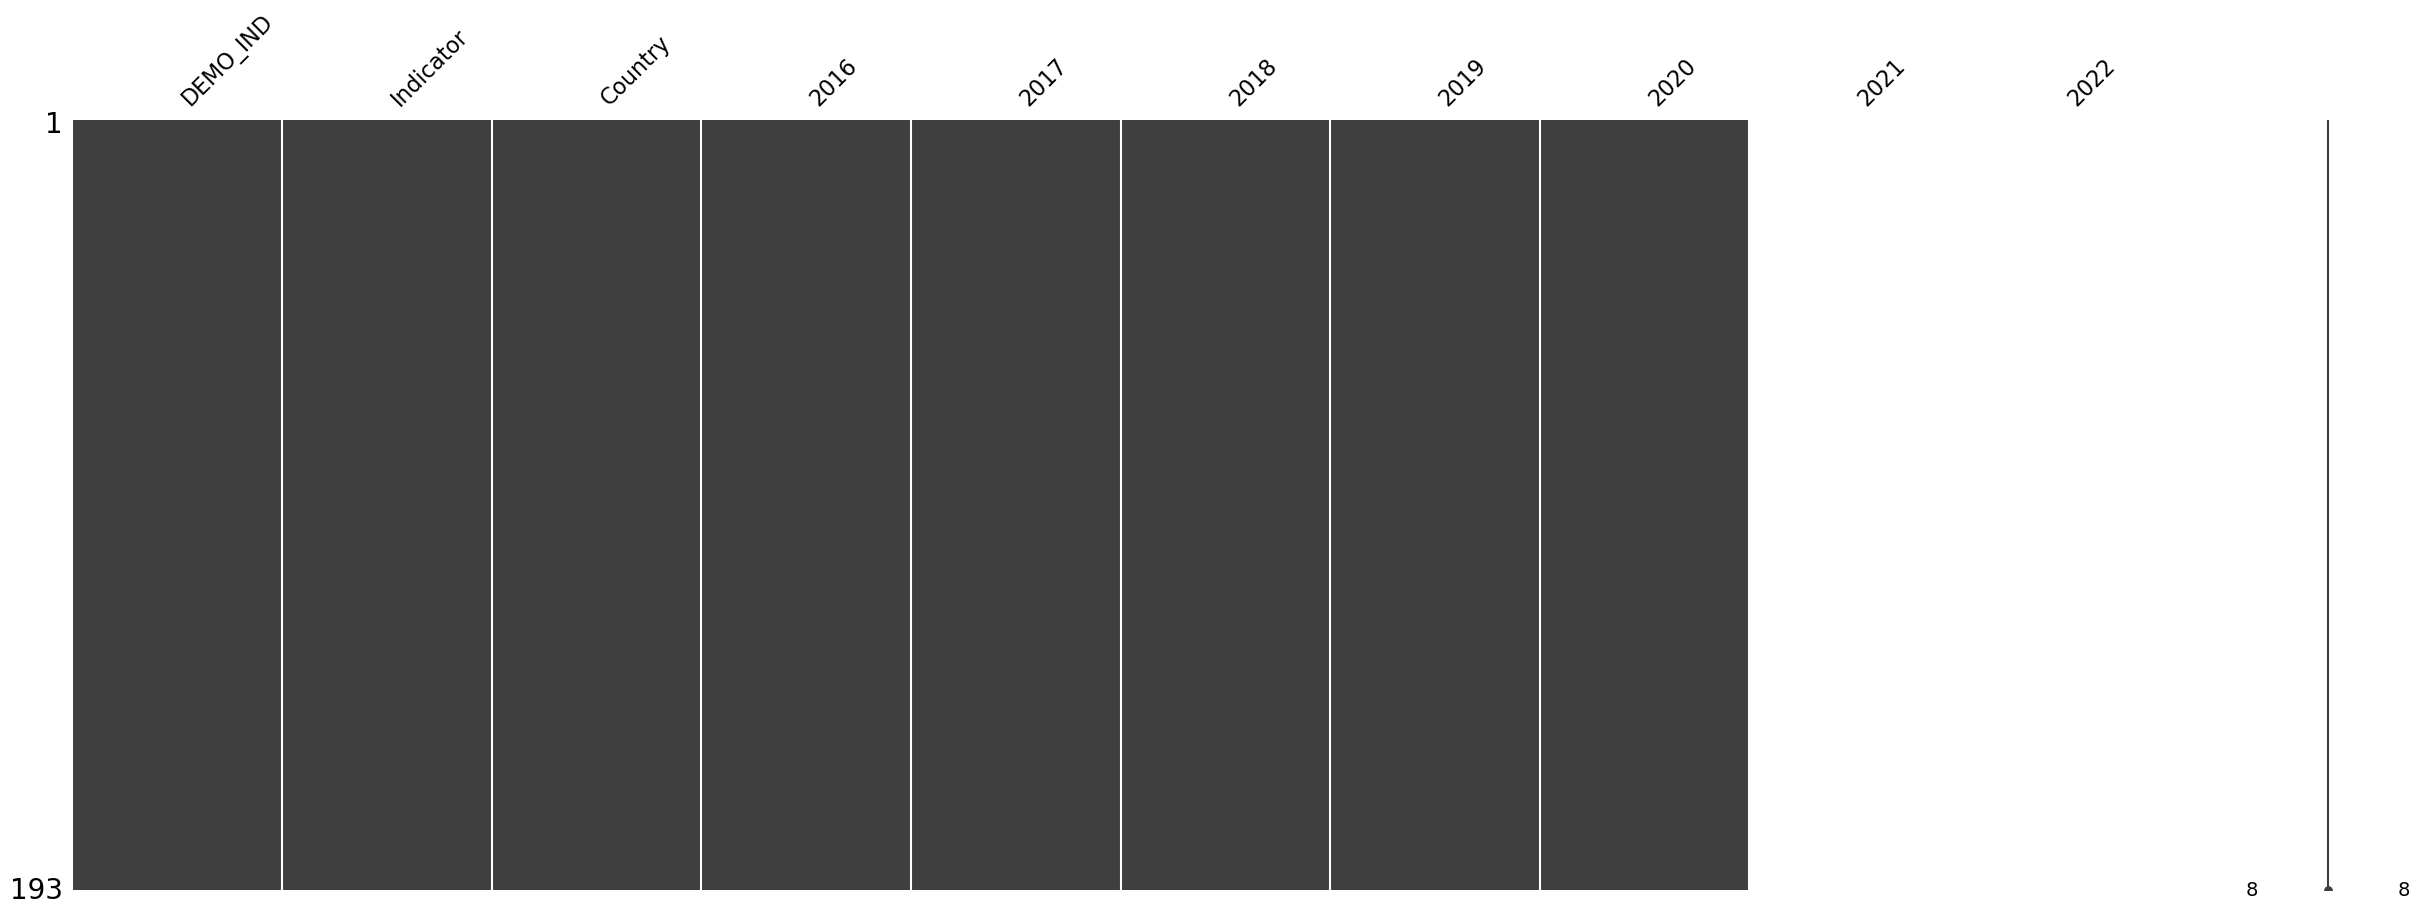

In [287]:
missingno.matrix(df_inf_mort, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

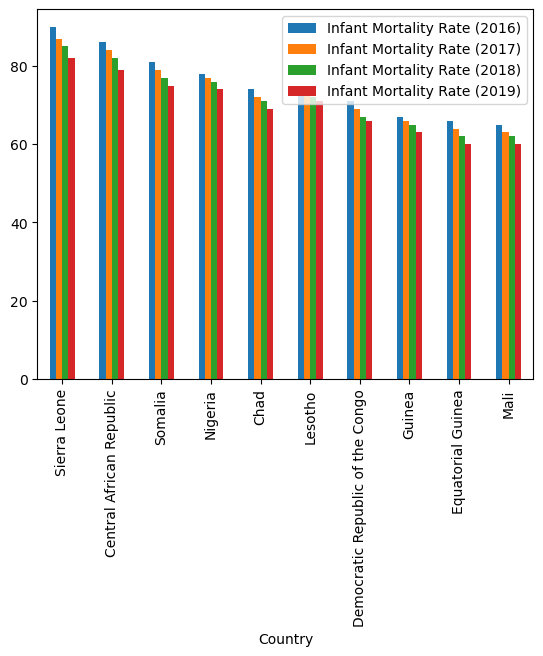

In [328]:
df_inf_mort = df_wide.iloc[5742:5935]
df_inf_mort = df_inf_mort.groupby(by=['Country'], sort = False)
df_inf_mort_avg = round(df_inf_mort.mean(),0)
df_inf_mort_data_series = df_inf_mort_avg.iloc[5:5,1]

df_inf_mort_avg = df_inf_mort_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'Infant Mortality Rate (2016)': df_inf_mort_avg[2016],
                                     'Infant Mortality Rate (2017)': df_inf_mort_avg[2017],
                                     'Infant Mortality Rate (2018)': df_inf_mort_avg[2018],
                                     'Infant Mortality Rate (2019)': df_inf_mort_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [262]:
df_life_exp = df_wide.iloc[5935:6135]
df_life_exp

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
5935,SP_DYN_LE00_IN,"Life expectancy at birth, total (years)",Afghanistan,64.0,64.0,64.0,65.0,65.0,NaN,NaN
5936,SP_DYN_LE00_IN,"Life expectancy at birth, total (years)",Albania,78.0,78.0,78.0,79.0,79.0,NaN,NaN
5937,SP_DYN_LE00_IN,"Life expectancy at birth, total (years)",Algeria,76.0,76.0,77.0,77.0,77.0,NaN,NaN
5938,SP_DYN_LE00_IN,"Life expectancy at birth, total (years)",Angola,60.0,60.0,61.0,61.0,61.0,NaN,NaN
5939,SP_DYN_LE00_IN,"Life expectancy at birth, total (years)",Antigua and Barbuda,77.0,77.0,77.0,77.0,77.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6130,SP_DYN_LE00_IN,"Life expectancy at birth, total (years)",Venezuela (Bolivarian Republic of),72.0,72.0,72.0,72.0,72.0,NaN,NaN
6131,SP_DYN_LE00_IN,"Life expectancy at birth, total (years)",Viet Nam,75.0,75.0,75.0,75.0,75.0,NaN,NaN
6132,SP_DYN_LE00_IN,"Life expectancy at birth, total (years)",Yemen,66.0,66.0,66.0,66.0,66.0,NaN,NaN
6133,SP_DYN_LE00_IN,"Life expectancy at birth, total (years)",Zambia,62.0,63.0,64.0,64.0,64.0,NaN,NaN


<AxesSubplot:>

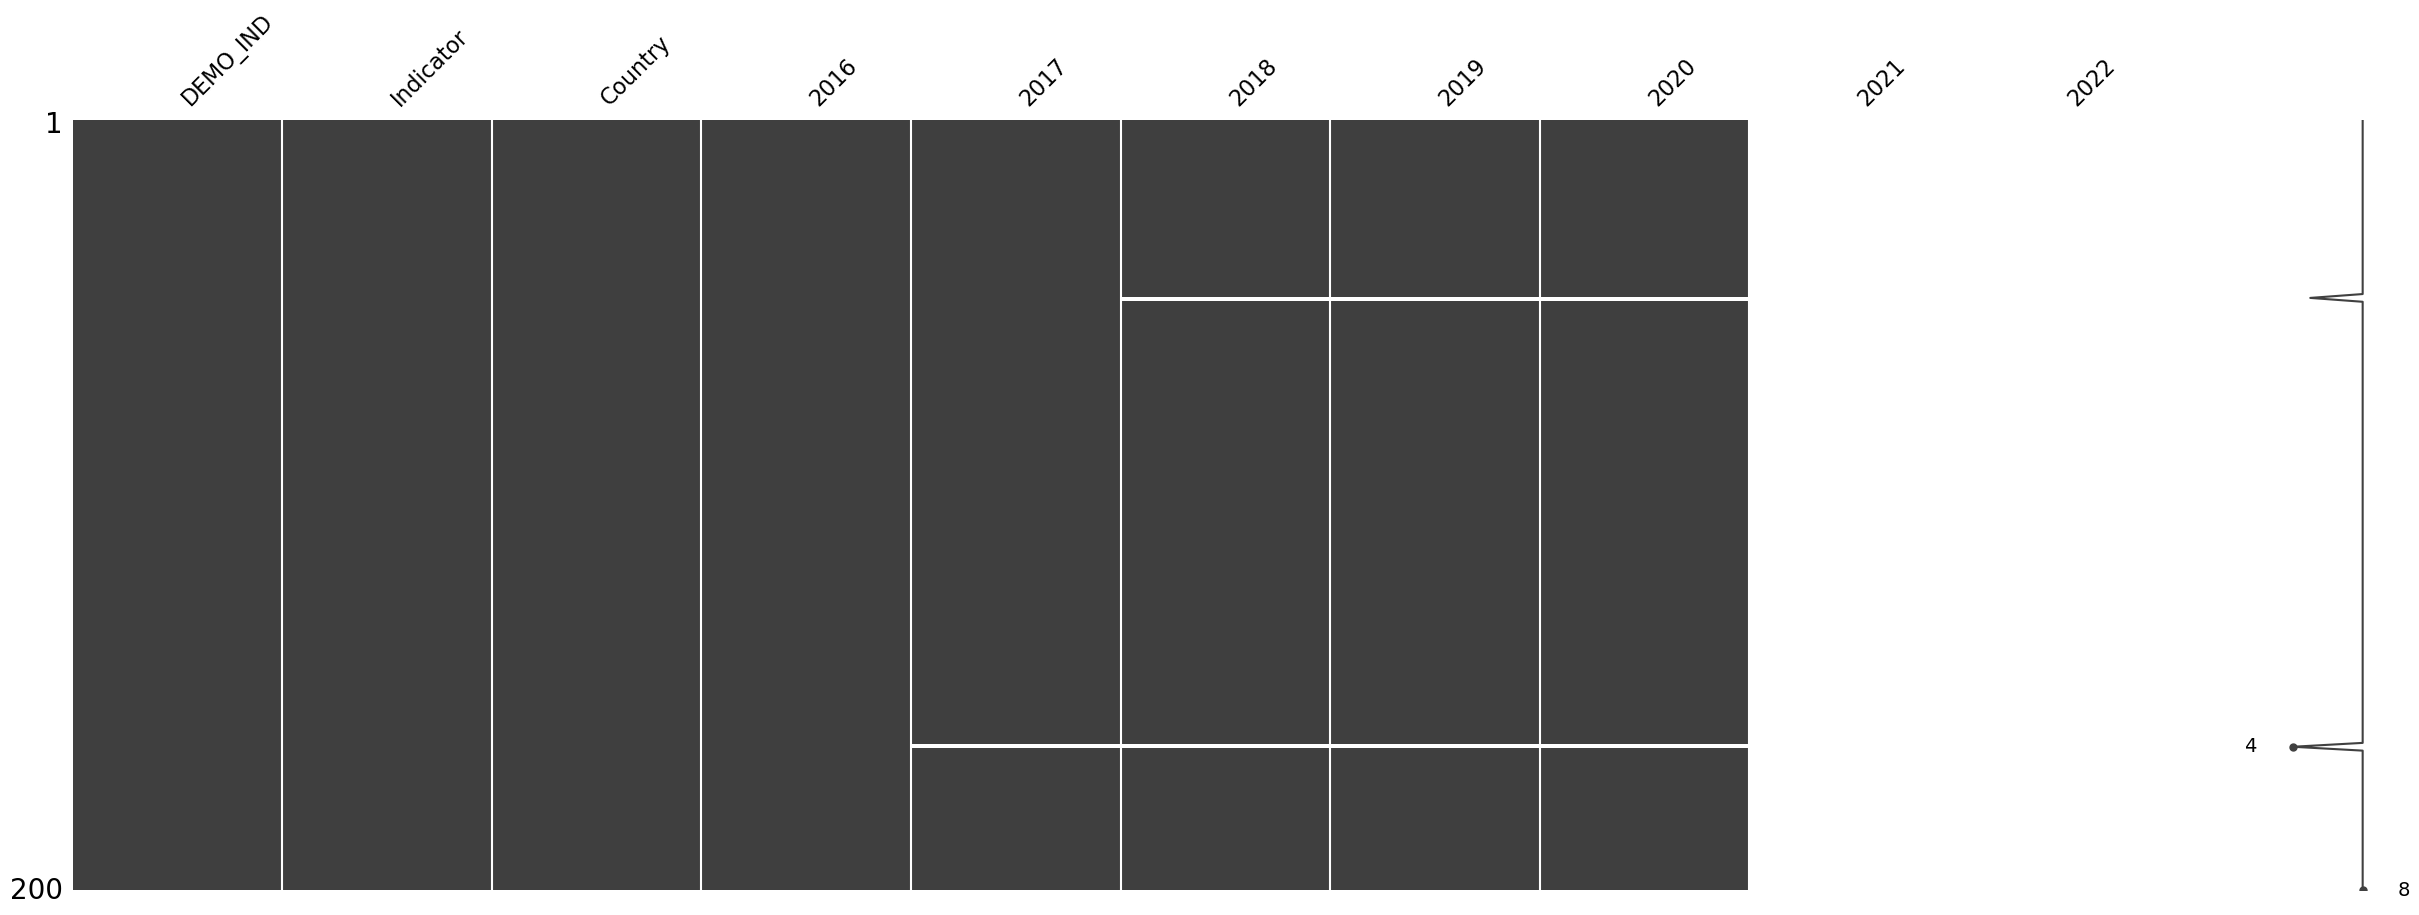

In [288]:
missingno.matrix(df_life_exp, figsize = (30,10))

In [ ]:
df_avg_pop = df_wide.iloc[916:1145]
df_avg_pop = df_avg_pop.groupby(by=['Country'], sort = False)
df_avg_pop_avg = round(df_avg_pop.mean(),0)
df_avg_pop_data_series = df_avg_pop_avg.iloc[5:5,1]

df_avg_pop_avg = df_avg_pop_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'24-65 Pop(2016)': df_avg_pop_avg[2016],
                                     '24-65 Pop(2017)': df_avg_pop_avg[2017],
                                     '24-65 Pop(2018)': df_avg_pop_avg[2018],
                                     '24-65 Pop(2019)': df_avg_pop_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [263]:
df_fert_rate = df_wide.iloc[6135:6334]
df_fert_rate

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
6135,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",Afghanistan,4.8,4.6,4.5,4.3,4.2,NaN,NaN
6136,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",Albania,1.7,1.6,1.6,1.6,1.6,NaN,NaN
6137,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",Algeria,3.1,3.0,3.0,3.0,2.9,NaN,NaN
6138,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",Angola,5.7,5.6,5.5,5.4,5.4,NaN,NaN
6139,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",Antigua and Barbuda,2.0,2.0,2.0,2.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6329,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",Venezuela (Bolivarian Republic of),2.3,2.3,2.3,2.3,2.2,NaN,NaN
6330,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",Viet Nam,2.0,2.0,2.0,2.0,2.0,NaN,NaN
6331,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",Yemen,4.0,3.9,3.8,3.7,3.6,NaN,NaN
6332,SP_DYN_TFRT_IN,"Fertility rate, total (births per woman)",Zambia,4.8,4.7,4.6,4.6,4.5,NaN,NaN


<AxesSubplot:>

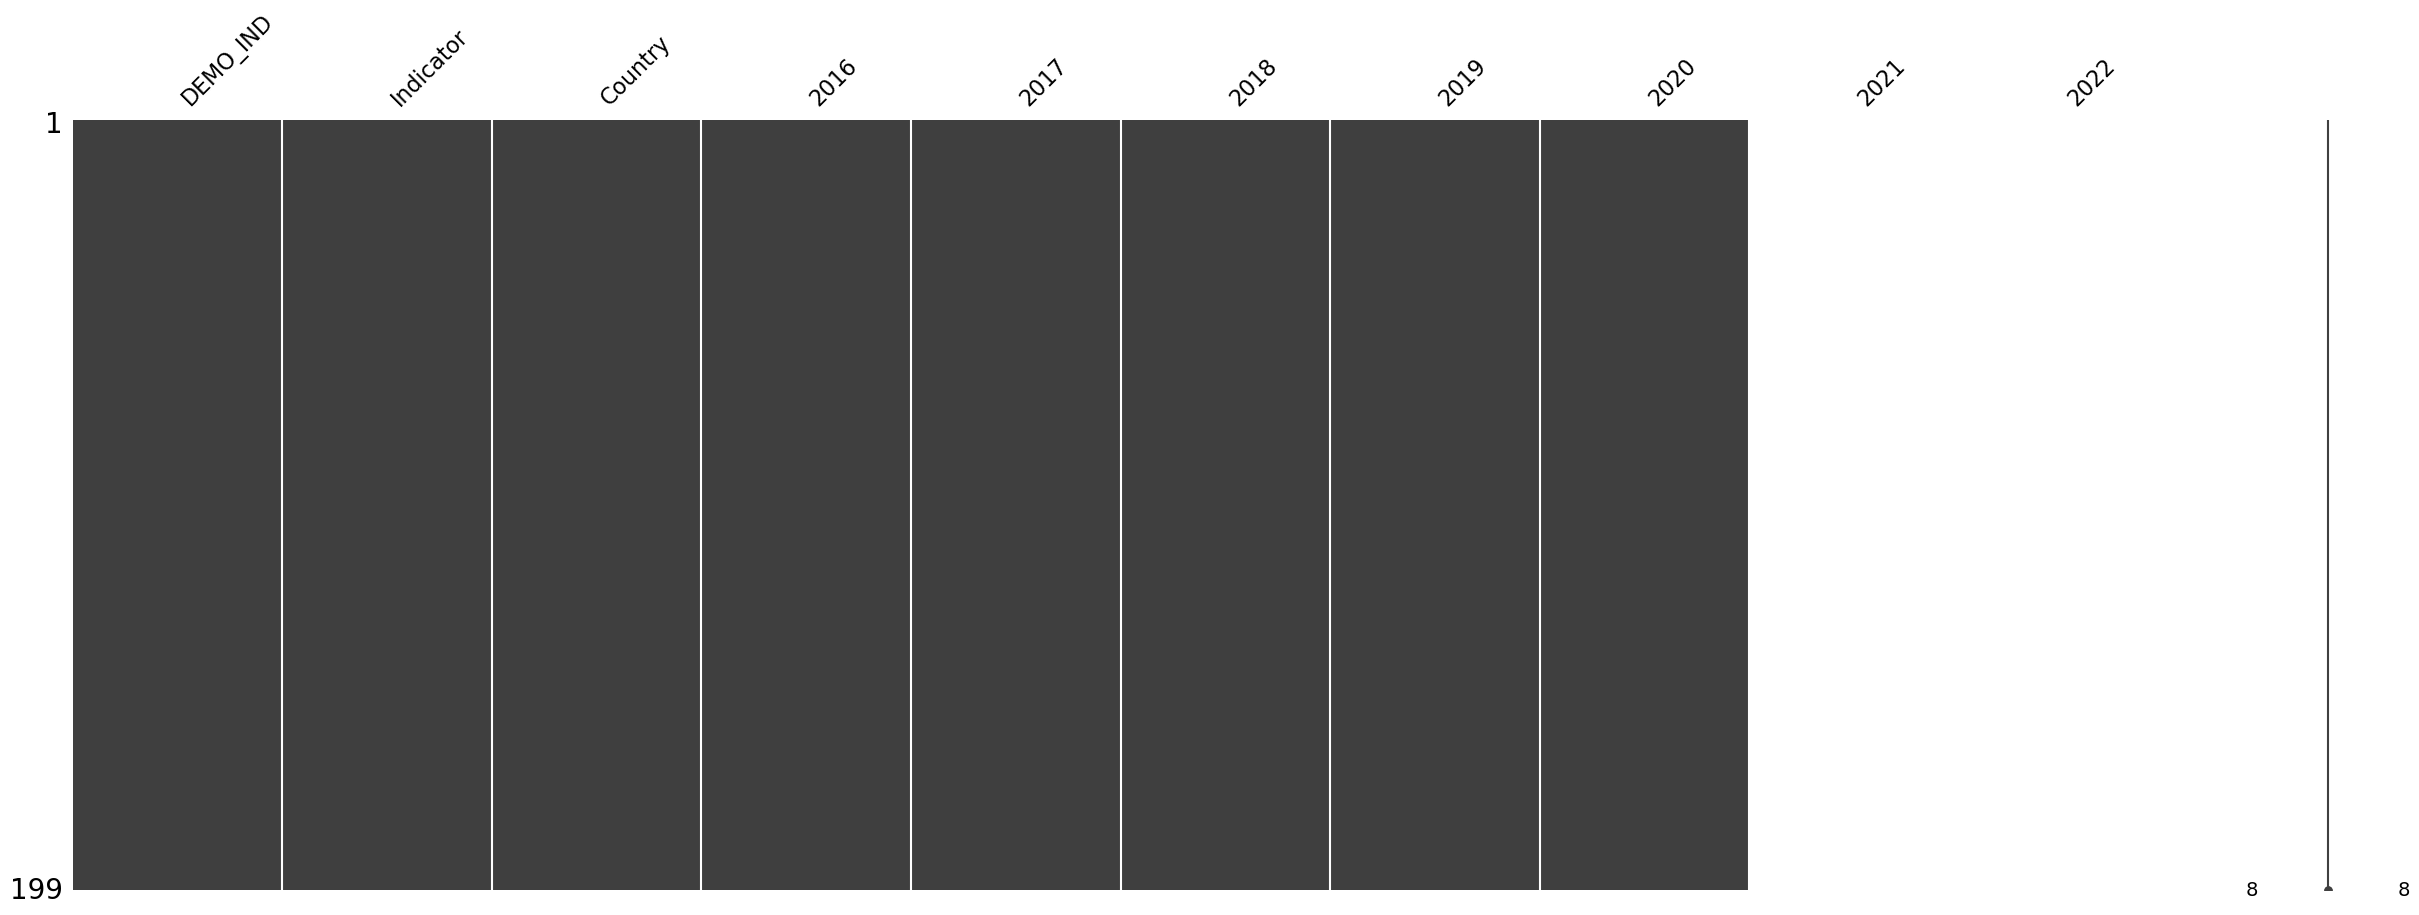

In [289]:
missingno.matrix(df_fert_rate, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

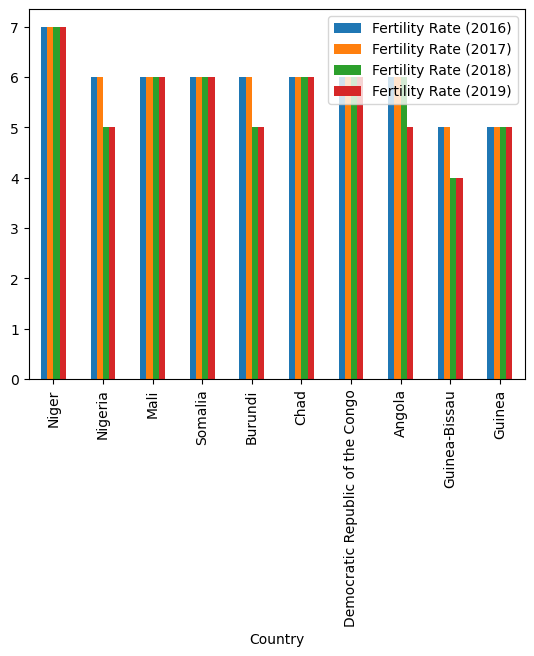

In [327]:
df_fert_rate = df_wide.iloc[6135:6334]
df_fert_rate = df_fert_rate.groupby(by=['Country'], sort = False)
df_fert_rate_avg = round(df_fert_rate.mean(),0)
df_fert_rate_data_series = df_fert_rate_avg.iloc[5:5,1]

df_fert_rate_avg = df_fert_rate_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'Fertility Rate (2016)': df_fert_rate_avg[2016],
                                     'Fertility Rate (2017)': df_fert_rate_avg[2017],
                                     'Fertility Rate (2018)': df_fert_rate_avg[2018],
                                     'Fertility Rate (2019)': df_fert_rate_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [264]:
df_pop_grow = df_wide.iloc[6334:6549]
df_pop_grow

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
6334,SP_POP_GROW,Population growth (annual %),Afghanistan,2.8,2.5,2.4,2.3,2.3,2.3,NaN
6335,SP_POP_GROW,Population growth (annual %),Albania,-0.2,-0.1,-0.2,-0.4,-0.6,-0.9,NaN
6336,SP_POP_GROW,Population growth (annual %),Algeria,2.1,2.0,2.0,1.9,1.8,1.7,NaN
6337,SP_POP_GROW,Population growth (annual %),American Samoa,-0.1,-0.2,-0.3,-0.3,-0.2,-0.2,NaN
6338,SP_POP_GROW,Population growth (annual %),Andorra,-0.9,-0.4,NaN,0.2,0.2,0.1,NaN
...,...,...,...,...,...,...,...,...,...,...
6544,SP_POP_GROW,Population growth (annual %),Venezuela (Bolivarian Republic of),-0.8,-1.5,-1.8,-1.3,-0.3,0.9,NaN
6545,SP_POP_GROW,Population growth (annual %),Viet Nam,1.0,1.0,1.0,1.0,0.9,0.8,NaN
6546,SP_POP_GROW,Population growth (annual %),Yemen,2.5,2.4,2.4,2.3,2.3,2.2,NaN
6547,SP_POP_GROW,Population growth (annual %),Zambia,3.0,3.0,2.9,2.9,2.9,2.9,NaN


<AxesSubplot:>

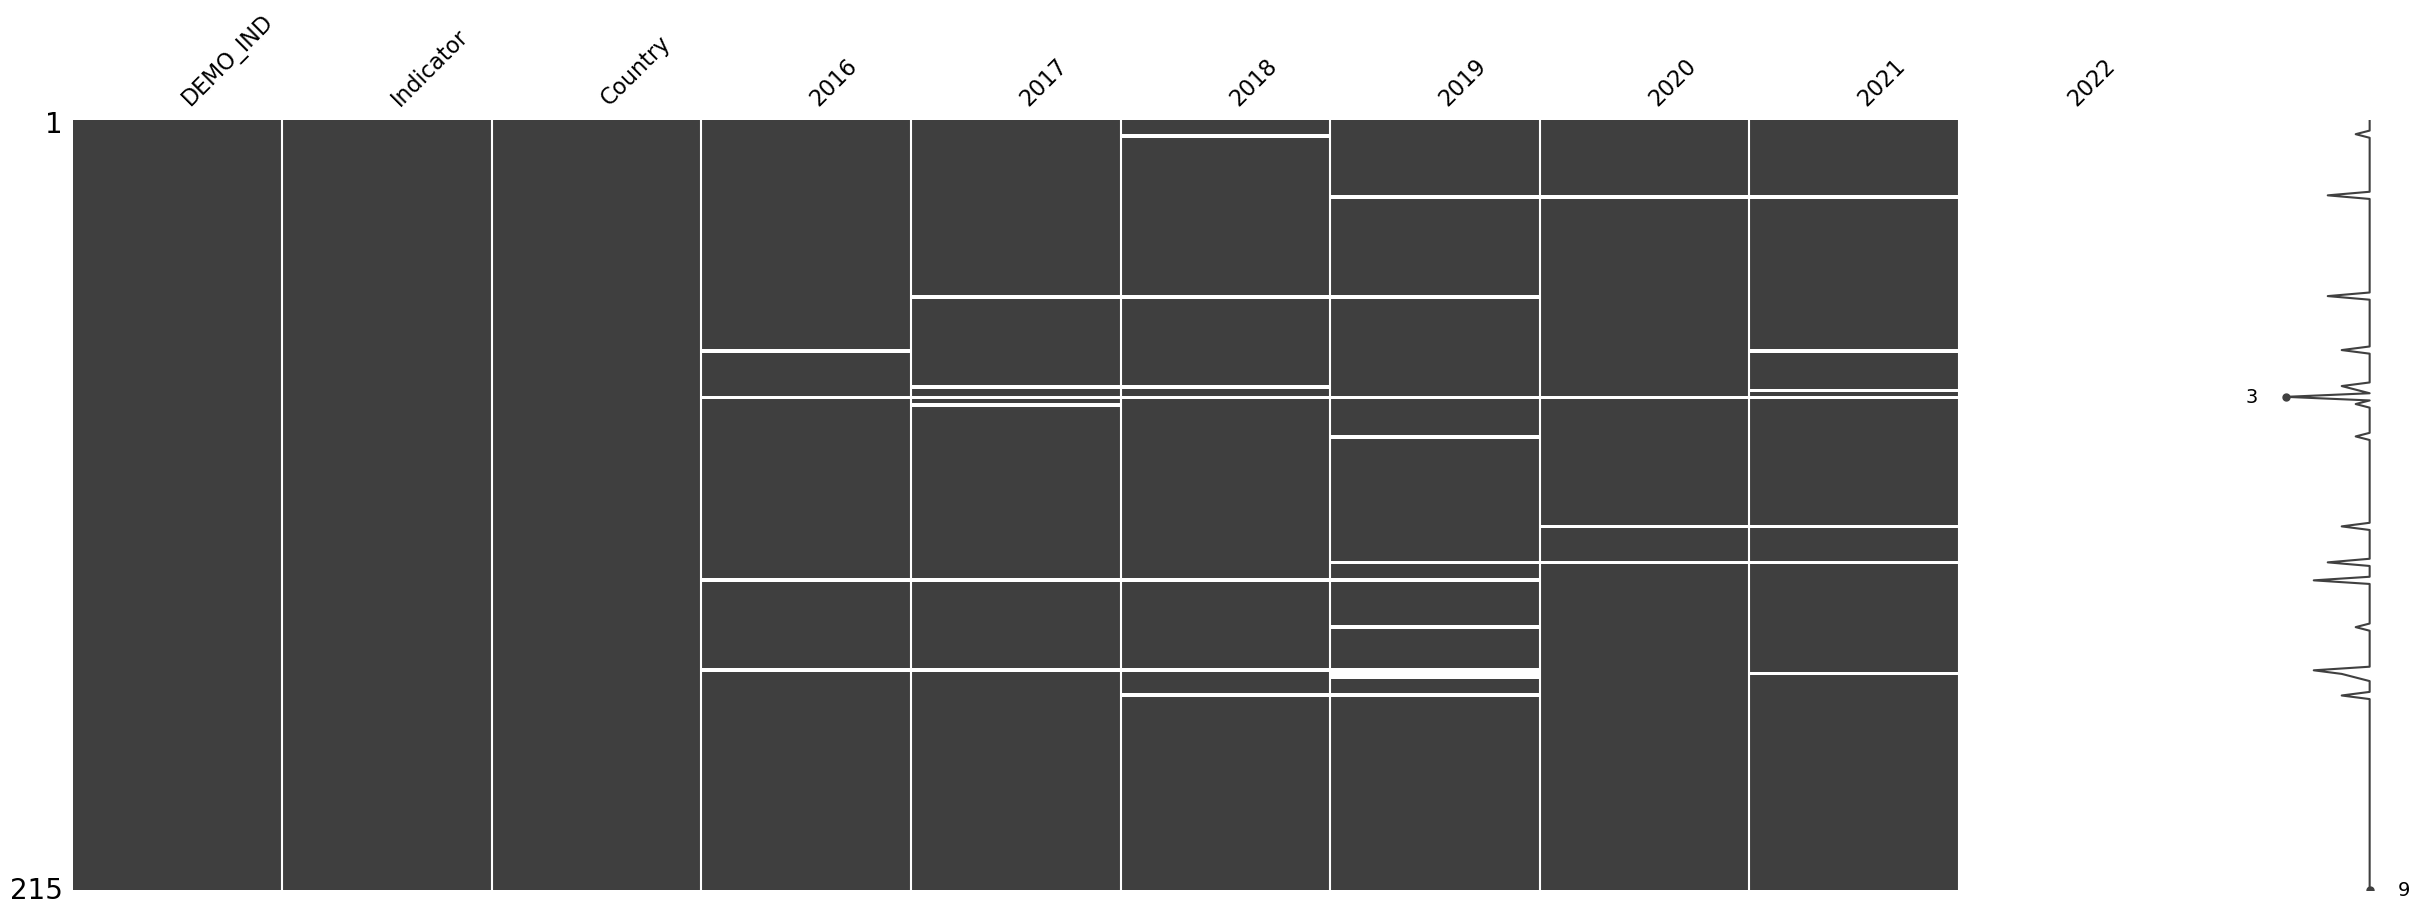

In [290]:
missingno.matrix(df_pop_grow, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

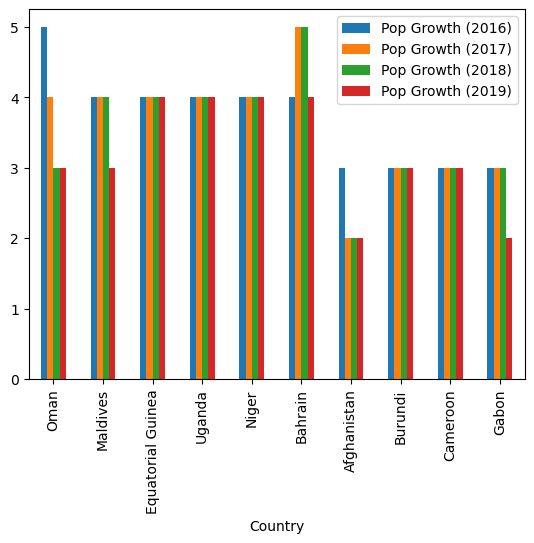

In [326]:
df_pop_grow = df_wide.iloc[6334:6549]
df_pop_grow = df_pop_grow.groupby(by=['Country'], sort = False)
df_pop_grow_avg = round(df_pop_grow.mean(),0)
df_pop_grow_data_series = df_pop_grow_avg.iloc[5:5,1]

df_pop_grow_avg = df_pop_grow_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'Pop Growth (2016)': df_pop_grow_avg[2016],
                                     'Pop Growth (2017)': df_pop_grow_avg[2017],
                                     'Pop Growth (2018)': df_pop_grow_avg[2018],
                                     'Pop Growth (2019)': df_pop_grow_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [268]:
df_pop_rur = df_wide.iloc[6549:6763]
df_pop_rur

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
6549,SP_RUR_TOTL_ZS,Rural population (% of total population),Afghanistan,75.0,75.0,75.0,74.0,74.0,74.0,NaN
6550,SP_RUR_TOTL_ZS,Rural population (% of total population),Albania,42.0,41.0,40.0,39.0,38.0,37.0,NaN
6551,SP_RUR_TOTL_ZS,Rural population (% of total population),Algeria,29.0,28.0,27.0,27.0,26.0,26.0,NaN
6552,SP_RUR_TOTL_ZS,Rural population (% of total population),American Samoa,13.0,13.0,13.0,13.0,13.0,13.0,NaN
6553,SP_RUR_TOTL_ZS,Rural population (% of total population),Andorra,12.0,12.0,12.0,12.0,12.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...
6758,SP_RUR_TOTL_ZS,Rural population (% of total population),Venezuela (Bolivarian Republic of),12.0,12.0,12.0,12.0,12.0,12.0,NaN
6759,SP_RUR_TOTL_ZS,Rural population (% of total population),Viet Nam,65.0,65.0,64.0,63.0,63.0,62.0,NaN
6760,SP_RUR_TOTL_ZS,Rural population (% of total population),Yemen,65.0,64.0,63.0,63.0,62.0,61.0,NaN
6761,SP_RUR_TOTL_ZS,Rural population (% of total population),Zambia,58.0,57.0,56.0,56.0,55.0,55.0,NaN


<AxesSubplot:>

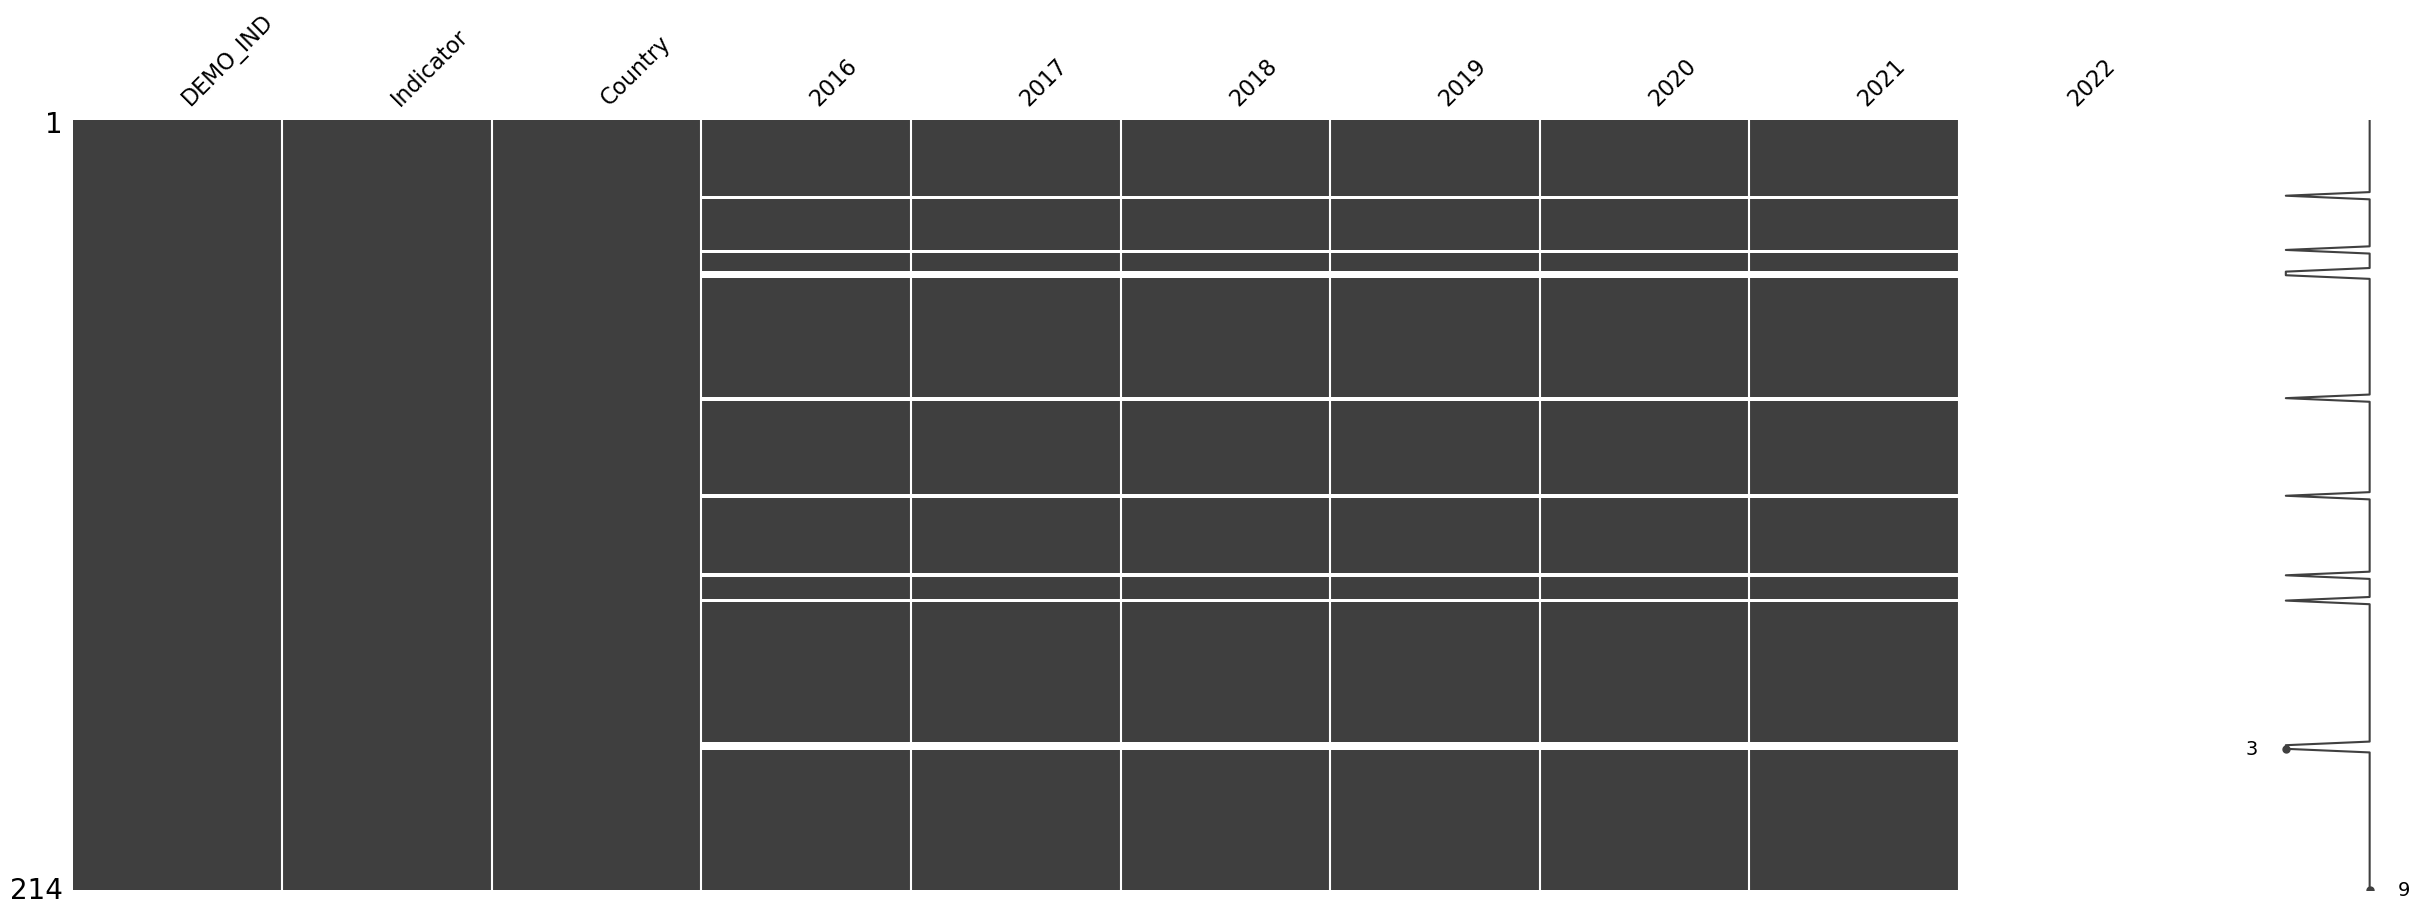

In [291]:
missingno.matrix(df_pop_rur, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

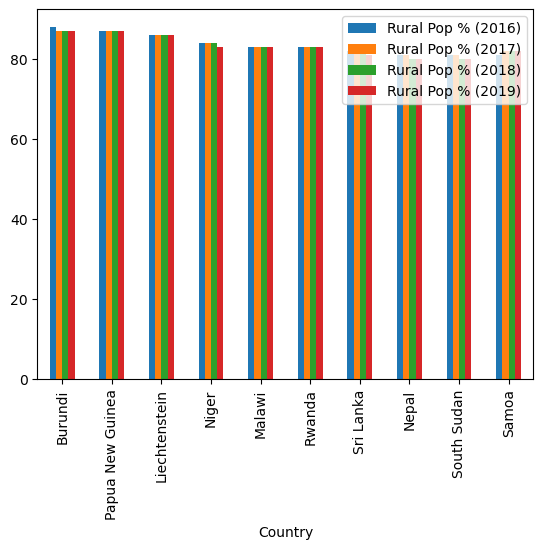

In [325]:
df_pop_rur = df_wide.iloc[6549:6763]
df_pop_rur = df_pop_rur.groupby(by=['Country'], sort = False)
df_pop_rur_avg = round(df_pop_rur.mean(),0)
df_pop_rur_data_series = df_pop_rur_avg.iloc[5:5,1]

df_pop_rur_avg = df_pop_rur_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'Rural Pop % (2016)': df_pop_rur_avg[2016],
                                     'Rural Pop % (2017)': df_pop_rur_avg[2017],
                                     'Rural Pop % (2018)': df_pop_rur_avg[2018],
                                     'Rural Pop % (2019)': df_pop_rur_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

In [267]:
df_gov_exp = df_wide.iloc[6763:6958]
df_gov_exp

Time,DEMO_IND,Indicator,Country,2016,2017,2018,2019,2020,2021,2022
6763,XTGOV_IMF,General government total expenditure (current ...,Afghanistan,3.427710e+11,3.564820e+11,3.841760e+11,4.114730e+11,4.322660e+11,NaN,NaN
6764,XTGOV_IMF,General government total expenditure (current ...,Albania,4.290730e+11,4.554510e+11,4.714070e+11,4.932430e+11,5.362800e+11,5.965250e+11,6.375710e+11
6765,XTGOV_IMF,General government total expenditure (current ...,Algeria,7.297494e+12,7.282630e+12,7.732070e+12,7.741345e+12,6.902887e+12,7.428675e+12,9.774846e+12
6766,XTGOV_IMF,General government total expenditure (current ...,Andorra,8.478605e+08,9.096495e+08,6.572757e+08,8.150113e+08,1.552957e+09,1.263529e+09,NaN
6767,XTGOV_IMF,General government total expenditure (current ...,Angola,3.648044e+12,4.879693e+12,5.273865e+12,6.290944e+12,7.690860e+12,9.075782e+12,1.083720e+13
...,...,...,...,...,...,...,...,...,...,...
6953,XTGOV_IMF,General government total expenditure (current ...,Vanuatu,3.072000e+10,3.523700e+10,3.351000e+10,4.278600e+10,4.551400e+10,4.617500e+10,5.689900e+10
6954,XTGOV_IMF,General government total expenditure (current ...,Viet Nam,1.253677e+15,1.355034e+15,1.435435e+15,1.526893e+15,1.787950e+15,1.689842e+15,1.886267e+15
6955,XTGOV_IMF,General government total expenditure (current ...,Yemen,1.428635e+12,8.397510e+11,1.651600e+12,1.625000e+12,1.647000e+12,2.446176e+12,3.832808e+12
6956,XTGOV_IMF,General government total expenditure (current ...,Zambia,5.170700e+10,6.149800e+10,7.631300e+10,8.959500e+10,1.132270e+11,1.349290e+11,1.391810e+11


<AxesSubplot:>

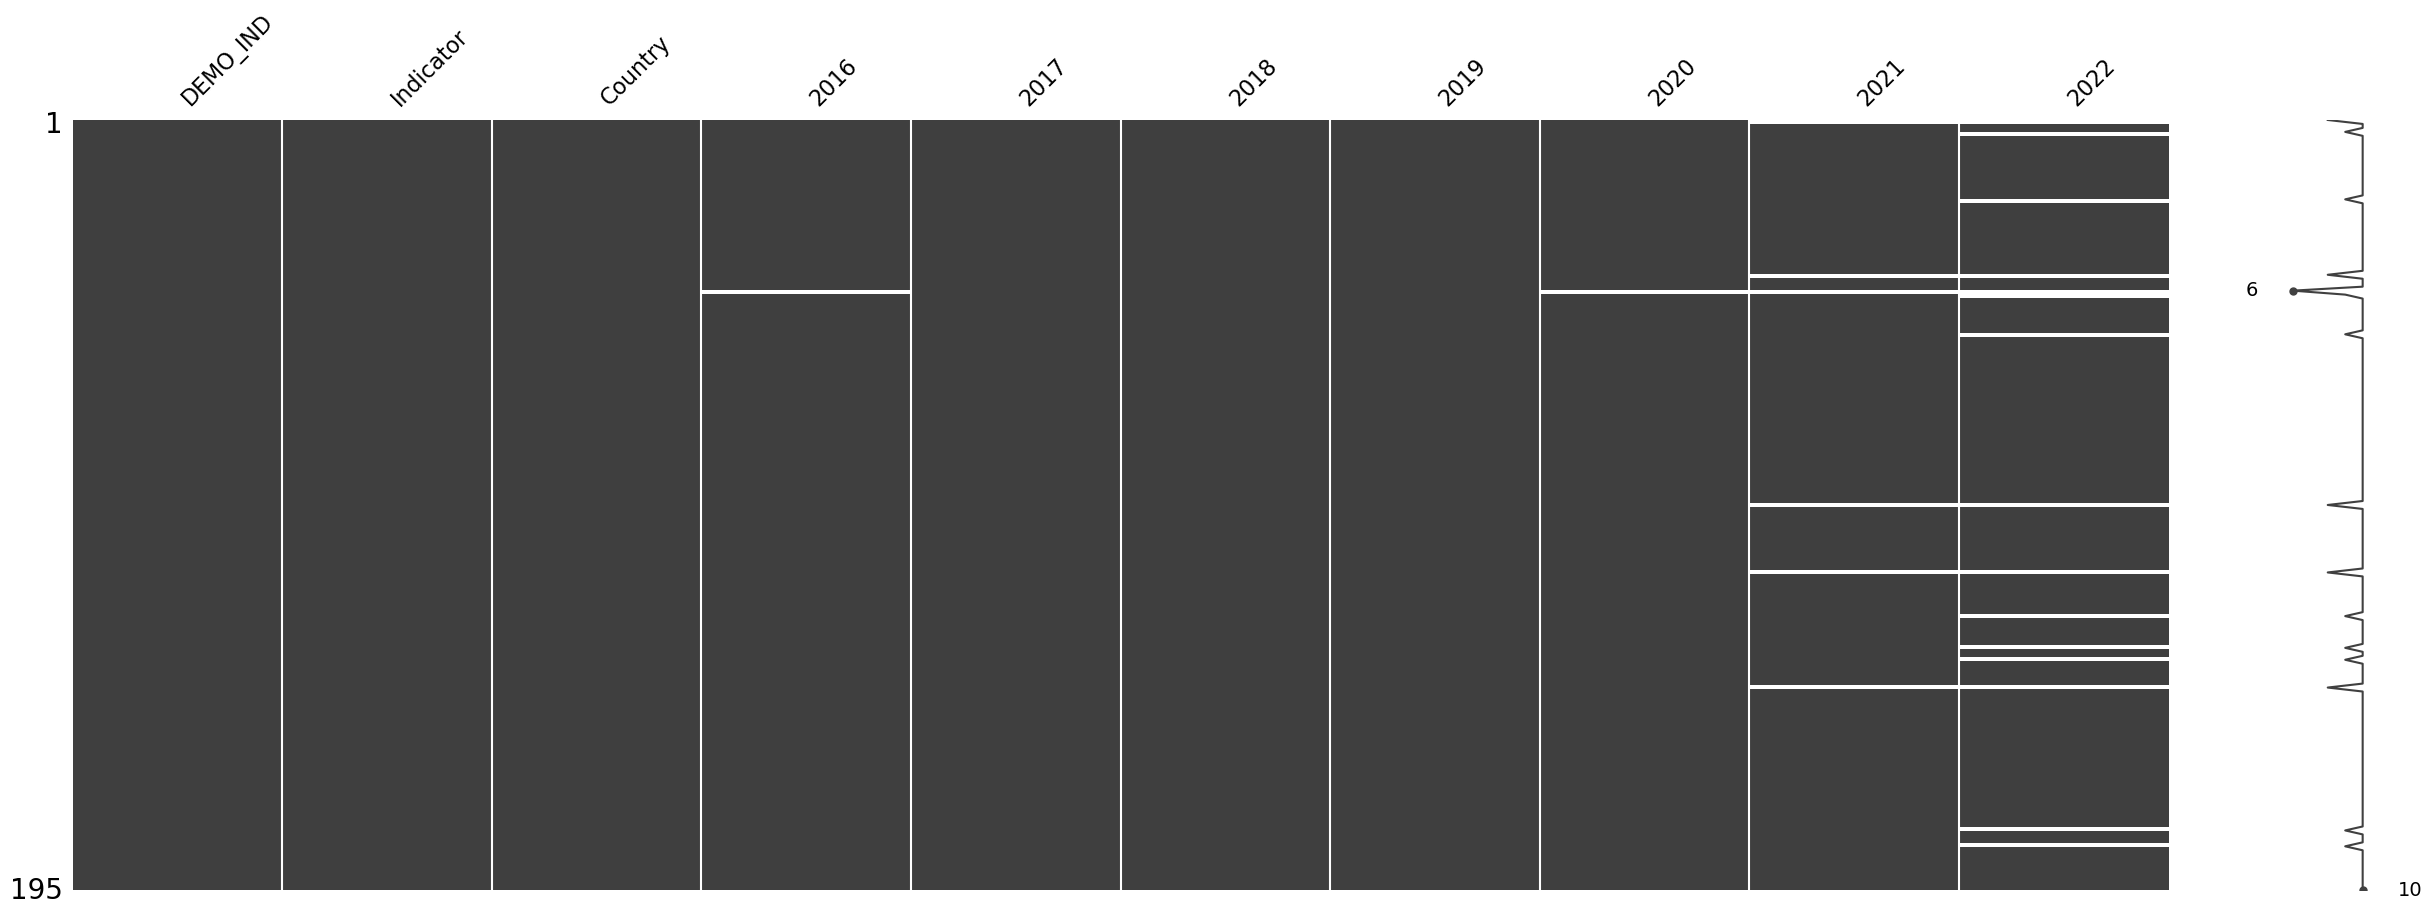

In [271]:
missingno.matrix(df_gov_exp, figsize = (30,10))

<AxesSubplot:xlabel='Country'>

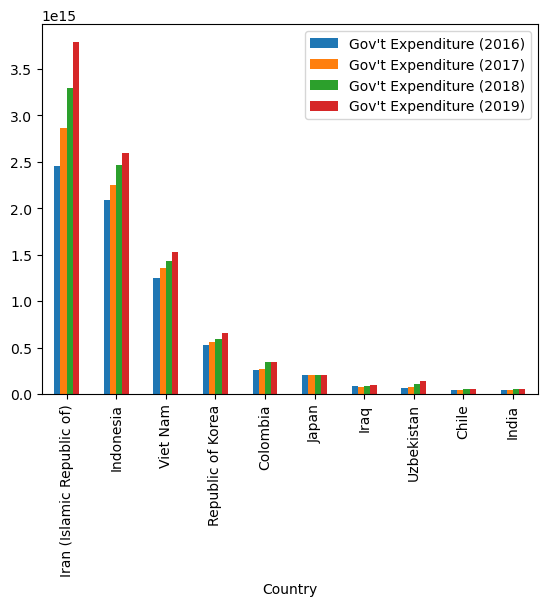

In [322]:
df_gov_exp = df_wide.iloc[6763:6958]
df_gov_exp = df_gov_exp.groupby(by=['Country'], sort = False)
df_gov_exp_avg = round(df_gov_exp.mean(),0)
df_gov_exp_data_series = df_gov_exp_avg.iloc[5:5,1]

df_gov_exp_avg = df_gov_exp_avg.sort_values(by=[2016], ascending = False)

## we will assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({"Gov't Expenditure (2016)": df_gov_exp_avg[2016],
                                     "Gov't Expenditure (2017)": df_gov_exp_avg[2017],
                                     "Gov't Expenditure (2018)": df_gov_exp_avg[2018],
                                     "Gov't Expenditure (2019)": df_gov_exp_avg[2019],
                                   }
                                   )

## Let us plot a few of the manufactures for visibility
features_of_interest = features_of_interest.iloc[:10,]
features_of_interest.plot(kind='bar')

# Not done with analysis but wanted to submit before the weekend to begin on Lesson 3